In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load

In [13]:
# get_data, process_data, fiducial_cuts, fiducial_cuts_all, aperture_parametrisation, check_aperture
from processing import *

run_histograms = True

#proton_selection = "SingleRP"
proton_selection = "MultiRP"

m_Z = 91.1876 # GeV
m_mu = 105.6583745e-03 # GeV
m_p = 938.2720813e-03 # GeV

#PX_ += pt_ * np.cos( phi_ )
#PY_ += pt_ * np.sin( phi_ )
#PZ_ += pt_ * np.sinh( eta_ )
#E_  += np.sqrt( pt_**2 * np.cosh( eta_ )**2 + m_**2 )
class MissingMass:
    def __call__(self, momenta):
        #ECM_ = 13000.
        #PX_ = 0.; PY_ = 0.; PZ_ = 0.; E_ = 0.;
        #for idx_ in range( len(momenta) ):
        #    PX_ += momenta[idx_][0]
        #    PY_ += momenta[idx_][1]
        #    PZ_ += momenta[idx_][2]
        #    E_  += momenta[idx_][3]
        mom_ = np.sum( momenta, axis=0 )
        #PX_ = mom_[0]; PY_ = mom_[1]; PZ_ = mom_[2]; E_ = mom_[3];
        return np.sqrt( np.max( [ 0., (13000. - mom_[3])**2 - mom_[0]**2 - mom_[1]**2 - mom_[2]**2 ] ) )
    
#def select_data( df_ ):
#    df__ = df_[ ( df_["InvMass"] >= ( m_Z - 10.) ) & ( df_["InvMass"] <= ( m_Z + 10.) ) ]
#    return df__

class SelectData():
    def __init__(self, proton_selection=""):
        self.proton_selection_ = proton_selection
    def __call__(self, df_):
        df_ = df_[ ( np.abs( df_["Muon0Eta"] ) <= 2.4 ) & ( np.abs( df_["Muon1Eta"] ) <= 2.4 ) &
                   ( df_["InvMass"] >= ( m_Z - 10.) ) & ( df_["InvMass"] <= ( m_Z + 10.) ) ]

        #df_ = process_data( df_, self.proton_selection_, min_mass = 0. )

        df_ = df_.set_index( ["Run", "LumiSection", "EventNum", "Slice"], drop=False )

#        if proton_selection == "MultiRP":
#            msk_ = df_.groupby( ["Run", "LumiSection", "EventNum", "Slice"] ).apply(
#                        lambda df__:
#                            ( np.sum( ( df__[ "MultiRP" ] == 1 ) & ( df__[ "Arm" ] == 0 ) ) >= 1 ) and ( np.sum( ( df__[ "MultiRP" ] == 1 ) & ( df__[ "Arm" ] == 1 ) ) >= 1 )
#                        )
#            print( msk_)
#
#            df_ = df_.loc[ msk_ ]
#            df_[ "MX" ] = df_.groupby( ["Run", "LumiSection", "EventNum", "Slice"] ).apply(
#                            lambda df__:
#                                13000. * np.sqrt( df__.iloc[0].Xi * df__.iloc[1].Xi )
#                            )
#            pz_sign_ = { 0: -1, 1: 1}
#            pbeam_ = 6500.
#            df_[ "MissingMass" ] = df_.groupby( ["Run", "LumiSection", "EventNum", "Slice"] ).apply(
#                lambda df__:
#                    MissingMass()(
#                        [ np.array( [ df__.iloc[0].Muon0Pt*np.cos(df__.iloc[0].Muon0Phi),
#                                      df__.iloc[0].Muon0Pt*np.sin(df__.iloc[0].Muon0Phi),
#                                      df__.iloc[0].Muon0Pt*np.sinh(df__.iloc[0].Muon0Eta),
#                                      np.sqrt( ( df__.iloc[0].Muon0Pt*np.cosh(df__.iloc[0].Muon0Eta) )**2 + m_mu**2 ) ] ),
#                          np.array( [ df__.iloc[0].Muon1Pt*np.cos(df__.iloc[0].Muon1Phi),
#                                      df__.iloc[0].Muon1Pt*np.sin(df__.iloc[0].Muon1Phi),
#                                      df__.iloc[0].Muon1Pt*np.sinh(df__.iloc[0].Muon1Eta),
#                                      np.sqrt( ( df__.iloc[0].Muon1Pt*np.cosh(df__.iloc[0].Muon1Eta) )**2 + m_mu**2 ) ] ),
#                          np.array( [ pbeam_ * (1. - df__.iloc[0].Xi) * df__.iloc[0].ThX,
#                                      pbeam_ * (1. - df__.iloc[0].Xi) * df__.iloc[0].ThY,
#                                      pz_sign_[ df__.iloc[0].Arm ] * pbeam_ * (1. - df__.iloc[0].Xi),
#                                      np.sqrt( pow( pbeam_ * (1. - df__.iloc[0].Xi), 2 ) + m_p**2 ) ] ),
#                          np.array( [ pbeam_ * (1. - df__.iloc[1].Xi) * df__.iloc[1].ThX,
#                                      pbeam_ * (1. - df__.iloc[1].Xi) * df__.iloc[1].ThY,
#                                      pz_sign_[ df__.iloc[1].Arm ] * pbeam_ * (1. - df__.iloc[1].Xi),
#                                      np.sqrt( pow( pbeam_ * (1. - df__.iloc[1].Xi), 2 ) + m_p**2 ) ] )
#                        ] )
#                )
        return df_


### Example data

In [3]:
fileNames_data = [
    #'output-UL2017B-PreSel-Pt1_30-Pt2_20.h5'
    'output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20.h5'
]

#df_counts_data, df_data = get_data( fileNames_data, selection=SelectData(proton_selection) )
#df_data = process_data( df_data, proton_selection, min_mass = 0. )
df_counts_data, df_data_multiRP, df_data_singleRP = get_data( fileNames_data, selection=SelectData(), version="V2" )

output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(138434, 43)
[[2.9722700e+05 5.3000000e+01 1.2090000e+03 ... 4.3329116e-02
  4.1144742e-03 1.1866147e-02]
 [2.9722700e+05 5.3000000e+01 1.2090000e+03 ... 4.3329116e-02
  4.1144742e-03 1.1866147e-02]
 [2.9722700e+05 5.3000000e+01 2.6470000e+03 ... 4.8715532e-02
  5.0120093e-03 9.3826139e-03]
 ...
 [2.9906200e+05 1.3300000e+02 8.1000000e+02 ... 1.2229895e-01
  3.2306839e-02 1.5939934e-03]
 [2.9906200e+05 1.3300000e+02 2.8810000e+03 ... 6.1720526e-03
  3.1689482e-03 9.3077375e-03]
 [2.9906200e+05 1.3300000e+02 2.8810000e+03 ... 6.1720526e-03
  3.1689482e-03 9.3077375e-03]]
(291725, 43)
[[2.9722700e+05 5.3000000e+01 1.2090000e+03 ... 4.3329116e-02
  4.1144742e-03 1.1866147e-02]
 [2.9722700e+05 5.3000000e+01 1.2090000e+03 ... 4.3329116e-02
  4.1144742e-03 1.1866147e-02]
 [2.9722700e+05 5.3000000e+01 1.2090000e+03 ... 4.3329116e-02
  4.1144742e-03 1.1866147e-02]
 

In [4]:
df_data_multiRP = process_data( df_data_multiRP, proton_selection="MultiRP", min_mass = 0., within_aperture=True )
df_data_multiRP
# df_data_multiRP[
#     ['CrossingAngle',
#      'MultiRP', 'Arm', 'RPId1', 'RPId2',
#      'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
#      'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',
#      'TrackPixShift_SingleRP', 'Track1PixShift_MultiRP', 'Track2PixShift_MultiRP',
#      'Xi']
#     ]
# df_data_multiRP[
#     ['nVertices', 'PrimVertexZ',
#      'Muon0Pt', 'Muon0Eta', 'Muon0Phi', 'Muon0VtxZ',
#      'Muon1Pt', 'Muon1Eta', 'Muon1Phi', 'Muon1VtxZ',
#      'InvMass', 'ExtraPfCands', 'Acopl',
#      'XiMuMuPlus', 'XiMuMuMinus']
#     ]

# 'Run', 'LumiSection', 'EventNum', 'Slice', 'CrossingAngle',
# 'MultiRP', 'Arm', 'RPId1', 'RPId2',
# 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
# 'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',
# 'TrackPixShift_SingleRP', 'Track1PixShift_MultiRP', 'Track2PixShift_MultiRP',
# 'Xi', 'T', 'ThX', 'ThY', 'Time',
# 'nVertices', 'PrimVertexZ',
# 'Muon0Pt', 'Muon0Eta', 'Muon0Phi', 'Muon0VtxZ',
# 'Muon1Pt', 'Muon1Eta', 'Muon1Phi', 'Muon1VtxZ',
# 'InvMass', 'ExtraPfCands', 'Acopl',
# 'XiMuMuPlus', 'XiMuMuMinus'

{'2017B': {0: {2: 1.995}, 1: {2: 2.422}}, '2017C1': {0: {2: 1.86}, 1: {2: 2.422}}, '2017E': {0: {2: 1.995}, 1: {2: 2.422}}, '2017F1': {0: {2: 1.995}, 1: {2: 2.422}}, '2018A': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.421}}, '2018B1': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.564}}, '2018B2': {0: {0: 2.564, 2: 2.14}, 1: {0: 3.275, 2: 2.279}}, '2018C': {0: {0: 2.564, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}, '2018D1': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}, '2018D2': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}} {'2017B': {0: {2: 24.479}, 1: {2: 24.62}}, '2017C1': {0: {2: 24.334}, 1: {2: 24.62}}, '2017E': {0: {2: 24.479}, 1: {2: 24.62}}, '2017F1': {0: {2: 24.479}, 1: {2: 24.62}}, '2018A': {0: {0: 17.927, 2: 24.62}, 1: {0: 18.498, 2: 20.045}}, '2018B1': {0: {0: 17.927, 2: 24.62}, 1: {0: 18.07, 2: 20.045}}, '2018B2': {0: {0: 17.64, 2: 24.479}, 1: {0: 17.931, 2: 24.76}}, '2018C': {0: {0: 17.93, 2: 24.62}, 1: {0: 17.931, 2: 24.76}}, '2018D1': {0: {0: 17.931, 2: 24.62}, 1: {0: 

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2874: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Number of rows: 118348
Number of rows selected: 111806


Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
297227 53          35988080  0      297227           53   35988080      0   
                             0      297227           53   35988080      0   
                   36335380  0      297227           53   36335380      0   
                             0      297227           53   36335380      0   
       54          36982344  0      297227           54   36982344      0   
                             0      297227           54   36982344      0   
                   37136416  0      297227           54   37136416      0   
       55          38149808  0      297227           55   38149808      0   
                             0      297227           55   38149808      0   
       56          38785288  0      297227           56   38785288      0   
                             0      297227           56   38785288      0   
                   38604580  0      297227           56   38604580      0   
                             0      297227           56   38604580      0   
       57          39477140  0      297227           57   39477140      0   
                             0      297227           57   39477140      0   
                   39656980  0      297227           57   39656980      0   
                             0      297227           57   39656980      0   
       58          40503916  0      297227           58   40503916      0   
                             0      297227           58   40503916      0   
                   40248260  0      297227           58   40248260      0   
                             0      297227           58   40248260      0   
                   40433440  0      297227           58   40433440      0   
                             0      297227           58   40433440      0   
       59          40815520  0      297227           59   40815520      0   
                             0      297227           59   40815520      0   
                   41002888  0      297227           59   41002888      0   
                             0      297227           59   41002888      0   
       60          42120924  0      297227           60   42120924      0   
       62          43539776  0      297227           62   43539776      0   
                   43310928  0      297227           62   43310928      0   
...                                    ...          ...        ...    ...   
299062 130         222600064 0      299062          130  222600064      0   
                             0      299062          130  222600064      0   
       131         224770928 0      299062          131  224770928      0   
                             0      299062          131  224770928      0   
                   225127776 0      299062          131  225127776      0   
                             0      299062          131  225127776      0   
                   224837456 0      299062          131  224837456      0   
                   225169904 0      299062          131  225169904      0   
                             0      299062          131  225169904      0   
                   224546160 0      299062          131  224546160      0   
                             0      299062          131  224546160      0   
                   225119680 0      299062          131  225119680      0   
                             0      299062          131  225119680      0   
       132         226060320 0      299062          132  226060320      0   
                             0      299062          132  226060320      0   
                   226089600 0      299062          132  226089600      0   
                             0      299062          132  226089600      0   
                   225481872 0      299062          132  225481872      0   
                             0      299062          132  225481872      0   
       133         227523136 0     

In [7]:
df_data_multiRP[
    ['nVertices', 'PrimVertexZ',
     'Muon0Pt', 'Muon0Eta', 'Muon0Phi', 'Muon0VtxZ',
     'Muon1Pt', 'Muon1Eta', 'Muon1Phi', 'Muon1VtxZ',
     'InvMass', 'ExtraPfCands', 'Acopl',
     'XiMuMuPlus', 'XiMuMuMinus']
    ]

nVertices  PrimVertexZ    Muon0Pt  \
Run    LumiSection EventNum  Slice                                      
297227 53          35988080  0             11     2.323647  41.541447   
                             0             11     2.323647  41.541447   
                   36335380  0             13     1.775673  34.081028   
                             0             13     1.775673  34.081028   
       54          36982344  0             17    -0.760245  36.301220   
                             0             17    -0.760245  36.301220   
                   37136416  0             11     1.831796  42.093742   
       55          38149808  0             13     2.546869  50.005455   
                             0             13     2.546869  50.005455   
       56          38785288  0              9     8.764390  44.774849   
                             0              9     8.764390  44.774849   
                   38604580  0             12     1.899735  74.027679   
                             0             12     1.899735  74.027679   
       57          39477140  0             13     1.025482  42.758957   
                             0             13     1.025482  42.758957   
                   39656980  0             11    -3.221514  45.628857   
                             0             11    -3.221514  45.628857   
       58          40503916  0             15     3.303579  33.786621   
                             0             15     3.303579  33.786621   
                   40248260  0             13     3.086200  35.191658   
                             0             13     3.086200  35.191658   
                   40433440  0             16     2.547605  88.718620   
                             0             16     2.547605  88.718620   
       59          40815520  0              8     2.337890  70.799538   
                             0              8     2.337890  70.799538   
                   41002888  0             15    -6.500247  51.612186   
                             0             15    -6.500247  51.612186   
       60          42120924  0             16    -0.460209  54.713947   
       62          43539776  0             12     3.819487  46.654762   
                   43310928  0              9    -2.941386  42.761902   
...                                       ...          ...        ...   
299062 130         222600064 0             22     3.532480  39.670879   
                             0             22     3.532480  39.670879   
       131         224770928 0             23    -1.931153  42.361874   
                             0             23    -1.931153  42.361874   
                   225127776 0             20    -6.335510  44.998055   
                             0             20    -6.335510  44.998055   
                   224837456 0             21     0.996536  50.248413   
                   225169904 0             34    -1.358469  49.207203   
                             0             34    -1.358469  49.207203   
                   224546160 0             31     2.668255  34.434032   
                             0             31     2.668255  34.434032   
                   225119680 0             31     4.401420  41.896183   
                             0             31     4.401420  41.896183   
       132         226060320 0             26    -3.511579  43.460163   
                             0             26    -3.511579  43.460163   
                   226089600 0             23     1.087028  45.963982   
                             0             23     1.087028  45.963982   
                   225481872 0             28     3.103140  48.960594   
                             0             28     3.103140  48.960594   
       133         227523136 0             24    -2.899971  59.832447   
                             0             24    -2.899971  59.832447   
                   226396384 0             20     2.041851  35.040573   
                     

In [5]:
df_data_singleRP = process_data( df_data_singleRP, proton_selection="SingleRP", min_mass = 0. )
#df_data_singleRP
df_data_singleRP[
    ['CrossingAngle',
     'MultiRP', 'Arm', 'RPId1', 'RPId2',
     'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
     'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',
     'TrackPixShift_SingleRP', 'Track1PixShift_MultiRP', 'Track2PixShift_MultiRP',
     'Xi']
    ]
# df_data_singleRP[
#     ['nVertices', 'PrimVertexZ',
#      'Muon0Pt', 'Muon0Eta', 'Muon0Phi', 'Muon0VtxZ',
#      'Muon1Pt', 'Muon1Eta', 'Muon1Phi', 'Muon1VtxZ',
#      'InvMass', 'ExtraPfCands', 'Acopl',
#      'XiMuMuPlus', 'XiMuMuMinus']
#     ]

{'2017B': {0: {2: 1.995}, 1: {2: 2.422}}, '2017C1': {0: {2: 1.86}, 1: {2: 2.422}}, '2017E': {0: {2: 1.995}, 1: {2: 2.422}}, '2017F1': {0: {2: 1.995}, 1: {2: 2.422}}, '2018A': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.421}}, '2018B1': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.564}}, '2018B2': {0: {0: 2.564, 2: 2.14}, 1: {0: 3.275, 2: 2.279}}, '2018C': {0: {0: 2.564, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}, '2018D1': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}, '2018D2': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}} {'2017B': {0: {2: 24.479}, 1: {2: 24.62}}, '2017C1': {0: {2: 24.334}, 1: {2: 24.62}}, '2017E': {0: {2: 24.479}, 1: {2: 24.62}}, '2017F1': {0: {2: 24.479}, 1: {2: 24.62}}, '2018A': {0: {0: 17.927, 2: 24.62}, 1: {0: 18.498, 2: 20.045}}, '2018B1': {0: {0: 17.927, 2: 24.62}, 1: {0: 18.07, 2: 20.045}}, '2018B2': {0: {0: 17.64, 2: 24.479}, 1: {0: 17.931, 2: 24.76}}, '2018C': {0: {0: 17.93, 2: 24.62}, 1: {0: 17.931, 2: 24.76}}, '2018D1': {0: {0: 17.931, 2: 24.62}, 1: {0: 

CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
297227 53          35988080  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
                   36335380  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
       54          36982344  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
                   37136416  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
       55          38149808  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
       56          38785288  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
                   38604580  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
       57          39477140  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
                   39656980  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
       58          40503916  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
                   40248260  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
                   40433440  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
       59          40815520  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
                   41002888  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
       60          42120924  0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    123     -1   
...                                           ...      ...  ...    ...    ...   
299062 131         225127776 0              140.0        0 -999     23     -1   
                             0              140.0        0 -999    123     -1   
                             0              140.0        0 -999    123     -1   
                             0              140.0        0 -999    123     -1   
                             0              140.0        0 -999    123     -1   
                   224837456 0              140.0        0 -999     23     -1   
                   225169904 0              140.0        0 -999     23     -1   
                             0              140.0        0 -999    123     -1   
                   224546160 0              140.0        0 -999     23     -1   
                             0              140.0        0 -999    123     -1   
                   225119680 0              140.0        0 -999     23     -1   
                             0              140.0        0 -999    123     -1   
       132         226060320 0              140.0        0 -999     23     -1   
                             0              140.0        0 -999    123     -1   
                   226089600 0              140.0        0 -999     23     -1   
                             0              140.0        0 -999    123     -1   
                   225481872 0              140.0        0 -999    

In [8]:
import time

print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

#df_data_ = df_data[:1000]
#df_data_ = df_data
df_data_ = df_data_multiRP

#df_data_index_ = df_data_.set_index( ["Run", "LumiSection", "EventNum", "Slice"] )
df_data_index_ = df_data_

pz_sign_ = { 0: +1, 1: -1}
pbeam_ = 6500.

# df_data_index_.loc[ :, "Muon0Px" ] = df_data_index_.loc[ :, "Muon0Pt" ] * np.cos( df_data_index_.loc[ :, "Muon0Phi" ] )
# df_data_index_.loc[ :, "Muon0Py" ] = df_data_index_.loc[ :, "Muon0Pt" ] * np.sin( df_data_index_.loc[ :, "Muon0Phi" ] )
# df_data_index_.loc[ :, "Muon0Pz" ] = df_data_index_.loc[ :, "Muon0Pt" ] * np.sinh( df_data_index_.loc[ :, "Muon0Eta" ] )
# df_data_index_.loc[ :, "Muon0E" ]  = np.sqrt( ( df_data_index_.loc[ :, "Muon0Pt" ] * np.cosh( df_data_index_.loc[ :, "Muon0Eta" ] ) )**2 + m_mu**2 )
# df_data_index_.loc[ :, "Muon1Px" ] = df_data_index_.loc[ :, "Muon1Pt" ] * np.cos( df_data_index_.loc[ :, "Muon1Phi" ] )
# df_data_index_.loc[ :, "Muon1Py" ] = df_data_index_.loc[ :, "Muon1Pt" ] * np.sin( df_data_index_.loc[ :, "Muon1Phi" ] )
# df_data_index_.loc[ :, "Muon1Pz" ] = df_data_index_.loc[ :, "Muon1Pt" ] * np.sinh( df_data_index_.loc[ :, "Muon1Eta" ] )
# df_data_index_.loc[ :, "Muon1E" ]  = np.sqrt( ( df_data_index_.loc[ :, "Muon1Pt" ] * np.cosh( df_data_index_.loc[ :, "Muon1Eta" ] ) )**2 + m_mu**2 )
df_data_index_.loc[ :, "DiMuonPx" ] = ( df_data_index_.loc[ :, "Muon0Pt" ] * np.cos( df_data_index_.loc[ :, "Muon0Phi" ] ) +
                                        df_data_index_.loc[ :, "Muon1Pt" ] * np.cos( df_data_index_.loc[ :, "Muon1Phi" ] ) )
df_data_index_.loc[ :, "DiMuonPy" ] = ( df_data_index_.loc[ :, "Muon0Pt" ] * np.sin( df_data_index_.loc[ :, "Muon0Phi" ] ) +
                                        df_data_index_.loc[ :, "Muon1Pt" ] * np.sin( df_data_index_.loc[ :, "Muon1Phi" ] ) )
df_data_index_.loc[ :, "DiMuonPz" ] = ( df_data_index_.loc[ :, "Muon0Pt" ] * np.sinh( df_data_index_.loc[ :, "Muon0Eta" ] ) +
                                        df_data_index_.loc[ :, "Muon1Pt" ] * np.sinh( df_data_index_.loc[ :, "Muon1Eta" ] ) )
df_data_index_.loc[ :, "DiMuonE" ]  = ( np.sqrt( ( df_data_index_.loc[ :, "Muon0Pt" ] * np.cosh( df_data_index_.loc[ :, "Muon0Eta" ] ) )**2 + m_mu**2 ) +
                                        np.sqrt( ( df_data_index_.loc[ :, "Muon1Pt" ] * np.cosh( df_data_index_.loc[ :, "Muon1Eta" ] ) )**2 + m_mu**2 ) )

df_data_index_.loc[ :, "DiMuonPt" ] = np.sqrt( df_data_index_.loc[ :, "DiMuonPx" ]**2 + df_data_index_.loc[ :, "DiMuonPy" ]**2 )

df_data_index_.loc[ :, "px" ]  = pbeam_ * (1. - df_data_index_.loc[ :, "Xi" ]) * df_data_index_.loc[ :, "ThX"]
df_data_index_.loc[ :, "py" ]  = pbeam_ * (1. - df_data_index_.loc[ :, "Xi" ]) * df_data_index_.loc[ :, "ThY"]
df_data_index_.loc[ :, "pz" ]  = df_data_index_.loc[ :, "Arm" ].map( pz_sign_ ) * pbeam_ * (1. - df_data_index_.loc[ :, "Xi" ])
df_data_index_.loc[ :, "e" ]   = np.sqrt( ( pbeam_ * (1. - df_data_index_.loc[ :, "Xi" ]) )**2 + m_p**2 )

msk_ = ( df_data_index_.loc[ :, "DiMuonPt" ] >= 40. ) & ( df_data_index_.loc[ :, "Xi" ] >= 0.05 ) & ( df_data_index_.loc[ :, "within_aperture" ] )
print( msk_ )
df_data_index_ = df_data_index_.loc[ msk_ ]
print ( df_data_index_ )

time_chp1_ = time.time()
print ( "1: {:.0f}".format( time_chp1_ - time_s_ ) )

msk__ = df_data_index_.groupby( level=["Run", "LumiSection", "EventNum", "Slice"] ).apply(
            lambda df_:
                ( np.sum( ( df_[ "MultiRP" ] == 1 ) & ( df_[ "Arm" ] == 0 ) ) >= 1 ) and ( np.sum( ( df_[ "MultiRP" ] == 1 ) & ( df_[ "Arm" ] == 1 ) ) >= 1 )
            )
print( msk__ )
df_data_index_ = df_data_index_.loc[ msk__ ]
print ( df_data_index_ )

time_chp2_ = time.time()
print ( "2: {:.0f}".format( time_chp2_ - time_chp1_ ) )

df_data_index_.loc[ :, "MX" ] = df_data_index_.groupby( level=["Run", "LumiSection", "EventNum", "Slice"] ).apply(
            lambda df_:
                13000. * np.sqrt( df_.iloc[0].Xi * df_.iloc[1].Xi )
            )

time_chp3_ = time.time()
print ( "3: {:.0f}".format( time_chp3_ - time_chp2_ ) )

# MissingMass_ = MissingMass()
# df_data_index_.loc[ :, "MissingMass" ] = df_data_index_.groupby( level=["Run", "LumiSection", "EventNum", "Slice"] ).apply(
#             lambda df_:
#                 MissingMass_(
#                     [ df_.iloc[0][ ["Muon0Px", "Muon0Py", "Muon0Pz", "Muon0E" ] ],
#                       df_.iloc[0][ ["Muon1Px", "Muon1Py", "Muon1Pz", "Muon1E" ] ],
#                       df_.iloc[0][ ["px", "py", "pz", "e"] ],
#                       df_.iloc[1][ ["px", "py", "pz", "e"] ]
#                     ] )
#             )
df_data_index_.loc[ :, "MissingMass" ] = df_data_index_.groupby( level=["Run", "LumiSection", "EventNum", "Slice"] ).apply(
            lambda df_:
                np.sqrt( np.max( [0., ( (13000. - df_.iloc[0][ "DiMuonE" ] - df_.iloc[0][ "e" ] - df_.iloc[1][ "e" ])**2 -
                                        ( df_.iloc[0][ "DiMuonPx" ] + df_.iloc[0][ "px" ] + df_.iloc[1][ "px" ] )**2 -
                                        ( df_.iloc[0][ "DiMuonPy" ] + df_.iloc[0][ "py" ] + df_.iloc[1][ "py" ] )**2 -
                                        ( df_.iloc[0][ "DiMuonPz" ] + df_.iloc[0][ "pz" ] + df_.iloc[1][ "pz" ] )**2 ) ] ) )
            )

time_chp4_ = time.time()
print ( "4: {:.0f}".format( time_chp4_ - time_chp3_ ) )

#df_data_events = df_data_.set_index( ["Run", "LumiSection", "EventNum", "Slice"] ).drop(
#    columns=['MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2', 'Xi', 'T', 'ThX', 'ThY', 'Time', 'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP']
#    )
#df_data_events = df_data_events[ ~df_data_events.index.duplicated(keep='first') ]

time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/05/07 13:45:59


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2847: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


Run     LumiSection  EventNum   Slice
297227  53           35988080   0        False
                                0        False
                     36335380   0        False
                                0        False
        54           36982344   0        False
                                0        False
                     37136416   0        False
        55           38149808   0        False
                                0        False
        56           38785288   0        False
                                0        False
                     38604580   0        False
                                0        False
        57           39477140   0        False
                                0        False
                     39656980   0        False
                                0        False
        58           40503916   0        False
                                0        False
                     40248260   0        False
                      

Run     LumiSection  EventNum   Slice
297050  12           9032300    0         True
        13           10571133   0         True
        18           16218325   0         True
                     16701101   0         True
        19           18741832   0         True
        21           20661166   0         True
        22           22241156   0         True
                     22897492   0        False
        23           24015752   0        False
        25           26702920   0         True
        27           29370508   0        False
        28           30554006   0        False
        29           31458988   0         True
        31           34530888   0         True
                     34892800   0         True
        32           35340140   0        False
        33           36892084   0         True
                     37170288   0        False
        34           37988628   0         True
        36           40870264   0         True
        37           4

3: 6
4: 23
Total time elapsed: 51


In [9]:
df_data_index_
# df_data_index_[ [ "DiMuonPx", "DiMuonPy", "DiMuonPz", "DiMuonE", "px", "py", "pz", "e" ] ]

Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
297227 58          40433440   0      297227           58    40433440      0   
                              0      297227           58    40433440      0   
       79          56409080   0      297227           79    56409080      0   
                              0      297227           79    56409080      0   
       97          70708880   0      297227           97    70708880      0   
                              0      297227           97    70708880      0   
       106         77931392   0      297227          106    77931392      0   
                              0      297227          106    77931392      0   
297219 673         1248770688 0      297219          673  1248770688      0   
                              0      297219          673  1248770688      0   
297292 74          138110224  0      297292           74   138110224      0   
                              0      297292           74   138110224      0   
       75          140121696  0      297292           75   140121696      0   
                              0      297292           75   140121696      0   
       76          142223264  0      297292           76   142223264      0   
                              0      297292           76   142223264      0   
       77          144170656  0      297292           77   144170656      0   
                              0      297292           77   144170656      0   
                   143419872  0      297292           77   143419872      0   
                              0      297292           77   143419872      0   
       78          145545040  0      297292           78   145545040      0   
                              0      297292           78   145545040      0   
       80          149765728  0      297292           80   149765728      0   
                              0      297292           80   149765728      0   
                   150181808  0      297292           80   150181808      0   
                              0      297292           80   150181808      0   
       84          157588304  0      297292           84   157588304      0   
                              0      297292           84   157588304      0   
                   156883920  0      297292           84   156883920      0   
                              0      297292           84   156883920      0   
...                                     ...          ...         ...    ...   
299061 78          54786576   0      299061           78    54786576      0   
                              0      299061           78    54786576      0   
299062 65          107805544  0      299062           65   107805544      0   
                              0      299062           65   107805544      0   
       67          111162696  0      299062           67   111162696      0   
                              0      299062           67   111162696      0   
       69          114411752  0      299062           69   114411752      0   
                              0      299062           69   114411752      0   
       70          117173656  0      299062           70   117173656      0   
                              0      299062           70   117173656      0   
                   117407544  0      299062           70   117407544      0   
                              0      299062           70   117407544      0   
       72          120445128  0      299062           72   120445128      0   
                              0      299062           72   120445128      0   
                   119845752  0      299062           72   119845752      0   
                              0      299062           72   119845752      0   
       74          124290624  0      299062           74   124290624      0   
                              0      299062           74   124290624      0   
       77  

### Histograms build function

In [10]:
def calculate_histograms( fileNames, proton_selection, label, selection=None ):
    
    #vars_ = [ "InvMass", "MX", "MissingMass", "MissingMass10GeV" ]
    vars_ = None
    if proton_selection == "SingleRP":
        vars_ = [ "InvMass", "MX" ]
    elif proton_selection == "MultiRP":
        vars_ = [ "InvMass", "MX",
                  "MissingMass80GeV", "MissingMass60GeV", "MissingMass50GeV", "MissingMass40GeV",
                  "MissingMass30GeV", "MissingMass20GeV", "MissingMass10GeV", "MissingMass5GeV" ]
    
    df_names_ = {}
    for var_ in vars_:
        df_names_[ var_ ] = var_
    df_names_["MissingMass80GeV"] = "MissingMass"
    df_names_["MissingMass60GeV"] = "MissingMass"
    df_names_["MissingMass50GeV"] = "MissingMass"
    df_names_["MissingMass40GeV"] = "MissingMass"
    df_names_["MissingMass30GeV"] = "MissingMass"
    df_names_["MissingMass20GeV"] = "MissingMass"
    df_names_["MissingMass10GeV"] = "MissingMass"
    df_names_["MissingMass5GeV"]  = "MissingMass"
    bins_ = {}
    bins_[ "InvMass" ] = 100
    bins_[ "MX" ] = 100
    bins_[ "MissingMass80GeV" ] = 25
    bins_[ "MissingMass60GeV" ] = int( 2000. / 60. )
    bins_[ "MissingMass50GeV" ] = 40
    bins_[ "MissingMass40GeV" ] = 50
    bins_[ "MissingMass20GeV" ] = 100
    bins_[ "MissingMass30GeV" ] = int( 2000. / 30. )
    bins_[ "MissingMass10GeV" ] = 200
    bins_[ "MissingMass5GeV" ] = 400
    ranges_ = {}
    ranges_[ "InvMass" ] = (0., 500.)
    ranges_[ "MX" ] = (0., 2000.)
    ranges_[ "MissingMass80GeV" ] = (0., 2000.)
    ranges_[ "MissingMass60GeV" ] = (0., 2000.)
    ranges_[ "MissingMass50GeV" ] = (0., 2000.)
    ranges_[ "MissingMass40GeV" ] = (0., 2000.)
    ranges_[ "MissingMass30GeV" ] = (0., 2000.)
    ranges_[ "MissingMass20GeV" ] = (0., 2000.)
    ranges_[ "MissingMass10GeV" ] = (0., 2000.)
    ranges_[ "MissingMass5GeV" ] = (0., 2000.)
    print ( vars_ )
    print ( df_names_ )
    print ( bins_ )
    print ( ranges_ ) 
    
    histos_ = {}
    for var_ in vars_:
        histos_[ var_ ] = []
        
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:
        
        for idx_, file_ in enumerate( fileNames ):

    #        df_counts_, df_ = get_data( [ file_ ], selection=selection )
    #        df_ = process_data( df_, proton_selection, min_mass = 0. )
    #        df_ = df_.set_index( ["Run", "LumiSection", "EventNum", "Slice"] )
            df_counts_, df_multiRP_, df_singleRP_ = get_data( [ file_ ], selection=selection, version="V2" )

            df_ = None
            if proton_selection == "SingleRP":
                df_ = df_singleRP_
            elif proton_selection == "MultiRP":
                df_ = df_multiRP_
            df_ = process_data( df_, proton_selection=proton_selection, min_mass = 0., within_aperture=True )

            pz_sign_ = { 0: +1, 1: -1}
            pbeam_ = 6500.
    #         df_.loc[ :, "Muon0Px" ] = df_.loc[ :, "Muon0Pt" ] * np.cos( df_.loc[ :, "Muon0Phi" ] )
    #         df_.loc[ :, "Muon0Py" ] = df_.loc[ :, "Muon0Pt" ] * np.sin( df_.loc[ :, "Muon0Phi" ] )
    #         df_.loc[ :, "Muon0Pz" ] = df_.loc[ :, "Muon0Pt" ] * np.sinh( df_.loc[ :, "Muon0Eta" ] )
    #         df_.loc[ :, "Muon0E" ]  = np.sqrt( ( df_.loc[ :, "Muon0Pt" ] * np.cosh( df_.loc[ :, "Muon0Eta" ] ) )**2 + m_mu**2 )
    #         df_.loc[ :, "Muon1Px" ] = df_.loc[ :, "Muon1Pt" ] * np.cos( df_.loc[ :, "Muon1Phi" ] )
    #         df_.loc[ :, "Muon1Py" ] = df_.loc[ :, "Muon1Pt" ] * np.sin( df_.loc[ :, "Muon1Phi" ] )
    #         df_.loc[ :, "Muon1Pz" ] = df_.loc[ :, "Muon1Pt" ] * np.sinh( df_.loc[ :, "Muon1Eta" ] )
    #         df_.loc[ :, "Muon1E" ]  = np.sqrt( ( df_.loc[ :, "Muon1Pt" ] * np.cosh( df_.loc[ :, "Muon1Eta" ] ) )**2 + m_mu**2 )
            df_.loc[ :, "DiMuonPx" ] = ( df_.loc[ :, "Muon0Pt" ] * np.cos( df_.loc[ :, "Muon0Phi" ] ) +
                                         df_.loc[ :, "Muon1Pt" ] * np.cos( df_.loc[ :, "Muon1Phi" ] ) )
            df_.loc[ :, "DiMuonPy" ] = ( df_.loc[ :, "Muon0Pt" ] * np.sin( df_.loc[ :, "Muon0Phi" ] ) +
                                         df_.loc[ :, "Muon1Pt" ] * np.sin( df_.loc[ :, "Muon1Phi" ] ) )
            df_.loc[ :, "DiMuonPz" ] = ( df_.loc[ :, "Muon0Pt" ] * np.sinh( df_.loc[ :, "Muon0Eta" ] ) +
                                         df_.loc[ :, "Muon1Pt" ] * np.sinh( df_.loc[ :, "Muon1Eta" ] ) )
            df_.loc[ :, "DiMuonE" ]  = ( np.sqrt( ( df_.loc[ :, "Muon0Pt" ] * np.cosh( df_.loc[ :, "Muon0Eta" ] ) )**2 + m_mu**2 ) +
                                         np.sqrt( ( df_.loc[ :, "Muon1Pt" ] * np.cosh( df_.loc[ :, "Muon1Eta" ] ) )**2 + m_mu**2 ) )
            df_.loc[ :, "DiMuonPt" ] = np.sqrt( df_.loc[ :, "DiMuonPx" ]**2 + df_.loc[ :, "DiMuonPy" ]**2 )

            df_.loc[ :, "px" ]  = pbeam_ * (1. - df_.loc[ :, "Xi" ]) * df_.loc[ :, "ThX"]
            df_.loc[ :, "py" ]  = pbeam_ * (1. - df_.loc[ :, "Xi" ]) * df_.loc[ :, "ThY"]
            df_.loc[ :, "pz" ]  = df_.loc[ :, "Arm" ].map( pz_sign_ ) * pbeam_ * (1. - df_.loc[ :, "Xi" ])
            df_.loc[ :, "e" ]   = np.sqrt( ( pbeam_ * (1. - df_.loc[ :, "Xi" ]) )**2 + m_p**2 )

            msk_ = ( ( df_.loc[ :, "DiMuonPt" ] >= 40. ) & ( df_.loc[ :, "nVertices" ] < 25 ) & ( df_.loc[ :, "Xi" ] >= 0.04 ) & ( df_.loc[ :, "within_aperture" ] ) )
            print( msk_ )
            df_ = df_.loc[ msk_ ]

            msk__ = df_.groupby( level=["Run", "LumiSection", "EventNum", "Slice"] ).apply(
                        lambda df__:
                            ( np.sum( ( df__[ "MultiRP" ] == 1 ) & ( df__[ "Arm" ] == 0 ) ) >= 1 ) and ( np.sum( ( df__[ "MultiRP" ] == 1 ) & ( df__[ "Arm" ] == 1 ) ) >= 1 )
                        )
            print( msk__ )
            df_ = df_.loc[ msk__ ]

            df_[ "MX" ] = df_.groupby( level=["Run", "LumiSection", "EventNum", "Slice"] ).apply(
                            lambda df__:
                                13000. * np.sqrt( df__.iloc[0].Xi * df__.iloc[1].Xi )
                            )

            if proton_selection == "MultiRP":
    #            MissingMass_ = MissingMass()
    #            df_[ "MissingMass" ] = df_.groupby( level=["Run", "LumiSection", "EventNum", "Slice"] ).apply(
    #                lambda df__:
    #                    MissingMass_(
    #                        [ np.array( [ df__.iloc[0].Muon0Pt*np.cos(df__.iloc[0].Muon0Phi),
    #                                      df__.iloc[0].Muon0Pt*np.sin(df__.iloc[0].Muon0Phi),
    #                                      df__.iloc[0].Muon0Pt*np.sinh(df__.iloc[0].Muon0Eta),
    #                                      np.sqrt( ( df__.iloc[0].Muon0Pt*np.cosh(df__.iloc[0].Muon0Eta) )**2 + m_mu**2 ) ] ),
    #                          np.array( [ df__.iloc[0].Muon1Pt*np.cos(df__.iloc[0].Muon1Phi),
    #                                      df__.iloc[0].Muon1Pt*np.sin(df__.iloc[0].Muon1Phi),
    #                                      df__.iloc[0].Muon1Pt*np.sinh(df__.iloc[0].Muon1Eta),
    #                                      np.sqrt( ( df__.iloc[0].Muon1Pt*np.cosh(df__.iloc[0].Muon1Eta) )**2 + m_mu**2 ) ] ),
    #                          np.array( [ pbeam_ * (1. - df__.iloc[0].Xi) * df__.iloc[0].ThX,
    #                                      pbeam_ * (1. - df__.iloc[0].Xi) * df__.iloc[0].ThY,
    #                                      pz_sign_[ df__.iloc[0].Arm ] * pbeam_ * (1. - df__.iloc[0].Xi),
    #                                      np.sqrt( pow( pbeam_ * (1. - df__.iloc[0].Xi), 2 ) + m_p**2 ) ] ),
    #                          np.array( [ pbeam_ * (1. - df__.iloc[1].Xi) * df__.iloc[1].ThX,
    #                                      pbeam_ * (1. - df__.iloc[1].Xi) * df__.iloc[1].ThY,
    #                                      pz_sign_[ df__.iloc[1].Arm ] * pbeam_ * (1. - df__.iloc[1].Xi),
    #                                      np.sqrt( pow( pbeam_ * (1. - df__.iloc[1].Xi), 2 ) + m_p**2 ) ] )
    #                        ] )
    #                )
    #             df_.loc[ :, "MissingMass" ] = df_.groupby( level=["Run", "LumiSection", "EventNum", "Slice"] ).apply(
    #                 lambda df__:
    #                     MissingMass_(
    #                         [ df__.iloc[0][ ["Muon0Px", "Muon0Py", "Muon0Pz", "Muon0E" ] ],
    #                           df__.iloc[0][ ["Muon1Px", "Muon1Py", "Muon1Pz", "Muon1E" ] ],
    #                           df__.iloc[0][ ["px", "py", "pz", "e"] ],
    #                           df__.iloc[1][ ["px", "py", "pz", "e"] ]
    #                         ] )
    #                 )
                df_.loc[ :, "MissingMass" ] = df_.groupby( level=["Run", "LumiSection", "EventNum", "Slice"] ).apply(
                            lambda df__:
                                np.sqrt( np.max( [0., ( ( 13000. - df__.iloc[0][ "DiMuonE" ] - df__.iloc[0][ "e" ] - df__.iloc[1][ "e" ] )**2 -
                                                        ( df__.iloc[0][ "DiMuonPx" ] + df__.iloc[0][ "px" ] + df__.iloc[1][ "px" ] )**2 -
                                                        ( df__.iloc[0][ "DiMuonPy" ] + df__.iloc[0][ "py" ] + df__.iloc[1][ "py" ] )**2 -
                                                        ( df__.iloc[0][ "DiMuonPz" ] + df__.iloc[0][ "pz" ] + df__.iloc[1][ "pz" ] )**2 ) ] ) )
                            )

            print ( df_ )
            
            for var_ in vars_:
                counts_, bin_edges_ = np.histogram( df_[ df_names_[ var_ ] ], bins=bins_[ var_ ], range=ranges_[ var_ ] )
                if len( histos_[ var_ ] ) == 0:
                    histos_[ "{}_edges".format( var_ ) ] = bin_edges_
                histos_[ var_ ].append( counts_ )

            store_[ file_ ] = df_
            
            # End of loop on files
        
        print ( store_, store_.keys() )
        
        # End of pd.HDFStore context
            
    return histos_

In [11]:
import h5py

def save_histograms( histos, fileName="histos.h5" ):
    with h5py.File( fileName, 'w') as f:
        for key_ in histos:
            dset_ = f.create_dataset( key_, data=histos[ key_ ] )
        

## Background

In [14]:
import time

#fileNames_bkg = [
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_3.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_4.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_5.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_3.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_4.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_5.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_6.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_7.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_8.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_9.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_10.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5'
#]

label = "DoubleArm-Pt1_30-Pt2_20-Bkg"
fileNames_bkg = {}
fileNames_bkg["2017B"] = [
    'output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
    'output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5'
]
fileNames_bkg["2017C1"] = [
    'output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
    'output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
    'output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
    'output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5',
    'output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5',
    'output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5'
]
fileNames_bkg["2017E"] = [
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_6.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_7.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_8.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_9.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_10.h5'
]
fileNames_bkg["2017F1"] = [
    'output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
    'output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
    'output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5'
]

fileNames_bkg["2017C2"] = [
    'output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
    'output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
    'output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
    'output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5'
]
fileNames_bkg["2017D"] = [
    'output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
    'output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
    'output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
    'output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5',
    'output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5'
]
fileNames_bkg["2017F2"] = [
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5',
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5',
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5',
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_6.h5',
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_7.h5',
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_8.h5'
]
fileNames_bkg["2017F3"] = [
    'output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
    'output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
    'output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
    'output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5'
]

if run_histograms:
    print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
    time_s_ = time.time()

    #histos_bkg = calculate_histograms( fileNames_bkg, proton_selection, selection=SelectData(proton_selection) )
    #histos_bkg = calculate_histograms( fileNames_bkg, proton_selection, selection=SelectData() )
    #print ( histos_bkg )
    for key_ in fileNames_bkg:
        print ( key_, fileNames_bkg[ key_ ] )
        fileName_histos_ = "histos-{}-{}.h5".format( label, key_ )
        print ( fileName_histos_ )
        histos_ = calculate_histograms( fileNames_bkg[ key_ ], proton_selection, label, selection=SelectData() )
        print ( histos_ )
        save_histograms( histos_, fileName=fileName_histos_ )

    time_e_ = time.time()
    print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/05/07 13:49:56
2017B ['output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', 'output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5']
histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017B.h5
['InvMass', 'MX', 'MissingMass80GeV', 'MissingMass60GeV', 'MissingMass50GeV', 'MissingMass40GeV', 'MissingMass30GeV', 'MissingMass20GeV', 'MissingMass10GeV', 'MissingMass5GeV']
{'InvMass': 'InvMass', 'MX': 'MX', 'MissingMass80GeV': 'MissingMass', 'MissingMass60GeV': 'MissingMass', 'MissingMass50GeV': 'MissingMass', 'MissingMass40GeV': 'MissingMass', 'MissingMass30GeV': 'MissingMass', 'MissingMass20GeV': 'MissingMass', 'MissingMass10GeV': 'MissingMass', 'MissingMass5GeV': 'MissingMass'}
{'InvMass': 100, 'MX': 100, 'MissingMass80GeV': 25, 'MissingMass60GeV': 33, 'MissingMass50GeV': 40, 'MissingMass40GeV': 50, 'MissingMass20GeV': 100, 'MissingMass30GeV': 66, 'MissingMass10GeV': 200, 'MissingMass5GeV': 400}
{'InvMass': (0.0, 500.0), 'MX': (0.0, 2000.0), 'MissingMass80GeV': (0.0, 2000.0), 'Missi

                                      Run  LumiSection  EventNum  Slice  \
Run    LumiSection EventNum Slice                                         
297227 53          36038784 0      297227           53  36038784      0   
                            0      297227           53  36038784      0   
                            0      297227           53  36038784      0   
                            0      297227           53  36038784      0   
                            0      297227           53  36038784      0   

                                   CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum Slice                                              
297227 53          36038784 0              120.0        0 -999      3     -1   
                            0              120.0        0 -999     23     -1   
                            0              120.0        0 -999     23     -1   
                            0              120.0        0 -999     23     

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
297101 656         847462848 10     297101          656  847462848     10   
                             10     297101          656  847462848     10   
                             10     297101          656  847462848     10   
                             10     297101          656  847462848     10   
                   846434496 10     297101          656  846434496     10   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
297101 656         847462848 10             140.0        0 -999      3     -1   
                             10             140.0        0 -999     23     -1   
                             10             140.0        0 -999    103     -1   
                             10             140.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
297227 53          36038784  0      297227           53   36038784      0   
                             0      297227           53   36038784      0   
                             0      297227           53   36038784      0   
                             0      297227           53   36038784      0   
                             0      297227           53   36038784      0   
                             0      297227           53   36038784      0   
                             0      297227           53   36038784      0   
                             0      297227           53   36038784      0   
                   35948960  0      297227           53   35948960      0   
                             0      297227           53   35948960      0   
                             0      297227           53   35948960      0   

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/async_helpers.py:67: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


2017B: 1491334
Number of rows: 1491334
Number of rows selected: 1393889


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Run     LumiSection  EventNum   Slice
297227  53           36038784   0         True
                                0         True
                     35948960   0        False
                                0        False
                     36568496   0        False
                                0        False
                     36279744   0        False
                                0         True
        54           36613068   0         True
                     36849060   0        False
                                0        False
                     37092564   0         True
                     37065904   0        False
                                0        False
        55           37669136   0        False
                                0        False
                     37837468   0        False
                                0        False
                     37809824   0        False
                                0        False
        56           3

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1023880, 43)
[[2.9717800e+05 2.3700000e+02 1.4080000e+03 ... 4.4348648e-01
  2.5740697e-03 2.7495099e-02]
 [2.9717800e+05 2.3700000e+02 1.4080000e+03 ... 4.4348648e-01
  2.5740697e-03 2.7495099e-02]
 [2.9717800e+05 2.3700000e+02 3.0190000e+03 ... 1.8743092e-02
  1.7848128e-02 2.7546345e-03]
 ...
 [2.9906200e+05 1.3300000e+02 5.0800000e+02 ... 1.3817045e-02
  1.2673229e-03 3.7066072e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]]
(2159040, 43)
[[2.9717800e+05 2.3700000e+02 1.4080000e+03 ... 4.4348648e-01
  2.5740697e-03 2.7495099e-02]
 [2.9717800e+05 2.3700000e+02 1.4080000e+03 ... 4.4348648e-01
  2.5740697e-03 2.7495099e-02]
 [2.9717800e+05 2.3700000e+02 1.4080000e+03 ... 4.4348648e-01
  2.5740697e-03 2.

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
297178 237         323546624 0      297178          237  323546624      0   
                             0      297178          237  323546624      0   
                             0      297178          237  323546624      0   
                             0      297178          237  323546624      0   
                   323684544 0      297178          237  323684544      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
297178 237         323546624 0              140.0        0 -999      3     -1   
                             0              140.0        0 -999     23     -1   
                             0              140.0        0 -999    103     -1   
                             0              140.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
297178 237         323546624 0      297178          237  323546624      0   
                             0      297178          237  323546624      0   
                   323684544 0      297178          237  323684544      0   
                             0      297178          237  323684544      0   
                   324521536 0      297178          237  324521536      0   
                             0      297178          237  324521536      0   
       238         324816672 0      297178          238  324816672      0   
                             0      297178          238  324816672      0   
                   324915168 0      297178          238  324915168      0   
                             0      297178          238  324915168      0   
                   325758368 0      297178          238  325758368      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
297178 237         323546624 0      297178          237  323546624      0   
                             0      297178          237  323546624      0   
                             0      297178          237  323546624      0   
                             0      297178          237  323546624      0   
                   323684544 0      297178          237  323684544      0   
                             0      297178          237  323684544      0   
                             0      297178          237  323684544      0   
                             0      297178          237  323684544      0   
                   324521536 0      297178          237  324521536      0   
                             0      297178          237  324521536      0   
                             0      297178          237  324521536      0   

2017B: 876368
Number of rows: 876368
Number of rows selected: 819230
Run     LumiSection  EventNum   Slice
297178  237          323546624  0        False
                                0        False
                     323684544  0        False
                                0        False
                     324521536  0         True
                                0         True
        238          324816672  0        False
                                0        False
                     324915168  0        False
                                0        False
                     325758368  0        False
                                0        False
                     325092480  0        False
                                0        False
                     325710912  0        False
                                0        False
        239          326339072  0         True
                                0         True
                     327274624  0        False


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


<class 'pandas.io.pytables.HDFStore'>
File path: reduced-data-store-DoubleArm-Pt1_30-Pt2_20-Bkg.h5
 ['/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5']
{'InvMass': [array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,  4200, 23248,
       40758,  5608,   594,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0, 

  1.9097002e-02 2.5657057e-03]]
(2860380, 43)
[[3.0063300e+05 2.4200000e+02 1.8730000e+03 ... 2.4331675e-01
  8.4972498e-04 5.0553642e-02]
 [3.0063300e+05 2.4200000e+02 1.8730000e+03 ... 2.4331675e-01
  8.4972498e-04 5.0553642e-02]
 [3.0063300e+05 2.4200000e+02 1.8730000e+03 ... 2.4331675e-01
  8.4972498e-04 5.0553642e-02]
 ...
 [3.0012200e+05 1.0110000e+03 2.8160000e+03 ... 7.0860982e-02
  1.9097002e-02 2.5657057e-03]
 [3.0012200e+05 1.0110000e+03 2.8160000e+03 ... 7.0860982e-02
  1.9097002e-02 2.5657057e-03]
 [3.0012200e+05 1.0110000e+03 2.8160000e+03 ... 7.0860982e-02
  1.9097002e-02 2.5657057e-03]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP',

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300633 242         370807904 0      300633          242  370807904      0   
                             0      300633          242  370807904      0   
                             0      300633          242  370807904      0   
                             0      300633          242  370807904      0   
                   371255776 0      300633          242  371255776      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
300633 242         370807904 0              140.0        0 -999      3     -1   
                             0              140.0        0 -999     23     -1   
                             0              140.0        0 -999    103     -1   
                             0              140.0      

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
300633 242         370807904  0      300633          242   370807904      0   
                              0      300633          242   370807904      0   
                   371255776  0      300633          242   371255776      0   
                              0      300633          242   371255776      0   
                   371508160  0      300633          242   371508160      0   
                              0      300633          242   371508160      0   
                   371146240  0      300633          242   371146240      0   
                              0      300633          242   371146240      0   
                   371678400  0      300633          242   371678400      0   
                              0      300633          242   371678400      0   
                   371083936  0      300633         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
300633 242         370807904  0      300633          242   370807904      0   
                              0      300633          242   370807904      0   
                              0      300633          242   370807904      0   
                              0      300633          242   370807904      0   
                   371255776  0      300633          242   371255776      0   
                              0      300633          242   371255776      0   
                              0      300633          242   371255776      0   
                              0      300633          242   371255776      0   
                              0      300633          242   371255776      0   
                   371508160  0      300633          242   371508160      0   
                              0      300633         

2017C1: 1140294
Number of rows: 1140294
Number of rows selected: 1064021
Run     LumiSection  EventNum    Slice
300633  242          370807904   0        False
                                 0        False
                     371255776   0        False
                                 0        False
                     371508160   0        False
                                 0        False
                     371146240   0        False
                                 0        False
                     371678400   0        False
                                 0        False
                     371083936   0        False
                                 0        False
                     370819808   0        False
                                 0        False
                     371235104   0        False
                                 0        False
                     370681056   0        False
                                 0        False
                     371

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1425400, 43)
[[3.0012200e+05 1.0110000e+03 8.4200000e+02 ... 1.6655216e-02
  7.2865332e-03 6.6130338e-03]
 [3.0012200e+05 1.0110000e+03 8.4200000e+02 ... 1.6655216e-02
  7.2865332e-03 6.6130338e-03]
 [3.0012200e+05 1.0110000e+03 7.7100000e+02 ... 7.3003270e-02
  5.7052830e-03 4.8231343e-03]
 ...
 [3.0051700e+05 4.4500000e+02 1.1940000e+03 ... 3.4970805e-02
  9.1954544e-03 5.5330237e-03]
 [3.0051700e+05 4.4500000e+02 1.9340000e+03 ... 1.0793085e-01
  1.8359467e-02 2.9275531e-03]
 [3.0051700e+05 4.4500000e+02 1.9340000e+03 ... 1.0793085e-01
  1.8359467e-02 2.9275531e-03]]
(3002360, 43)
[[3.0012200e+05 1.0110000e+03 8.4200000e+02 ... 1.6655216e-02
  7.2865332e-03 6.6130338e-03]
 [3.0012200e+05 1.0110000e+03 8.4200000e+02 ... 1.6655216e-02
  7.2865332e-03 6.6130338e-03]
 [3.0012200e+05 1.0110000e+03 8.4200000e+02 ... 1.6655216e-02
  7.2865332e-03 6

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
300122 1011        1384011264 0      300122         1011  1384011264      0   
                              0      300122         1011  1384011264      0   
                              0      300122         1011  1384011264      0   
                              0      300122         1011  1384011264      0   
                              0      300122         1011  1384011264      0   

                                     CrossingAngle  MultiRP  Arm  RPId1  \
Run    LumiSection EventNum   Slice                                       
300122 1011        1384011264 0              130.0        0 -999      3   
                              0              130.0        0 -999     23   
                              0              130.0        0 -999     23   
                              0              130.0        0 -999    103

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
300122 1011        1384011264 0      300122         1011  1384011264      0   
                              0      300122         1011  1384011264      0   
                   1384723840 0      300122         1011  1384723840      0   
                              0      300122         1011  1384723840      0   
                   1383461376 0      300122         1011  1383461376      0   
                              0      300122         1011  1383461376      0   
       1012        1384800256 0      300122         1012  1384800256      0   
                              0      300122         1012  1384800256      0   
                   1385825792 0      300122         1012  1385825792      0   
                              0      300122         1012  1385825792      0   
                   1384960768 0      300122         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
300122 1011        1384011264 0      300122         1011  1384011264      0   
                              0      300122         1011  1384011264      0   
                              0      300122         1011  1384011264      0   
                              0      300122         1011  1384011264      0   
                              0      300122         1011  1384011264      0   
                   1384723840 0      300122         1011  1384723840      0   
                              0      300122         1011  1384723840      0   
                              0      300122         1011  1384723840      0   
                              0      300122         1011  1384723840      0   
                   1383461376 0      300122         1011  1383461376      0   
                              0      300122         

2017C1: 1193934
Number of rows: 1193934
Number of rows selected: 1113753
Run     LumiSection  EventNum    Slice
300122  1011         1384011264  0        False
                                 0        False
                     1384723840  0        False
                                 0        False
                     1383461376  0        False
                                 0        False
        1012         1384800256  0        False
                                 0        False
                     1385825792  0        False
                                 0        False
                     1384960768  0        False
                                 0        False
                     1384964992  0        False
                                 0        False
                     1384887296  0        False
                                 0        False
                     1385397632  0        False
                                 0        False
                     138

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1350520, 43)
[[3.0051700e+05 4.4500000e+02 1.9910000e+03 ... 6.6904199e-01
  1.9015549e-03 7.1254186e-02]
 [3.0051700e+05 4.4500000e+02 1.9910000e+03 ... 6.6904199e-01
  1.9015549e-03 7.1254186e-02]
 [3.0051700e+05 4.4500000e+02 1.2410000e+03 ... 3.2022119e-02
  1.2429388e-02 3.9176592e-03]
 ...
 [3.0023500e+05 1.6700000e+02 2.3400000e+02 ... 7.5646669e-02
  7.7514211e-03 4.6323068e-03]
 [3.0023500e+05 1.6700000e+02 1.5730000e+03 ... 4.2386535e-03
  1.2220902e-02 3.8998029e-03]
 [3.0023500e+05 1.6700000e+02 1.5730000e+03 ... 4.2386535e-03
  1.2220902e-02 3.8998029e-03]]
(2848860, 43)
[[3.0051700e+05 4.4500000e+02 1.9910000e+03 ... 6.6904199e-01
  1.9015549e-03 7.1254186e-02]
 [3.0051700e+05 4.4500000e+02 1.9910000e+03 ... 6.6904199e-01
  1.9015549e-03 7.1254186e-02]
 [3.0051700e+05 4.4500000e+02 1.9910000e+03 ... 6.6904199e-01
  1.9015549e-03 7

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300517 445         528367200 0      300517          445  528367200      0   
                             0      300517          445  528367200      0   
                             0      300517          445  528367200      0   
                             0      300517          445  528367200      0   
                   528156224 0      300517          445  528156224      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
300517 445         528367200 0              120.0        0 -999      3     -1   
                             0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    103     -1   
                             0              120.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300517 445         528367200 0      300517          445  528367200      0   
                             0      300517          445  528367200      0   
                   528156224 0      300517          445  528156224      0   
                             0      300517          445  528156224      0   
                   527894944 0      300517          445  527894944      0   
                             0      300517          445  527894944      0   
                   528428928 0      300517          445  528428928      0   
                             0      300517          445  528428928      0   
                   528266400 0      300517          445  528266400      0   
                             0      300517          445  528266400      0   
                   528283872 0      300517          445  528283872      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300517 445         528367200 0      300517          445  528367200      0   
                             0      300517          445  528367200      0   
                             0      300517          445  528367200      0   
                             0      300517          445  528367200      0   
                   528156224 0      300517          445  528156224      0   
                             0      300517          445  528156224      0   
                             0      300517          445  528156224      0   
                             0      300517          445  528156224      0   
                   527894944 0      300517          445  527894944      0   
                             0      300517          445  527894944      0   
                             0      300517          445  527894944      0   

2017C1: 1129818
Number of rows: 1129818
Number of rows selected: 1056291
Run     LumiSection  EventNum   Slice
300517  445          528367200  0        False
                     528156224  0        False
                                0        False
                     527894944  0        False
                                0         True
                     528428928  0        False
                                0        False
                     528266400  0        False
                                0        False
                     528283872  0        False
                                0        False
        446          529552256  0        False
                                0        False
                     529961440  0        False
                                0        False
                     528881856  0        False
                                0        False
                     529112480  0        False
                                0        Fa

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1388440, 43)
[[3.0023500e+05 1.6700000e+02 2.4510000e+03 ... 3.0069975e-02
  2.3123829e-03 1.4008308e-02]
 [3.0023500e+05 1.6700000e+02 2.4510000e+03 ... 3.0069975e-02
  2.3123829e-03 1.4008308e-02]
 [3.0023500e+05 1.6700000e+02 2.5700000e+02 ... 4.8021760e-02
  1.4620237e-02 3.3887664e-03]
 ...
 [3.0028400e+05 3.2700000e+02 3.2180000e+03 ... 4.8298381e-02
  4.3964498e-03 1.2199781e-02]
 [3.0028400e+05 3.2700000e+02 2.2810000e+03 ... 5.0904553e-02
  1.4078743e-03 3.7470721e-02]
 [3.0028400e+05 3.2700000e+02 2.2810000e+03 ... 5.0904553e-02
  1.4078743e-03 3.7470721e-02]]
(2918900, 43)
[[3.0023500e+05 1.6700000e+02 2.4510000e+03 ... 3.0069975e-02
  2.3123829e-03 1.4008308e-02]
 [3.0023500e+05 1.6700000e+02 2.4510000e+03 ... 3.0069975e-02
  2.3123829e-03 1.4008308e-02]
 [3.0023500e+05 1.6700000e+02 2.4510000e+03 ... 3.0069975e-02
  2.3123829e-03 1

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300235 167         254664000 0      300235          167  254664000      0   
                             0      300235          167  254664000      0   
                             0      300235          167  254664000      0   
                             0      300235          167  254664000      0   
                             0      300235          167  254664000      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
300235 167         254664000 0              140.0        0 -999      3     -1   
                             0              140.0        0 -999     23     -1   
                             0              140.0        0 -999    103     -1   
                             0              140.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300235 167         254664000 0      300235          167  254664000      0   
                             0      300235          167  254664000      0   
                   254398288 0      300235          167  254398288      0   
                             0      300235          167  254398288      0   
                   254545360 0      300235          167  254545360      0   
                             0      300235          167  254545360      0   
                   255423696 0      300235          167  255423696      0   
                             0      300235          167  255423696      0   
       168         256750080 0      300235          168  256750080      0   
                             0      300235          168  256750080      0   
                   256057888 0      300235          168  256057888      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300235 167         254664000 0      300235          167  254664000      0   
                             0      300235          167  254664000      0   
                             0      300235          167  254664000      0   
                             0      300235          167  254664000      0   
                             0      300235          167  254664000      0   
                   254398288 0      300235          167  254398288      0   
                             0      300235          167  254398288      0   
                             0      300235          167  254398288      0   
                             0      300235          167  254398288      0   
                   254545360 0      300235          167  254545360      0   
                             0      300235          167  254545360      0   

2017C1: 1163078
Number of rows: 1163078
Number of rows selected: 1088133
Run     LumiSection  EventNum   Slice
300235  167          254664000  0        False
                                0        False
                     254398288  0        False
                                0        False
                     254545360  0        False
                                0        False
                     255423696  0        False
                                0        False
        168          256750080  0        False
                                0        False
                     256057888  0        False
                                0        False
                     256732416  0        False
                                0        False
                     257304144  0        False
                     257243360  0        False
                                0        False
                     256456272  0        False
                                0        Fa

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1317600, 43)
[[3.0028400e+05 3.2800000e+02 2.9850000e+03 ... 5.7899278e-02
  6.0424516e-03 7.3214872e-03]
 [3.0028400e+05 3.2800000e+02 2.9850000e+03 ... 5.7899278e-02
  6.0424516e-03 7.3214872e-03]
 [3.0028400e+05 3.2800000e+02 4.3400000e+02 ... 1.6740462e-02
  7.1949363e-03 2.6825990e-03]
 ...
 [3.0051500e+05 2.5200000e+02 4.2200000e+02 ... 7.6533072e-02
  1.4842507e-02 3.3464346e-03]
 [3.0051500e+05 2.5200000e+02 1.8070000e+03 ... 5.3227776e-01
  4.1185375e-02 1.7576487e-03]
 [3.0051500e+05 2.5200000e+02 1.8070000e+03 ... 5.3227776e-01
  4.1185375e-02 1.7576487e-03]]
(2756880, 43)
[[3.0028400e+05 3.2800000e+02 2.9850000e+03 ... 5.7899278e-02
  6.0424516e-03 7.3214872e-03]
 [3.0028400e+05 3.2800000e+02 2.9850000e+03 ... 5.7899278e-02
  6.0424516e-03 7.3214872e-03]
 [3.0028400e+05 3.2800000e+02 2.9850000e+03 ... 5.7899278e-02
  6.0424516e-03 7

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300284 328         455017408 0      300284          328  455017408      0   
                             0      300284          328  455017408      0   
                             0      300284          328  455017408      0   
                             0      300284          328  455017408      0   
                   454693344 0      300284          328  454693344      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
300284 328         455017408 0              130.0        0 -999      3     -1   
                             0              130.0        0 -999     23     -1   
                             0              130.0        0 -999    103     -1   
                             0              130.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300284 328         455017408 0      300284          328  455017408      0   
                             0      300284          328  455017408      0   
                   454693344 0      300284          328  454693344      0   
                             0      300284          328  454693344      0   
                   455167200 0      300284          328  455167200      0   
                             0      300284          328  455167200      0   
                   455170720 0      300284          328  455170720      0   
                             0      300284          328  455170720      0   
                   455173632 0      300284          328  455173632      0   
                             0      300284          328  455173632      0   
                   454643008 0      300284          328  454643008      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300284 328         455017408 0      300284          328  455017408      0   
                             0      300284          328  455017408      0   
                             0      300284          328  455017408      0   
                             0      300284          328  455017408      0   
                   454693344 0      300284          328  454693344      0   
                             0      300284          328  454693344      0   
                             0      300284          328  454693344      0   
                             0      300284          328  454693344      0   
                   455167200 0      300284          328  455167200      0   
                             0      300284          328  455167200      0   
                             0      300284          328  455167200      0   

2017C1: 1101846
Number of rows: 1101846
Number of rows selected: 1032272
Run     LumiSection  EventNum   Slice
300284  328          455017408  0        False
                                0        False
                     454693344  0         True
                                0         True
                     455167200  0        False
                                0        False
                     455170720  0        False
                                0        False
                     455173632  0        False
                                0        False
                     454643008  0        False
                                0        False
        329          456341664  0        False
                                0        False
                     456229952  0         True
                                0         True
                     456010816  0        False
                                0        False
                     456142976  0        Fa

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1857080, 43)
[[3.0051500e+05 2.5300000e+02 3.0900000e+02 ... 1.8796347e-01
  3.2838336e-03 1.6663214e-02]
 [3.0051500e+05 2.5300000e+02 3.0900000e+02 ... 1.8796347e-01
  3.2838336e-03 1.6663214e-02]
 [3.0051500e+05 2.5300000e+02 2.7570000e+03 ... 3.5667241e-02
  3.9676973e-03 1.2290492e-02]
 ...
 [3.0056000e+05 4.1000000e+01 9.2600000e+02 ... 9.3151554e-02
  1.1233294e-02 5.4295147e-03]
 [3.0056000e+05 4.1000000e+01 8.0100000e+02 ... 3.4733173e-02
  6.6840295e-03 7.5040339e-03]
 [3.0056000e+05 4.1000000e+01 8.0100000e+02 ... 3.4733173e-02
  6.6840295e-03 7.5040339e-03]]
(3900120, 43)
[[3.0051500e+05 2.5300000e+02 3.0900000e+02 ... 1.8796347e-01
  3.2838336e-03 1.6663214e-02]
 [3.0051500e+05 2.5300000e+02 3.0900000e+02 ... 1.8796347e-01
  3.2838336e-03 1.6663214e-02]
 [3.0051500e+05 2.5300000e+02 3.0900000e+02 ... 1.8796347e-01
  3.2838336e-03 1

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300515 253         433476512 0      300515          253  433476512      0   
                             0      300515          253  433476512      0   
                             0      300515          253  433476512      0   
                             0      300515          253  433476512      0   
                   432971008 0      300515          253  432971008      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
300515 253         433476512 0              150.0        0 -999      3     -1   
                             0              150.0        0 -999     23     -1   
                             0              150.0        0 -999    103     -1   
                             0              150.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300400 589         869519360 4      300400          589  869519360      4   
                   870664256 4      300400          589  870664256      4   
                             4      300400          589  870664256      4   
                             4      300400          589  870664256      4   
                             4      300400          589  870664256      4   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
300400 589         869519360 4              130.0        0 -999    123     -1   
                   870664256 4              130.0        0 -999      3     -1   
                             4              130.0        0 -999     23     -1   
                             4              130.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300515 253         433476512 0      300515          253  433476512      0   
                             0      300515          253  433476512      0   
                             0      300515          253  433476512      0   
                             0      300515          253  433476512      0   
                   432971008 0      300515          253  432971008      0   
                             0      300515          253  432971008      0   
                             0      300515          253  432971008      0   
                             0      300515          253  432971008      0   
                   433388224 0      300515          253  433388224      0   
                             0      300515          253  433388224      0   
                             0      300515          253  433388224      0   

2017C1: 1554674
Number of rows: 1554674
Number of rows selected: 1450424
Run     LumiSection  EventNum   Slice
300515  253          433476512  0        False
                                0        False
                     432971008  0        False
                                0        False
                     433388224  0        False
                                0        False
                     433075520  0        False
                                0        False
                     433823072  0        False
                                0        False
                     433782720  0        False
                                0        False
        254          434190592  0        False
                                0        False
                     435445824  0        False
                                0        False
                     435148384  0        False
                                0        False
                     435000992  0        Fa

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


<class 'pandas.io.pytables.HDFStore'>
File path: reduced-data-store-DoubleArm-Pt1_30-Pt2_20-Bkg.h5
 ['/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5']
{'InvMass': [array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,  3452, 20124,
       36298,  4796,   478,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
          

[[3.0388500e+05 1.8620000e+03 1.3300000e+03 ... 2.0187298e-02
  9.5636956e-03 5.0575472e-03]
 [3.0388500e+05 1.8620000e+03 1.3300000e+03 ... 2.0187298e-02
  9.5636956e-03 5.0575472e-03]
 [3.0388500e+05 1.8630000e+03 3.8400000e+02 ... 2.7145382e-02
  4.2171933e-02 1.2775650e-03]
 ...
 [3.0436600e+05 7.3900000e+02 2.2980000e+03 ... 5.8245862e-01
  5.8763507e-03 1.5417073e-02]
 [3.0436600e+05 7.3900000e+02 1.3750000e+03 ... 2.0074497e-01
  1.2763900e-02 5.4792953e-03]
 [3.0436600e+05 7.3900000e+02 1.3750000e+03 ... 2.0074497e-01
  1.2763900e-02 5.4792953e-03]]
(408640, 43)
[[3.0388500e+05 1.8620000e+03 1.3300000e+03 ... 2.0187298e-02
  9.5636956e-03 5.0575472e-03]
 [3.0388500e+05 1.8620000e+03 1.3300000e+03 ... 2.0187298e-02
  9.5636956e-03 5.0575472e-03]
 [3.0388500e+05 1.8620000e+03 1.3300000e+03 ... 2.0187298e-02
  9.5636956e-03 5.0575472e-03]
 ...
 [3.0436600e+05 7.3900000e+02 1.3750000e+03 ... 2.0074497e-01
  1.2763900e-02 5.4792953e-03]
 [3.0436600e+05 7.3900000e+02 1.3750000e+03 ..

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
303885 1862        2189760512 0      303885         1862  2189760512      0   
                              0      303885         1862  2189760512      0   
                              0      303885         1862  2189760512      0   
                              0      303885         1862  2189760512      0   
       1863        2190502912 0      303885         1863  2190502912      0   
                              0      303885         1863  2190502912      0   
                              0      303885         1863  2190502912      0   
                              0      303885         1863  2190502912      0   
                   2190287360 0      303885         1863  2190287360      0   
                              0      303885         1863  2190287360      0   
                              0      303885         

Number of rows: 159140
Number of rows selected: 143402
Run     LumiSection  EventNum    Slice
303885  1862         2189760512  0        False
        1863         2190502912  0        False
                     2190287360  0        False
                                 0        False
        1864         2191370496  0        False
                                 0        False
                     2191298048  0        False
        1865         2192148992  0        False
                                 0        False
        1866         2192664064  0        False
                                 0        False
                     2192691968  0        False
                                 0        False
        1867         2193723136  0        False
                                 0        False
                     2193511680  0        False
        1868         2194203136  0        False
                                 0        False
                     2194163968  0        

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0436600e+05 5.6300000e+02 3.0370000e+03 ... 4.2856619e-02
  1.1848670e-02 4.5029316e-03]
 [3.0436600e+05 5.6300000e+02 3.0370000e+03 ... 4.2856619e-02
  1.1848670e-02 4.5029316e-03]
 [3.0436600e+05 5.6300000e+02 1.8170000e+03 ... 2.4473241e-02
  2.2247510e-03 2.1412941e-02]
 ...
 [3.0414400e+05 1.3610000e+03 2.3320000e+03 ... 2.5209999e-01
  7.1286882e-04 2.7784994e-02]
 [3.0414400e+05 1.3610000e+03 1.2910000e+03 ... 6.9264755e-02
  2.0118263e-03 2.7157379e-02]
 [3.0414400e+05 1.3610000e+03 1.2910000e+03 ... 6.9264755e-02
  2.0118263e-03 2.7157379e-02]]
(336380, 43)
[[3.0436600e+05 5.6300000e+02 3.0370000e+03 ... 4.2856619e-02
  1.1848670e-02 4.5029316e-03]
 [3.0436600e+05 5.6300000e+02 3.0370000e+03 ... 4.2856619e-02
  1.1848670e-02 4.5029316e-03]
 [3.0436600e+05 5.6300000e+02 3.0370000e+03 ... 4.2856619e-02
  1.1848670e-02 4.5029316e-03]
 ...
 [3.0414400e+05 1.3610000e+03 1.2910000e+03 ... 6.9264755e-02
  2.0118263e-03 2.7157379e-02]
 [3.0414400e+05 1.3610000e+03 1.2910000e+03 ..

{'2017B': {0: {2: 1.995}, 1: {2: 2.422}}, '2017C1': {0: {2: 1.86}, 1: {2: 2.422}}, '2017E': {0: {2: 1.995}, 1: {2: 2.422}}, '2017F1': {0: {2: 1.995}, 1: {2: 2.422}}, '2018A': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.421}}, '2018B1': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.564}}, '2018B2': {0: {0: 2.564, 2: 2.14}, 1: {0: 3.275, 2: 2.279}}, '2018C': {0: {0: 2.564, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}, '2018D1': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}, '2018D2': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}} {'2017B': {0: {2: 24.479}, 1: {2: 24.62}}, '2017C1': {0: {2: 24.334}, 1: {2: 24.62}}, '2017E': {0: {2: 24.479}, 1: {2: 24.62}}, '2017F1': {0: {2: 24.479}, 1: {2: 24.62}}, '2018A': {0: {0: 17.927, 2: 24.62}, 1: {0: 18.498, 2: 20.045}}, '2018B1': {0: {0: 17.927, 2: 24.62}, 1: {0: 18.07, 2: 20.045}}, '2018B2': {0: {0: 17.64, 2: 24.479}, 1: {0: 17.931, 2: 24.76}}, '2018C': {0: {0: 17.93, 2: 24.62}, 1: {0: 17.931, 2: 24.76}}, '2018D1': {0: {0: 17.931, 2: 24.62}, 1: {0: 

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
304797 1231        2108866816 0      304797         1231  2108866816      0   
                              0      304797         1231  2108866816      0   
       1244        2124395008 0      304797         1244  2124395008      0   
                              0      304797         1244  2124395008      0   
304366 566         937585728  1      304366          566   937585728      1   
                              1      304366          566   937585728      1   
304797 1244        2125171584 1      304797         1244  2125171584      1   
                              1      304797         1244  2125171584      1   
       1179        2040751104 2      304797         1179  2040751104      2   
                              2      304797         1179  2040751104      2   
304366 566         937585728  3      304366         

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0417000e+05 1.0500000e+02 2.5600000e+02 ... 2.7324229e-02
  2.4619684e-02 1.4712681e-03]
 [3.0417000e+05 1.0500000e+02 2.5600000e+02 ... 2.7324229e-02
  2.4619684e-02 1.4712681e-03]
 [3.0417000e+05 1.0700000e+02 3.1500000e+03 ... 7.5940497e-02
  1.0028120e-02 6.3057677e-03]
 ...
 [3.0412500e+05 1.8500000e+02 9.0600000e+02 ... 7.5207740e-01
  2.8177528e-03 2.3198457e-02]
 [3.0412500e+05 1.8500000e+02 1.3050000e+03 ... 2.3461723e-01
  9.8235626e-03 7.1549183e-03]
 [3.0412500e+05 1.8500000e+02 1.3050000e+03 ... 2.3461723e-01
  9.8235626e-03 7.1549183e-03]]
(311980, 43)
[[3.0417000e+05 1.0500000e+02 2.5600000e+02 ... 2.7324229e-02
  2.4619684e-02 1.4712681e-03]
 [3.0417000e+05 1.0500000e+02 2.5600000e+02 ... 2.7324229e-02
  2.4619684e-02 1.4712681e-03]
 [3.0417000e+05 1.0500000e+02 2.5600000e+02 ... 2.7324229e-02
  2.4619684e-02 1.4712681e-03]
 ...
 [3.0412500e+05 1.8500000e+02 1.3050000e+03 ... 2.3461723e-01
  9.8235626e-03 7.1549183e-03]
 [3.0412500e+05 1.8500000e+02 1.3050000e+03 ..

2017E: 121272
Number of rows: 121272
Number of rows selected: 108983
Run     LumiSection  EventNum    Slice
304170  107          100010336   0         True
                     100642432   0        False
        108          101480584   0        False
                                 0        False
                     101374184   0         True
                                 0         True
        109          101899408   0        False
                                 0        False
        110          103045584   0        False
                                 0        False
                     102924728   0        False
                                 0        False
        160          148645872   0        False
                     148900544   0        False
                                 0        False
                     149149824   0         True
                                 0         True
        161          149616160   0        False
                            

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(64920, 43)
[[3.0414400e+05 1.8000000e+02 3.1680000e+03 ... 1.8949915e-02
  5.7183569e-03 8.4026149e-03]
 [3.0414400e+05 1.8000000e+02 3.1680000e+03 ... 1.8949915e-02
  5.7183569e-03 8.4026149e-03]
 [3.0414400e+05 1.8100000e+02 2.6200000e+03 ... 3.9888400e-01
  1.7283428e-02 3.4780409e-03]
 ...
 [3.0414400e+05 1.1490000e+03 2.7090000e+03 ... 1.8306226e-02
  2.6160276e-02 1.8493105e-03]
 [3.0414400e+05 1.1500000e+03 1.2030000e+03 ... 3.9084021e-02
  1.6384465e-03 2.9830972e-02]
 [3.0414400e+05 1.1500000e+03 1.2030000e+03 ... 3.9084021e-02
  1.6384465e-03 2.9830972e-02]]
(139160, 43)
[[3.0414400e+05 1.8000000e+02 3.1680000e+03 ... 1.8949915e-02
  5.7183569e-03 8.4026149e-03]
 [3.0414400e+05 1.8000000e+02 3.1680000e+03 ... 1.8949915e-02
  5.7183569e-03 8.4026149e-03]
 [3.0414400e+05 1.8000000e+02 3.1680000e+03 ... 1.8949915e-02
  5.7183569e-03 8.402

2017E: 54532
Number of rows: 54532
Number of rows selected: 48708
Run     LumiSection  EventNum    Slice
304144  180          235417024   0        False
                                 0        False
        181          237042656   0        False
                                 0        False
                     236623760   0        False
                                 0        False
                     236262768   0        False
                                 0        False
                     236503984   0        False
                                 0        False
        192          258409936   0        False
                     258653744   0        False
                                 0        False
                     258207232   0        False
                                 0        False
        193          260159376   0        False
                                 0        False
                     261361856   0        False
                               

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0420400e+05 5.5400000e+02 1.8880000e+03 ... 6.7783454e-03
  5.3321887e-03 8.9075938e-03]
 [3.0420400e+05 5.5400000e+02 1.8880000e+03 ... 6.7783454e-03
  5.3321887e-03 8.9075938e-03]
 [3.0420400e+05 5.5400000e+02 1.8880000e+03 ... 6.7783454e-03
  5.3321887e-03 8.9075938e-03]
 ...
 [3.0412500e+05 4.6600000e+02 5.7400000e+02 ... 1.8432978e-01
  2.2682345e-02 2.3691382e-03]
 [3.0412500e+05 4.6600000e+02 5.7400000e+02 ... 1.8432978e-01
  2.2682345e-02 2.3691382e-03]
 [3.0412500e+05 4.6600000e+02 5.7400000e+02 ... 1.8432978e-01
  2.2682345e-02 2.3691382e-03]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP', b'Track2PixShift_MultiRP', b'Muon0Pt', b'Muon

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
304204 554         903775040 0      304204          554  903775040      0   
                             0      304204          554  903775040      0   
                             0      304204          554  903775040      0   
                             0      304204          554  903775040      0   
       558         911362368 0      304204          558  911362368      0   
                             0      304204          558  911362368      0   
                             0      304204          558  911362368      0   
                             0      304204          558  911362368      0   
                   910385664 0      304204          558  910385664      0   
                             0      304204          558  910385664      0   
                             0      304204          558  910385664      0   

Number of rows: 197488
Number of rows selected: 178742
Run     LumiSection  EventNum    Slice
304204  554          903775040   0        False
                                 0        False
        558          911362368   0        False
                                 0        False
                     910449344   0        False
                     910735744   0        False
        559          912927872   0        False
                                 0        False
                     911695680   0        False
                     912446912   0        False
                                 0        False
                     912234688   0        False
                                 0        False
                     912625728   0        False
        560          914310656   0        False
                                 0        False
                     914138368   0        False
                     914315136   0        False
                                 0        

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0444700e+05 6.9700000e+02 3.3840000e+03 ... 2.3982625e-02
  3.4701577e-03 1.5173274e-02]
 [3.0444700e+05 6.9700000e+02 3.3840000e+03 ... 2.3982625e-02
  3.4701577e-03 1.5173274e-02]
 [3.0444700e+05 6.9800000e+02 2.5990000e+03 ... 2.0726031e-01
  2.8780168e-03 1.5265523e-02]
 ...
 [3.0461600e+05 1.0500000e+02 1.0100000e+03 ... 3.7768811e-02
  1.0334672e-03 5.0446287e-02]
 [3.0461600e+05 1.0600000e+02 1.3990000e+03 ... 9.3553382e-01
  2.9600056e-02 1.1370227e-03]
 [3.0461600e+05 1.0600000e+02 1.3990000e+03 ... 9.3553382e-01
  2.9600056e-02 1.1370227e-03]]
(295080, 43)
[[3.0444700e+05 6.9700000e+02 3.3840000e+03 ... 2.3982625e-02
  3.4701577e-03 1.5173274e-02]
 [3.0444700e+05 6.9700000e+02 3.3840000e+03 ... 2.3982625e-02
  3.4701577e-03 1.5173274e-02]
 [3.0444700e+05 6.9700000e+02 3.3840000e+03 ... 2.3982625e-02
  3.4701577e-03 1.5173274e-02]
 ...
 [3.0461600e+05 1.0600000e+02 1.3990000e+03 ... 9.3553382e-01
  2.9600056e-02 1.1370227e-03]
 [3.0461600e+05 1.0600000e+02 1.3990000e+03 ..

2017E: 115296
Number of rows: 115296
Number of rows selected: 104058
Run     LumiSection  EventNum    Slice
304447  697          1222902400  0        False
                                 0        False
        698          1224261632  0        False
                                 0        False
        700          1227723136  0        False
                                 0        False
        701          1228393472  0        False
                                 0        False
                     1229409920  0        False
                                 0        False
                     1228745856  0        False
                                 0        False
                     1228708480  0        False
                                 0        False
                     1228509696  0        False
                                 0        False
                     1228362880  0        False
                                 0        False
        702          1229835

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_6.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(94560, 43)
[[3.0415800e+05 7.0000000e+02 2.8470000e+03 ... 4.0993173e-02
  8.5372571e-03 5.5772630e-03]
 [3.0415800e+05 7.0000000e+02 2.8470000e+03 ... 4.0993173e-02
  8.5372571e-03 5.5772630e-03]
 [3.0415800e+05 7.0100000e+02 1.2150000e+03 ... 3.6111828e-02
  2.8400389e-03 1.9592235e-02]
 ...
 [3.0461600e+05 7.3000000e+02 3.0880000e+03 ... 2.2494154e-02
  2.6332010e-03 1.8765479e-02]
 [3.0461600e+05 7.3000000e+02 2.6530000e+03 ... 5.9680779e-02
  7.7006419e-04 6.5706514e-02]
 [3.0461600e+05 7.3000000e+02 2.6530000e+03 ... 5.9680779e-02
  7.7006419e-04 6.5706514e-02]]
(200500, 43)
[[3.0415800e+05 7.0000000e+02 2.8470000e+03 ... 4.0993173e-02
  8.5372571e-03 5.5772630e-03]
 [3.0415800e+05 7.0000000e+02 2.8470000e+03 ... 4.0993173e-02
  8.5372571e-03 5.5772630e-03]
 [3.0415800e+05 7.0000000e+02 2.8470000e+03 ... 4.0993173e-02
  8.5372571e-03 5.577

2017E: 79058
Number of rows: 79058
Number of rows selected: 72332
Run     LumiSection  EventNum    Slice
304158  700          885138048   0        False
                                 0        False
        701          885620864   0        False
                                 0        False
                     886380672   0        False
                                 0        False
                     885177472   0        False
                                 0        False
                     885189888   0        False
                                 0        False
        702          887579520   0        False
                                 0        False
                     887035392   0        False
                                 0        False
                     887486848   0        False
                                 0        False
304169  609          951176704   0        False
                                 0         True
        610          953733632 

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_6.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0444700e+05 2.6100000e+02 2.0590000e+03 ... 6.3377450e-04
  2.7505480e-02 1.8133877e-03]
 [3.0444700e+05 2.6100000e+02 2.0590000e+03 ... 6.3377450e-04
  2.7505480e-02 1.8133877e-03]
 [3.0444700e+05 2.6200000e+02 3.3400000e+02 ... 2.5685789e-02
  1.8824697e-03 2.2120699e-02]
 ...
 [3.0466300e+05 3.3900000e+02 1.7240000e+03 ... 1.6425321e-02
  9.4262301e-04 5.3829402e-02]
 [3.0466300e+05 3.4000000e+02 2.4220000e+03 ... 1.6420908e-02
  5.3971773e-03 8.0825696e-03]
 [3.0466300e+05 3.4000000e+02 2.4220000e+03 ... 1.6420908e-02
  5.3971773e-03 8.0825696e-03]]
(234100, 43)
[[3.0444700e+05 2.6100000e+02 2.0590000e+03 ... 6.3377450e-04
  2.7505480e-02 1.8133877e-03]
 [3.0444700e+05 2.6100000e+02 2.0590000e+03 ... 6.3377450e-04
  2.7505480e-02 1.8133877e-03]
 [3.0444700e+05 2.6100000e+02 2.0590000e+03 ... 6.3377450e-04
  2.7505480e-02 1.8133877e-03]
 ...
 [3.0466300e+05 3.4000000e+02 2.4220000e+03 ... 1.6420908e-02
  5.3971773e-03 8.0825696e-03]
 [3.0466300e+05 3.4000000e+02 2.4220000e+03 ..

2017E: 91500
Number of rows: 91500
Number of rows selected: 82139
Run     LumiSection  EventNum    Slice
304447  261          437900224   0        False
                                 0        False
        262          439310976   0        False
                     439239008   0        False
                                 0        False
                     440542528   0        False
                                 0        False
                     439101376   0        False
                                 0        False
                     440306080   0        False
        263          441252608   0        False
                                 0        False
                     442201984   0        False
                                 0        False
        264          442716480   0        False
                                 0        False
                     442439552   0        False
        265          444746304   0        False
                               

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_7.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0466300e+05 5.3600000e+02 1.6030000e+03 ... 5.3653538e-02
  5.5407551e-03 9.5946398e-03]
 [3.0466300e+05 5.3600000e+02 1.6030000e+03 ... 5.3653538e-02
  5.5407551e-03 9.5946398e-03]
 [3.0466300e+05 5.3700000e+02 1.2950000e+03 ... 9.1409184e-02
  6.5962295e-03 7.7020824e-03]
 ...
 [3.0479700e+05 6.4000000e+02 4.1700000e+02 ... 5.9002902e-02
  3.3888302e-03 1.4630581e-02]
 [3.0479700e+05 6.4000000e+02 2.8780000e+03 ... 9.6958354e-02
  3.5415955e-02 1.5737345e-03]
 [3.0479700e+05 6.4000000e+02 2.8780000e+03 ... 9.6958354e-02
  3.5415955e-02 1.5737345e-03]]
(1169200, 43)
[[3.0466300e+05 5.3600000e+02 1.6030000e+03 ... 5.3653538e-02
  5.5407551e-03 9.5946398e-03]
 [3.0466300e+05 5.3600000e+02 1.6030000e+03 ... 5.3653538e-02
  5.5407551e-03 9.5946398e-03]
 [3.0466300e+05 5.3600000e+02 1.6030000e+03 ... 5.3653538e-02
  5.5407551e-03 9.5946398e-03]
 ...
 [3.0479700e+05 6.4000000e+02 2.8780000e+03 ... 9.6958354e-02
  3.5415955e-02 1.5737345e-03]
 [3.0479700e+05 6.4000000e+02 2.8780000e+03 .

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
304797 612         1103087872 10     304797          612  1103087872     10   
                   1103139200 10     304797          612  1103139200     10   
                              10     304797          612  1103139200     10   
                              10     304797          612  1103139200     10   
                              10     304797          612  1103139200     10   

                                     CrossingAngle  MultiRP  Arm  RPId1  \
Run    LumiSection EventNum   Slice                                       
304797 612         1103087872 10             130.0        0 -999    123   
                   1103139200 10             130.0        0 -999      3   
                              10             130.0        0 -999     23   
                              10             130.0        0 -999    103

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
304663 536         938162112  0      304663          536   938162112      0   
                              0      304663          536   938162112      0   
                              0      304663          536   938162112      0   
                              0      304663          536   938162112      0   
       537         939263360  0      304663          537   939263360      0   
                              0      304663          537   939263360      0   
                              0      304663          537   939263360      0   
                              0      304663          537   939263360      0   
                   939012096  0      304663          537   939012096      0   
                              0      304663          537   939012096      0   
                              0      304663         

2017E: 454598
Number of rows: 454598
Number of rows selected: 410172
Run     LumiSection  EventNum    Slice
304663  536          938162112   0        False
                                 0        False
        537          939263360   0        False
                                 0        False
                     939012096   0        False
                                 0        False
        538          940502208   0        False
                                 0        False
                     940713472   0         True
                                 0         True
304562  770          1321717888  0        False
                                 0        False
                     1323029120  0        False
                                 0        False
        771          1325081728  0        False
        772          1325706880  0        False
                     1325513856  0        False
                                 0        False
        774          1329146

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_8.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_9.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(428280, 43)
[[3.0479700e+05 6.4000000e+02 3.3380000e+03 ... 4.7967117e-02
  1.5770337e-02 3.3446248e-03]
 [3.0479700e+05 6.4000000e+02 3.3380000e+03 ... 4.7967117e-02
  1.5770337e-02 3.3446248e-03]
 [3.0479700e+05 6.4000000e+02 2.8000000e+02 ... 3.8053326e-02
  1.7123965e-03 1.2615027e-02]
 ...
 [3.0412500e+05 1.9000000e+01 2.3370000e+03 ... 5.2172866e-02
  1.5237078e-02 3.0916808e-03]
 [3.0412500e+05 1.9000000e+01 2.7560000e+03 ... 1.2700157e-02
  1.3096098e-02 3.8667989e-03]
 [3.0412500e+05 1.9000000e+01 2.7560000e+03 ... 1.2700157e-02
  1.3096098e-02 3.8667989e-03]]
(912780, 43)
[[3.0479700e+05 6.4000000e+02 3.3380000e+03 ... 4.7967117e-02
  1.5770337e-02 3.3446248e-03]
 [3.0479700e+05 6.4000000e+02 3.3380000e+03 ... 4.7967117e-02
  1.5770337e-02 3.3446248e-03]
 [3.0479700e+05 6.4000000e+02 3.3380000e+03 ... 4.7967117e-02
  1.5770337e-02 3.34

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
304797 640         1159500032 0      304797          640  1159500032      0   
                              0      304797          640  1159500032      0   
                              0      304797          640  1159500032      0   
                              0      304797          640  1159500032      0   
304738 935         1590635776 0      304738          935  1590635776      0   
                              0      304738          935  1590635776      0   
                              0      304738          935  1590635776      0   
                              0      304738          935  1590635776      0   
                   1591681408 0      304738          935  1591681408      0   
                              0      304738          935  1591681408      0   
                              0      304738         

2017E: 358926
Number of rows: 358926
Number of rows selected: 326183
Run     LumiSection  EventNum    Slice
304797  640          1159500032  0        False
                                 0        False
304738  935          1590635776  0        False
                     1591681408  0        False
                     1591643136  0        False
                     1590275456  0        False
                                 0        False
        937          1594791040  0        False
                                 0        False
                     1594188928  0        False
                                 0        False
                     1594812672  0        False
                                 0        False
                     1594435968  0        False
                     1594152192  0        False
                                 0        False
                     1594439424  0         True
                                 0         True
                     1594173

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_9.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0420900e+05 8.5000000e+01 2.4340000e+03 ... 7.3791914e-02
  7.5679356e-03 5.8582397e-03]
 [3.0420900e+05 8.5000000e+01 2.4340000e+03 ... 7.3791914e-02
  7.5679356e-03 5.8582397e-03]
 [3.0420900e+05 8.5000000e+01 1.0340000e+03 ... 6.5020984e-01
  7.5916857e-02 5.0538406e-03]
 ...
 [3.0388500e+05 9.0100000e+02 1.8420000e+03 ... 6.5539546e-02
  2.8167204e-03 1.8332370e-02]
 [3.0388500e+05 9.0100000e+02 3.0290000e+03 ... 2.7966920e-02
  8.0230879e-03 6.1593466e-03]
 [3.0388500e+05 9.0100000e+02 3.0290000e+03 ... 2.7966920e-02
  8.0230879e-03 6.1593466e-03]]
(441840, 43)
[[3.0420900e+05 8.5000000e+01 2.4340000e+03 ... 7.3791914e-02
  7.5679356e-03 5.8582397e-03]
 [3.0420900e+05 8.5000000e+01 2.4340000e+03 ... 7.3791914e-02
  7.5679356e-03 5.8582397e-03]
 [3.0420900e+05 8.5000000e+01 2.4340000e+03 ... 7.3791914e-02
  7.5679356e-03 5.8582397e-03]
 ...
 [3.0388500e+05 9.0100000e+02 3.0290000e+03 ... 2.7966920e-02
  8.0230879e-03 6.1593466e-03]
 [3.0388500e+05 9.0100000e+02 3.0290000e+03 ..

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
304209 85          81177904   0      304209           85    81177904      0   
                              0      304209           85    81177904      0   
                              0      304209           85    81177904      0   
                              0      304209           85    81177904      0   
                   79677944   0      304209           85    79677944      0   
                              0      304209           85    79677944      0   
                              0      304209           85    79677944      0   
                              0      304209           85    79677944      0   
                   79684480   0      304209           85    79684480      0   
                              0      304209           85    79684480      0   
                              0      304209         

Number of rows: 173012
Number of rows selected: 156547
Run     LumiSection  EventNum    Slice
304209  85           81177904    0        False
                                 0        False
                     79677944    0        False
                                 0        False
                     79684480    0        False
                                 0        False
                     79542016    0        False
                                 0        False
                     79368224    0        False
                                 0        False
                     80811480    0        False
                                 0        False
                     80617248    0        False
                                 0        False
                     80008552    0        False
                                 0        False
                     80520208    0        False
                                 0        False
                     79519152    0        

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_10.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


<class 'pandas.io.pytables.HDFStore'>
File path: reduced-data-store-DoubleArm-Pt1_30-Pt2_20-Bkg.h5
 ['/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_10.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20

2017F1 ['output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', 'output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', 'output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5']
histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017F1.h5
['InvMass', 'MX', 'MissingMass80GeV', 'MissingMass60GeV', 'MissingMass50GeV', 'MissingMass40GeV', 'MissingMass30GeV', 'MissingMass20GeV', 'MissingMass10GeV', 'MissingMass5GeV']
{'InvMass': 'InvMass', 'MX': 'MX', 'MissingMass80GeV': 'MissingMass', 'MissingMass60GeV': 'MissingMass', 'MissingMass50GeV': 'MissingMass', 'MissingMass40GeV': 'MissingMass', 'MissingMass30GeV': 'MissingMass', 'MissingMass20GeV': 'MissingMass', 'MissingMass10GeV': 'MissingMass', 'MissingMass5GeV': 'MissingMass'}
{'InvMass': 100, 'MX': 100, 'MissingMass80GeV': 25, 'MissingMass60GeV': 33, 'MissingMass50GeV': 40, 'MissingMass40GeV': 50, 'MissingMass20GeV': 100, 'MissingMass30GeV': 66, 'MissingMass10GeV': 200, 'MissingMass5GeV': 400}
{'InvMass': (0.0, 500.0), 'MX': (0.0, 2

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305045 267         468622368 0      305045          267  468622368      0   
                             0      305045          267  468622368      0   
                             0      305045          267  468622368      0   
                             0      305045          267  468622368      0   
                   469601440 0      305045          267  469601440      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
305045 267         468622368 0              140.0        0 -999      3     -1   
                             0              140.0        0 -999     23     -1   
                             0              140.0        0 -999    103     -1   
                             0              140.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305045 267         468622368 0      305045          267  468622368      0   
                             0      305045          267  468622368      0   
                   469601440 0      305045          267  469601440      0   
                             0      305045          267  469601440      0   
                   469141248 0      305045          267  469141248      0   
                             0      305045          267  469141248      0   
                   469620512 0      305045          267  469620512      0   
                             0      305045          267  469620512      0   
                   469070560 0      305045          267  469070560      0   
                             0      305045          267  469070560      0   
                   468543872 0      305045          267  468543872      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305045 267         468622368 0      305045          267  468622368      0   
                             0      305045          267  468622368      0   
                             0      305045          267  468622368      0   
                             0      305045          267  468622368      0   
                   469601440 0      305045          267  469601440      0   
                             0      305045          267  469601440      0   
                             0      305045          267  469601440      0   
                             0      305045          267  469601440      0   
                   469141248 0      305045          267  469141248      0   
                             0      305045          267  469141248      0   
                             0      305045          267  469141248      0   

2017F1: 1152338
Number of rows: 1152338
Number of rows selected: 1042151
Run     LumiSection  EventNum   Slice
305045  267          468622368  0        False
                                0        False
                     469601440  0        False
                                0        False
                     469141248  0        False
                                0        False
                     469620512  0        False
                                0        False
                     469070560  0        False
                                0        False
                     468543872  0        False
                                0        False
                     469247872  0        False
                                0        False
                     469019040  0        False
                                0        False
                     468926112  0        False
                                0        False
        268          470953440  0        Fa

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1271040, 43)
[[3.0504500e+05 5.4000000e+02 1.9490000e+03 ... 7.3396064e-02
  4.1109002e-03 1.3523206e-02]
 [3.0504500e+05 5.4000000e+02 1.9490000e+03 ... 7.3396064e-02
  4.1109002e-03 1.3523206e-02]
 [3.0504500e+05 5.4000000e+02 3.1750000e+03 ... 2.0696357e-02
  4.9089577e-02 1.0936601e-03]
 ...
 [3.0511200e+05 8.8000000e+01 1.1610000e+03 ... 4.7956325e-02
  2.2128601e-02 2.2554321e-03]
 [3.0511200e+05 8.8000000e+01 2.4620000e+03 ... 3.2919715e-03
  1.9033296e-03 1.8920494e-02]
 [3.0511200e+05 8.8000000e+01 2.4620000e+03 ... 3.2919715e-03
  1.9033296e-03 1.8920494e-02]]
(2732900, 43)
[[3.0504500e+05 5.4000000e+02 1.9490000e+03 ... 7.3396064e-02
  4.1109002e-03 1.3523206e-02]
 [3.0504500e+05 5.4000000e+02 1.9490000e+03 ... 7.3396064e-02
  4.1109002e-03 1.3523206e-02]
 [3.0504500e+05 5.4000000e+02 1.9490000e+03 ... 7.3396064e-02
  4.1109002e-03 1

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305045 540         904552448 0      305045          540  904552448      0   
                             0      305045          540  904552448      0   
                             0      305045          540  904552448      0   
                             0      305045          540  904552448      0   
                             0      305045          540  904552448      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
305045 540         904552448 0              120.0        0 -999      3     -1   
                             0              120.0        0 -999     23     -1   
                             0              120.0        0 -999     23     -1   
                             0              120.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305045 540         904552448 0      305045          540  904552448      0   
                             0      305045          540  904552448      0   
                   905766080 0      305045          540  905766080      0   
                             0      305045          540  905766080      0   
                   905291776 0      305045          540  905291776      0   
                             0      305045          540  905291776      0   
                   905833408 0      305045          540  905833408      0   
                             0      305045          540  905833408      0   
                   905792000 0      305045          540  905792000      0   
                             0      305045          540  905792000      0   
                   905306624 0      305045          540  905306624      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305045 540         904552448 0      305045          540  904552448      0   
                             0      305045          540  904552448      0   
                             0      305045          540  904552448      0   
                             0      305045          540  904552448      0   
                             0      305045          540  904552448      0   
                   905766080 0      305045          540  905766080      0   
                             0      305045          540  905766080      0   
                             0      305045          540  905766080      0   
                             0      305045          540  905766080      0   
                   905291776 0      305045          540  905291776      0   
                             0      305045          540  905291776      0   

2017F1: 1065802
Number of rows: 1065802
Number of rows selected: 965459
Run     LumiSection  EventNum   Slice
305045  540          904552448  0        False
                                0        False
                     905766080  0        False
                                0        False
                     905291776  0        False
                     905792000  0        False
                                0        False
                     905306624  0        False
                     905345664  0        False
                                0        False
        541          907053376  0        False
                                0        False
                     906832384  0        False
                                0        False
                     907254720  0        False
                                0        False
                     906779648  0        False
                                0        False
                     906665216  0        Fal

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(636760, 43)
[[3.0511200e+05 8.8000000e+01 2.8080000e+03 ... 8.2463823e-02
  7.6546888e-03 6.9236737e-03]
 [3.0511200e+05 8.8000000e+01 2.8080000e+03 ... 8.2463823e-02
  7.6546888e-03 6.9236737e-03]
 [3.0511200e+05 8.9000000e+01 3.0310000e+03 ... 8.0964237e-02
  3.3393823e-02 1.1129680e-03]
 ...
 [3.0511400e+05 4.3000000e+02 1.2440000e+03 ... 5.5391952e-02
  4.7682296e-03 1.0125829e-02]
 [3.0511400e+05 4.3000000e+02 2.4200000e+03 ... 2.6480254e-02
  2.3741622e-03 2.4546374e-02]
 [3.0511400e+05 4.3000000e+02 2.4200000e+03 ... 2.6480254e-02
  2.3741622e-03 2.4546374e-02]]
(1382600, 43)
[[3.0511200e+05 8.8000000e+01 2.8080000e+03 ... 8.2463823e-02
  7.6546888e-03 6.9236737e-03]
 [3.0511200e+05 8.8000000e+01 2.8080000e+03 ... 8.2463823e-02
  7.6546888e-03 6.9236737e-03]
 [3.0511200e+05 8.8000000e+01 2.8080000e+03 ... 8.2463823e-02
  7.6546888e-03 6.

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305112 970         1666704896 15     305112          970  1666704896     15   
                              15     305112          970  1666704896     15   
                              15     305112          970  1666704896     15   
                              15     305112          970  1666704896     15   
                              15     305112          970  1666704896     15   

                                     CrossingAngle  MultiRP  Arm  RPId1  \
Run    LumiSection EventNum   Slice                                       
305112 970         1666704896 15             130.0        0 -999      3   
                              15             130.0        0 -999     23   
                              15             130.0        0 -999     23   
                              15             130.0        0 -999     23

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305112 88          59434540  0      305112           88   59434540      0   
                             0      305112           88   59434540      0   
                             0      305112           88   59434540      0   
                             0      305112           88   59434540      0   
       89          61661704  0      305112           89   61661704      0   
                             0      305112           89   61661704      0   
                             0      305112           89   61661704      0   
                             0      305112           89   61661704      0   
                             0      305112           89   61661704      0   
                   61216408  0      305112           89   61216408      0   
                             0      305112           89   61216408      0   

2017F1: 534184
Number of rows: 534184
Number of rows selected: 481193
Run     LumiSection  EventNum   Slice
305112  88           59434540   0        False
                                0        False
        89           61661704   0        False
                                0        False
                     61216408   0        False
                                0        False
                     60462320   0        False
                                0        False
                     60672052   0        False
                                0        False
                     61209784   0        False
                                0        False
                     59916744   0        False
                                0        False
        90           62376008   0        False
                                0        False
                     62401568   0        False
                                0        False
                     62169828   0        False

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


<class 'pandas.io.pytables.HDFStore'>
File path: reduced-data-store-DoubleArm-Pt1_30-Pt2_20-Bkg.h5
 ['/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_10.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20

2017C2 ['output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', 'output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', 'output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', 'output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5']
histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017C2.h5
['InvMass', 'MX', 'MissingMass80GeV', 'MissingMass60GeV', 'MissingMass50GeV', 'MissingMass40GeV', 'MissingMass30GeV', 'MissingMass20GeV', 'MissingMass10GeV', 'MissingMass5GeV']
{'InvMass': 'InvMass', 'MX': 'MX', 'MissingMass80GeV': 'MissingMass', 'MissingMass60GeV': 'MissingMass', 'MissingMass50GeV': 'MissingMass', 'MissingMass40GeV': 'MissingMass', 'MissingMass30GeV': 'MissingMass', 'MissingMass20GeV': 'MissingMass', 'MissingMass10GeV': 'MissingMass', 'MissingMass5GeV': 'MissingMass'}
{'InvMass': 100, 'MX': 100, 'MissingMass80GeV': 25, 'MissingMass60GeV': 33, 'MissingMass50GeV': 40, 'MissingMass40GeV': 50, 'MissingMass20GeV': 100, 'MissingMass30GeV': 66, 'MissingMass10GeV': 200

                                      Run  LumiSection  EventNum  Slice  \
Run    LumiSection EventNum Slice                                         
301665 95          84263072 0      301665           95  84263072      0   
                            0      301665           95  84263072      0   
                            0      301665           95  84263072      0   
                            0      301665           95  84263072      0   
                            0      301665           95  84263072      0   

                                   CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum Slice                                              
301665 95          84263072 0              140.0        0 -999      3     -1   
                            0              140.0        0 -999     23     -1   
                            0              140.0        0 -999     23     -1   
                            0              140.0        0 -999     23     

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301665 95          84263072  0      301665           95   84263072      0   
                             0      301665           95   84263072      0   
                   84354128  0      301665           95   84354128      0   
                             0      301665           95   84354128      0   
                   84544408  0      301665           95   84544408      0   
                             0      301665           95   84544408      0   
                   84623248  0      301665           95   84623248      0   
                             0      301665           95   84623248      0   
       98          87484064  0      301665           98   87484064      0   
                             0      301665           98   87484064      0   
                   86797072  0      301665           98   86797072      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301665 95          84263072  0      301665           95   84263072      0   
                             0      301665           95   84263072      0   
                             0      301665           95   84263072      0   
                             0      301665           95   84263072      0   
                             0      301665           95   84263072      0   
                             0      301665           95   84263072      0   
                   84354128  0      301665           95   84354128      0   
                             0      301665           95   84354128      0   
                             0      301665           95   84354128      0   
                             0      301665           95   84354128      0   
                   84544408  0      301665           95   84544408      0   

2017C2: 984398
Number of rows: 984398
Number of rows selected: 894589
Run     LumiSection  EventNum   Slice
301665  95           84263072   0        False
                                0        False
                     84354128   0         True
                     84544408   0        False
                                0        False
                     84623248   0        False
                                0        False
        98           87484064   0        False
                                0        False
                     86797072   0         True
                                0         True
        99           88034168   0        False
                     87964816   0        False
                                0        False
                     88347944   0         True
                                0         True
                     87741832   0        False
                                0        False
                     87905296   0        False

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1206320, 43)
[[3.0135900e+05 2.5200000e+02 1.4520000e+03 ... 1.8311144e-01
  1.0990467e-02 3.5093005e-03]
 [3.0135900e+05 2.5200000e+02 1.4520000e+03 ... 1.8311144e-01
  1.0990467e-02 3.5093005e-03]
 [3.0135900e+05 2.5200000e+02 4.0200000e+02 ... 3.9425056e-02
  7.1773818e-03 1.4735117e-02]
 ...
 [3.0128300e+05 5.1300000e+02 3.0330000e+03 ... 2.8866842e-01
  3.6902374e-03 2.6153825e-02]
 [3.0128300e+05 5.1400000e+02 2.0530000e+03 ... 6.2202209e-01
  5.4786853e-02 2.9545994e-03]
 [3.0128300e+05 5.1400000e+02 2.0530000e+03 ... 6.2202209e-01
  5.4786853e-02 2.9545994e-03]]
(2777940, 43)
[[3.0135900e+05 2.5200000e+02 1.4520000e+03 ... 1.8311144e-01
  1.0990467e-02 3.5093005e-03]
 [3.0135900e+05 2.5200000e+02 1.4520000e+03 ... 1.8311144e-01
  1.0990467e-02 3.5093005e-03]
 [3.0135900e+05 2.5200000e+02 1.4520000e+03 ... 1.8311144e-01
  1.0990467e-02 3

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301359 252         249156112 0      301359          252  249156112      0   
                             0      301359          252  249156112      0   
                             0      301359          252  249156112      0   
                             0      301359          252  249156112      0   
                   249162736 0      301359          252  249162736      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
301359 252         249156112 0              150.0        0 -999      3     -1   
                             0              150.0        0 -999     23     -1   
                             0              150.0        0 -999    103     -1   
                             0              150.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301359 252         249156112 0      301359          252  249156112      0   
                             0      301359          252  249156112      0   
                   249162736 0      301359          252  249162736      0   
                             0      301359          252  249162736      0   
                   248720144 0      301359          252  248720144      0   
                             0      301359          252  248720144      0   
                   248940112 0      301359          252  248940112      0   
                             0      301359          252  248940112      0   
       253         249759104 0      301359          253  249759104      0   
                             0      301359          253  249759104      0   
                   250393328 0      301359          253  250393328      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301359 252         249156112 0      301359          252  249156112      0   
                             0      301359          252  249156112      0   
                             0      301359          252  249156112      0   
                             0      301359          252  249156112      0   
                   249162736 0      301359          252  249162736      0   
                             0      301359          252  249162736      0   
                             0      301359          252  249162736      0   
                             0      301359          252  249162736      0   
                   248720144 0      301359          252  248720144      0   
                             0      301359          252  248720144      0   
                             0      301359          252  248720144      0   

2017C2: 1009878
Number of rows: 1009878
Number of rows selected: 917699
Run     LumiSection  EventNum   Slice
301359  252          249156112  0        False
                                0        False
                     249162736  0        False
                                0        False
                     248720144  0        False
                                0        False
                     248940112  0        False
                                0        False
        253          249759104  0        False
                                0        False
                     250393328  0        False
                                0        False
                     250361536  0        False
                     250574496  0        False
                                0        False
                     250834288  0         True
                                0         True
                     250192352  0        False
        254          250960896  0        Fal

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1188840, 43)
[[3.01283000e+05 5.14000000e+02 2.39500000e+03 ... 1.42229395e-02
  1.21295182e-02 4.31484124e-03]
 [3.01283000e+05 5.14000000e+02 2.39500000e+03 ... 1.42229395e-02
  1.21295182e-02 4.31484124e-03]
 [3.01283000e+05 5.14000000e+02 1.39600000e+03 ... 7.00985640e-02
  1.11162821e-02 4.27381834e-03]
 ...
 [3.01298000e+05 1.28000000e+02 4.69000000e+02 ... 3.65136921e-01
  3.83248888e-02 1.71909761e-03]
 [3.01298000e+05 1.28000000e+02 3.04800000e+03 ... 4.83180583e-02
  3.35515253e-02 1.48863788e-03]
 [3.01298000e+05 1.28000000e+02 3.04800000e+03 ... 4.83180583e-02
  3.35515253e-02 1.48863788e-03]]
(2772780, 43)
[[3.01283000e+05 5.14000000e+02 2.39500000e+03 ... 1.42229395e-02
  1.21295182e-02 4.31484124e-03]
 [3.01283000e+05 5.14000000e+02 2.39500000e+03 ... 1.42229395e-02
  1.21295182e-02 4.31484124e-03]
 [3.01283000e+05 5.14000000e+02

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301283 514         437611808 0      301283          514  437611808      0   
                             0      301283          514  437611808      0   
                             0      301283          514  437611808      0   
                             0      301283          514  437611808      0   
                             0      301283          514  437611808      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
301283 514         437611808 0              130.0        0 -999      3     -1   
                             0              130.0        0 -999     23     -1   
                             0              130.0        0 -999    103     -1   
                             0              130.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301283 514         437611808 0      301283          514  437611808      0   
                             0      301283          514  437611808      0   
                   437666464 0      301283          514  437666464      0   
                             0      301283          514  437666464      0   
                   437307776 0      301283          514  437307776      0   
                             0      301283          514  437307776      0   
                   437554240 0      301283          514  437554240      0   
                             0      301283          514  437554240      0   
                   437955200 0      301283          514  437955200      0   
                             0      301283          514  437955200      0   
                   437910624 0      301283          514  437910624      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301283 514         437611808 0      301283          514  437611808      0   
                             0      301283          514  437611808      0   
                             0      301283          514  437611808      0   
                             0      301283          514  437611808      0   
                             0      301283          514  437611808      0   
                   437666464 0      301283          514  437666464      0   
                             0      301283          514  437666464      0   
                             0      301283          514  437666464      0   
                             0      301283          514  437666464      0   
                             0      301283          514  437666464      0   
                             0      301283          514  437666464      0   

2017C2: 995196
Number of rows: 995196
Number of rows selected: 901862
Run     LumiSection  EventNum   Slice
301283  514          437611808  0        False
                                0        False
                     437666464  0        False
                                0        False
                     437307776  0        False
                     437554240  0        False
                                0        False
                     437955200  0        False
                                0        False
                     437910624  0        False
                                0        False
        515          438539808  0        False
                     438369216  0        False
                                0        False
        516          439001408  0        False
                                0        False
                     439061216  0        False
                     439357856  0         True
                     438996288  0        False

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1201680, 43)
[[3.0129800e+05 1.2800000e+02 4.2500000e+02 ... 3.5508719e-01
  2.4798941e-03 2.4878297e-02]
 [3.0129800e+05 1.2800000e+02 4.2500000e+02 ... 3.5508719e-01
  2.4798941e-03 2.4878297e-02]
 [3.0129800e+05 1.2900000e+02 2.8920000e+03 ... 2.1439277e-01
  3.8402772e-03 1.3535592e-02]
 ...
 [3.0166500e+05 4.0000000e+02 6.9000000e+02 ... 1.8347770e-02
  2.8549567e-02 1.6135357e-03]
 [3.0166500e+05 4.0000000e+02 3.0780000e+03 ... 1.6282357e-01
  5.9182304e-03 8.3192019e-03]
 [3.0166500e+05 4.0000000e+02 3.0780000e+03 ... 1.6282357e-01
  5.9182304e-03 8.3192019e-03]]
(2736000, 43)
[[3.0129800e+05 1.2800000e+02 4.2500000e+02 ... 3.5508719e-01
  2.4798941e-03 2.4878297e-02]
 [3.0129800e+05 1.2800000e+02 4.2500000e+02 ... 3.5508719e-01
  2.4798941e-03 2.4878297e-02]
 [3.0129800e+05 1.2800000e+02 4.2500000e+02 ... 3.5508719e-01
  2.4798941e-03 2

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301298 128         104228560 0      301298          128  104228560      0   
                             0      301298          128  104228560      0   
                             0      301298          128  104228560      0   
                             0      301298          128  104228560      0   
       129         104695848 0      301298          129  104695848      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
301298 128         104228560 0              150.0        0 -999      3     -1   
                             0              150.0        0 -999     23     -1   
                             0              150.0        0 -999    103     -1   
                             0              150.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301298 128         104228560 0      301298          128  104228560      0   
                             0      301298          128  104228560      0   
       129         104695848 0      301298          129  104695848      0   
                             0      301298          129  104695848      0   
                   104535128 0      301298          129  104535128      0   
                             0      301298          129  104535128      0   
                   104967760 0      301298          129  104967760      0   
                             0      301298          129  104967760      0   
                   105045632 0      301298          129  105045632      0   
                             0      301298          129  105045632      0   
                   105245432 0      301298          129  105245432      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301298 128         104228560 0      301298          128  104228560      0   
                             0      301298          128  104228560      0   
                             0      301298          128  104228560      0   
                             0      301298          128  104228560      0   
       129         104695848 0      301298          129  104695848      0   
                             0      301298          129  104695848      0   
                             0      301298          129  104695848      0   
                             0      301298          129  104695848      0   
                   104535128 0      301298          129  104535128      0   
                             0      301298          129  104535128      0   
                             0      301298          129  104535128      0   

2017C2: 1004822
Number of rows: 1004822
Number of rows selected: 914503
Run     LumiSection  EventNum   Slice
301298  128          104228560  0         True
                                0         True
        129          104695848  0        False
                                0        False
                     104535128  0        False
                                0        False
                     104967760  0        False
                     105245432  0        False
                                0        False
                     104830400  0        False
                     104997248  0        False
                                0        False
                     105338304  0        False
                     104922696  0        False
                                0        False
                     104429408  0        False
                                0        False
        130          106506768  0        False
                     106590256  0        Fal

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


<class 'pandas.io.pytables.HDFStore'>
File path: reduced-data-store-DoubleArm-Pt1_30-Pt2_20-Bkg.h5
 ['/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2

[[3.0203100e+05 1.0000000e+00 1.2440000e+03 ... 1.6170965e-01
  4.8420154e-03 5.7914529e-02]
 [3.0203100e+05 1.0000000e+00 1.2440000e+03 ... 1.6170965e-01
  4.8420154e-03 5.7914529e-02]
 [3.0203100e+05 1.0000000e+00 3.4400000e+02 ... 9.8969124e-02
  7.5249439e-03 6.2370705e-03]
 ...
 [3.0266100e+05 3.0000000e+01 6.7500000e+02 ... 1.1472292e-01
  8.9118779e-03 5.3986278e-03]
 [3.0266100e+05 3.1000000e+01 3.1540000e+03 ... 2.5642528e-03
  4.2470738e-02 1.4856069e-03]
 [3.0266100e+05 3.1000000e+01 3.1540000e+03 ... 2.5642528e-03
  4.2470738e-02 1.4856069e-03]]
(2825000, 43)
[[3.0203100e+05 1.0000000e+00 1.2440000e+03 ... 1.6170965e-01
  4.8420154e-03 5.7914529e-02]
 [3.0203100e+05 1.0000000e+00 1.2440000e+03 ... 1.6170965e-01
  4.8420154e-03 5.7914529e-02]
 [3.0203100e+05 1.0000000e+00 1.2440000e+03 ... 1.6170965e-01
  4.8420154e-03 5.7914529e-02]
 ...
 [3.0266100e+05 3.1000000e+01 3.1540000e+03 ... 2.5642528e-03
  4.2470738e-02 1.4856069e-03]
 [3.0266100e+05 3.1000000e+01 3.1540000e+03 .

                                      Run  LumiSection  EventNum  Slice  \
Run    LumiSection EventNum Slice                                         
302031 1           1039031  0      302031            1   1039031      0   
                            0      302031            1   1039031      0   
                            0      302031            1   1039031      0   
                            0      302031            1   1039031      0   
                   915037   0      302031            1    915037      0   

                                   CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum Slice                                              
302031 1           1039031  0              150.0        0 -999      3     -1   
                            0              150.0        0 -999     23     -1   
                            0              150.0        0 -999    103     -1   
                            0              150.0        0 -999    123     

                                      Run  LumiSection  EventNum  Slice  \
Run    LumiSection EventNum Slice                                         
302031 1           1039031  0      302031            1   1039031      0   
                            0      302031            1   1039031      0   
                   915037   0      302031            1    915037      0   
                            0      302031            1    915037      0   
                   1158809  0      302031            1   1158809      0   
                            0      302031            1   1158809      0   
                   407470   0      302031            1    407470      0   
                            0      302031            1    407470      0   
                   1135260  0      302031            1   1135260      0   
                            0      302031            1   1135260      0   
                   345722   0      302031            1    345722      0   
                         

                                      Run  LumiSection  EventNum  Slice  \
Run    LumiSection EventNum Slice                                         
302031 1           1039031  0      302031            1   1039031      0   
                            0      302031            1   1039031      0   
                            0      302031            1   1039031      0   
                            0      302031            1   1039031      0   
                   915037   0      302031            1    915037      0   
                            0      302031            1    915037      0   
                            0      302031            1    915037      0   
                            0      302031            1    915037      0   
                   1158809  0      302031            1   1158809      0   
                            0      302031            1   1158809      0   
                            0      302031            1   1158809      0   
                         

2017D: 1035166
Number of rows: 1035166
Number of rows selected: 938603
Run     LumiSection  EventNum  Slice
302031  1            915037    0        False
                     1158809   0        False
                               0        False
                     407470    0        False
                     1135260   0        False
                               0        False
                     345722    0        False
                     321650    0         True
                               0         True
        2            1445052   0        False
                               0        False
                     1201091   0        False
                               0        False
                     1333732   0        False
                               0        False
                     1278993   0        False
                               0        False
        3            2448993   0        False
                               0        False
                  

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(917400, 43)
[[3.02661000e+05 3.10000000e+01 1.59400000e+03 ... 1.55128315e-01
  1.73571217e-03 1.37986895e-02]
 [3.02661000e+05 3.10000000e+01 1.59400000e+03 ... 1.55128315e-01
  1.73571217e-03 1.37986895e-02]
 [3.02661000e+05 3.10000000e+01 7.85000000e+02 ... 5.05837463e-02
  6.76227268e-03 7.42809428e-03]
 ...
 [3.02523000e+05 4.60000000e+01 1.08200000e+03 ... 6.22816756e-02
  1.10335546e-02 4.57635894e-03]
 [3.02523000e+05 4.60000000e+01 6.52000000e+02 ... 7.70241441e-03
  5.63950390e-02 8.14897066e-04]
 [3.02523000e+05 4.60000000e+01 6.52000000e+02 ... 7.70241441e-03
  5.63950390e-02 8.14897066e-04]]
(2085820, 43)
[[3.02661000e+05 3.10000000e+01 1.59400000e+03 ... 1.55128315e-01
  1.73571217e-03 1.37986895e-02]
 [3.02661000e+05 3.10000000e+01 1.59400000e+03 ... 1.55128315e-01
  1.73571217e-03 1.37986895e-02]
 [3.02661000e+05 3.10000000e+01 1

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
302485 840         940915008 10     302485          840  940915008     10   
                             10     302485          840  940915008     10   
                             10     302485          840  940915008     10   
                             10     302485          840  940915008     10   
                   940869376 10     302485          840  940869376     10   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
302485 840         940915008 10             130.0        0 -999      3     -1   
                             10             130.0        0 -999     23     -1   
                             10             130.0        0 -999    103     -1   
                             10             130.0      

                                      Run  LumiSection  EventNum  Slice  \
Run    LumiSection EventNum Slice                                         
302661 31          41288360 0      302661           31  41288360      0   
                            0      302661           31  41288360      0   
                            0      302661           31  41288360      0   
                            0      302661           31  41288360      0   
                   41245056 0      302661           31  41245056      0   
                            0      302661           31  41245056      0   
                            0      302661           31  41245056      0   
                            0      302661           31  41245056      0   
       32          41722016 0      302661           32  41722016      0   
                            0      302661           32  41722016      0   
                            0      302661           32  41722016      0   
                         

2017D: 767942
Number of rows: 767942
Number of rows selected: 692444
Run     LumiSection  EventNum   Slice
302661  31           41288360   0        False
                                0        False
                     41245056   0        False
                                0        False
        32           41722016   0        False
                                0        False
        33           42392088   0         True
                                0         True
                     42284056   0        False
                                0        False
                     42464264   0        False
                                0        False
        35           43462664   0        False
        36           44219796   0        False
                     45160976   0        False
                                0        False
                     45093564   0        False
                                0        False
                     44497660   0        False


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(917640, 43)
[[3.0252300e+05 4.6000000e+01 2.6300000e+02 ... 9.8963618e-01
  3.9851763e-03 2.1845601e-02]
 [3.0252300e+05 4.6000000e+01 2.6300000e+02 ... 9.8963618e-01
  3.9851763e-03 2.1845601e-02]
 [3.0252300e+05 4.7000000e+01 8.1400000e+02 ... 1.9006966e-01
  1.6291738e-02 2.9632249e-03]
 ...
 [3.0254800e+05 1.1000000e+02 2.0900000e+03 ... 2.5827491e-01
  1.7731773e-02 3.6807191e-03]
 [3.0254800e+05 1.1000000e+02 1.9810000e+03 ... 5.3397898e-02
  1.1998734e-03 3.5932947e-02]
 [3.0254800e+05 1.1000000e+02 1.9810000e+03 ... 5.3397898e-02
  1.1998734e-03 3.5932947e-02]]
(2078880, 43)
[[3.0252300e+05 4.6000000e+01 2.6300000e+02 ... 9.8963618e-01
  3.9851763e-03 2.1845601e-02]
 [3.0252300e+05 4.6000000e+01 2.6300000e+02 ... 9.8963618e-01
  3.9851763e-03 2.1845601e-02]
 [3.0252300e+05 4.6000000e+01 2.6300000e+02 ... 9.8963618e-01
  3.9851763e-03 2.1

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
302597 910         755198912 8      302597          910  755198912      8   
                             8      302597          910  755198912      8   
                             8      302597          910  755198912      8   
                             8      302597          910  755198912      8   
                             8      302597          910  755198912      8   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
302597 910         755198912 8              120.0        0 -999      3     -1   
                             8              120.0        0 -999     23     -1   
                             8              120.0        0 -999    103     -1   
                             8              120.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
302523 47          70146000  0      302523           47   70146000      0   
                             0      302523           47   70146000      0   
                             0      302523           47   70146000      0   
                             0      302523           47   70146000      0   
                             0      302523           47   70146000      0   
                   69509432  0      302523           47   69509432      0   
                             0      302523           47   69509432      0   
                             0      302523           47   69509432      0   
                             0      302523           47   69509432      0   
                   69461168  0      302523           47   69461168      0   
                             0      302523           47   69461168      0   

2017D: 768892
Number of rows: 768892
Number of rows selected: 698541
Run     LumiSection  EventNum   Slice
302523  47           70146000   0        False
                                0        False
                     69509432   0        False
                                0        False
                     69461168   0        False
                                0        False
                     69711088   0        False
                                0        False
                     69936056   0        False
                     69529736   0        False
                                0        False
                     69459472   0        False
                                0        False
                     70447304   0        False
                     70006584   0        False
                                0        False
                     70233600   0        False
                                0        False
302525  1            277698     0        False


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1249480, 43)
[[3.0254800e+05 1.1100000e+02 1.6660000e+03 ... 7.1949773e-02
  8.4501542e-03 5.8638332e-03]
 [3.0254800e+05 1.1100000e+02 1.6660000e+03 ... 7.1949773e-02
  8.4501542e-03 5.8638332e-03]
 [3.0254800e+05 1.1100000e+02 2.8990000e+03 ... 1.5883145e-01
  1.6341654e-03 2.8793912e-02]
 ...
 [3.0216300e+05 2.5600000e+02 2.3140000e+03 ... 5.1357206e-02
  1.1898653e-03 1.4683700e-02]
 [3.0216300e+05 2.5700000e+02 2.2810000e+03 ... 4.5817412e-02
  5.8961548e-03 8.5168304e-03]
 [3.0216300e+05 2.5700000e+02 2.2810000e+03 ... 4.5817412e-02
  5.8961548e-03 8.5168304e-03]]
(2854160, 43)
[[3.0254800e+05 1.1100000e+02 1.6660000e+03 ... 7.1949773e-02
  8.4501542e-03 5.8638332e-03]
 [3.0254800e+05 1.1100000e+02 1.6660000e+03 ... 7.1949773e-02
  8.4501542e-03 5.8638332e-03]
 [3.0254800e+05 1.1100000e+02 1.6660000e+03 ... 7.1949773e-02
  8.4501542e-03 5.

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
302548 111         101046616 0      302548          111  101046616      0   
                             0      302548          111  101046616      0   
                             0      302548          111  101046616      0   
                             0      302548          111  101046616      0   
                   100945480 0      302548          111  100945480      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
302548 111         101046616 0              150.0        0 -999      3     -1   
                             0              150.0        0 -999     23     -1   
                             0              150.0        0 -999    103     -1   
                             0              150.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
302548 111         101046616 0      302548          111  101046616      0   
                             0      302548          111  101046616      0   
                   100945480 0      302548          111  100945480      0   
                             0      302548          111  100945480      0   
                   100606880 0      302548          111  100606880      0   
                             0      302548          111  100606880      0   
                   100723696 0      302548          111  100723696      0   
                             0      302548          111  100723696      0   
                   101106416 0      302548          111  101106416      0   
                             0      302548          111  101106416      0   
       112         101861840 0      302548          112  101861840      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
302548 111         101046616 0      302548          111  101046616      0   
                             0      302548          111  101046616      0   
                             0      302548          111  101046616      0   
                             0      302548          111  101046616      0   
                   100945480 0      302548          111  100945480      0   
                             0      302548          111  100945480      0   
                             0      302548          111  100945480      0   
                             0      302548          111  100945480      0   
                   100606880 0      302548          111  100606880      0   
                             0      302548          111  100606880      0   
                             0      302548          111  100606880      0   

2017D: 1046274
Number of rows: 1046274
Number of rows selected: 948385
Run     LumiSection  EventNum   Slice
302548  111          101046616  0        False
                     100945480  0        False
                                0        False
                     100606880  0        False
                                0        False
                     100723696  0        False
                                0        False
                     101106416  0        False
                                0        False
        112          101861840  0         True
                     102838160  0        False
                                0        False
        113          104435872  0        False
                                0        False
                     104477152  0        False
                                0        False
                     103160080  0        False
                                0        False
                     103490168  0        Fals

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1308400, 43)
[[3.02163000e+05 2.57000000e+02 5.00000000e+02 ... 2.04022210e-02
  1.27001875e-03 2.26537883e-02]
 [3.02163000e+05 2.57000000e+02 5.00000000e+02 ... 2.04022210e-02
  1.27001875e-03 2.26537883e-02]
 [3.02163000e+05 2.58000000e+02 2.28000000e+03 ... 4.72911745e-02
  4.61351825e-03 1.11364685e-02]
 ...
 [3.02322000e+05 3.66000000e+02 3.31400000e+03 ... 5.19315489e-02
  3.33598629e-02 1.38907717e-03]
 [3.02322000e+05 3.66000000e+02 4.09000000e+02 ... 6.55693859e-02
  1.36442389e-02 3.86257516e-03]
 [3.02322000e+05 3.66000000e+02 4.09000000e+02 ... 6.55693859e-02
  1.36442389e-02 3.86257516e-03]]
(2992760, 43)
[[3.0216300e+05 2.5700000e+02 5.0000000e+02 ... 2.0402221e-02
  1.2700188e-03 2.2653788e-02]
 [3.0216300e+05 2.5700000e+02 5.0000000e+02 ... 2.0402221e-02
  1.2700188e-03 2.2653788e-02]
 [3.0216300e+05 2.5700000e+02 5.0000000e+02 

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
302163 258         236595504 0      302163          258  236595504      0   
                             0      302163          258  236595504      0   
                             0      302163          258  236595504      0   
                             0      302163          258  236595504      0   
                   236505792 0      302163          258  236505792      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
302163 258         236595504 0              150.0        0 -999      3     -1   
                             0              150.0        0 -999     23     -1   
                             0              150.0        0 -999    103     -1   
                             0              150.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
302163 258         236595504 0      302163          258  236595504      0   
                             0      302163          258  236595504      0   
                   236505792 0      302163          258  236505792      0   
                             0      302163          258  236505792      0   
                   236212384 0      302163          258  236212384      0   
                             0      302163          258  236212384      0   
                   235709568 0      302163          258  235709568      0   
                             0      302163          258  235709568      0   
                   236520992 0      302163          258  236520992      0   
                             0      302163          258  236520992      0   
                   236099040 0      302163          258  236099040      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
302163 258         236595504 0      302163          258  236595504      0   
                             0      302163          258  236595504      0   
                             0      302163          258  236595504      0   
                             0      302163          258  236595504      0   
                   236505792 0      302163          258  236505792      0   
                             0      302163          258  236505792      0   
                             0      302163          258  236505792      0   
                             0      302163          258  236505792      0   
                   236212384 0      302163          258  236212384      0   
                             0      302163          258  236212384      0   
                             0      302163          258  236212384      0   

2017D: 1094234
Number of rows: 1094234
Number of rows selected: 992812
Run     LumiSection  EventNum   Slice
302163  258          236595504  0        False
                                0        False
                     236505792  0        False
                                0        False
                     236212384  0        False
                     235709568  0        False
                                0        False
                     236520992  0        False
                                0        False
                     236099040  0        False
                                0        False
        259          237524640  0        False
                                0        False
                     236914816  0        False
                                0        False
                     236991984  0        False
                                0        False
        260          238018880  0        False
                                0        Fals

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


<class 'pandas.io.pytables.HDFStore'>
File path: reduced-data-store-DoubleArm-Pt1_30-Pt2_20-Bkg.h5
 ['/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017D-DoubleArm-Pt1_30-Pt2

[[3.0536600e+05 3.5100000e+02 1.5400000e+03 ... 1.7013911e-02
  1.7282870e-03 2.5767585e-02]
 [3.0536600e+05 3.5100000e+02 1.5400000e+03 ... 1.7013911e-02
  1.7282870e-03 2.5767585e-02]
 [3.0536600e+05 3.5100000e+02 1.8460000e+03 ... 1.3450868e-01
  2.2942849e-02 2.9426408e-03]
 ...
 [3.0537700e+05 1.2280000e+03 1.5380000e+03 ... 1.2913486e-01
  3.5955664e-03 1.2533109e-02]
 [3.0537700e+05 1.2280000e+03 2.5420000e+03 ... 3.7573755e-01
  3.9300133e-02 1.9836619e-03]
 [3.0537700e+05 1.2280000e+03 2.5420000e+03 ... 3.7573755e-01
  3.9300133e-02 1.9836619e-03]]
(2539960, 43)
[[3.0536600e+05 3.5100000e+02 1.5400000e+03 ... 1.7013911e-02
  1.7282870e-03 2.5767585e-02]
 [3.0536600e+05 3.5100000e+02 1.5400000e+03 ... 1.7013911e-02
  1.7282870e-03 2.5767585e-02]
 [3.0536600e+05 3.5100000e+02 1.5400000e+03 ... 1.7013911e-02
  1.7282870e-03 2.5767585e-02]
 ...
 [3.0537700e+05 1.2280000e+03 2.5420000e+03 ... 3.7573755e-01
  3.9300133e-02 1.9836619e-03]
 [3.0537700e+05 1.2280000e+03 2.5420000e+03 .

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305366 351         595971456 0      305366          351  595971456      0   
                             0      305366          351  595971456      0   
                             0      305366          351  595971456      0   
                             0      305366          351  595971456      0   
                   596017664 0      305366          351  596017664      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
305366 351         595971456 0              120.0        0 -999      3     -1   
                             0              120.0        0 -999     23     -1   
                             0              120.0        0 -999    103     -1   
                             0              120.0      

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305366 351         595971456  0      305366          351   595971456      0   
                              0      305366          351   595971456      0   
                   596017664  0      305366          351   596017664      0   
                              0      305366          351   596017664      0   
                   596723648  0      305366          351   596723648      0   
                              0      305366          351   596723648      0   
                   596062976  0      305366          351   596062976      0   
                              0      305366          351   596062976      0   
                   596248448  0      305366          351   596248448      0   
                              0      305366          351   596248448      0   
       352         597505024  0      305366         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305366 351         595971456  0      305366          351   595971456      0   
                              0      305366          351   595971456      0   
                              0      305366          351   595971456      0   
                              0      305366          351   595971456      0   
                   596017664  0      305366          351   596017664      0   
                              0      305366          351   596017664      0   
                              0      305366          351   596017664      0   
                              0      305366          351   596017664      0   
                   596723648  0      305366          351   596723648      0   
                              0      305366          351   596723648      0   
                              0      305366         

2017F2: 889122
Number of rows: 889122
Number of rows selected: 775132
Run     LumiSection  EventNum    Slice
305366  351          595971456   0        False
                     596017664   0        False
                                 0        False
                     596723648   0        False
                                 0        False
                     596062976   0         True
                                 0         True
                     596248448   0        False
                                 0        False
        352          597505024   0        False
                                 0        False
                     597598912   0        False
                                 0        False
                     598156608   0        False
                     598324864   0        False
                                 0        False
                     598501312   0        False
                                 0        False
                     597943

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


(2798620, 43)
[[3.0537700e+05 1.2280000e+03 2.7020000e+03 ... 1.1519579e-02
  1.5393244e-03 3.1828996e-02]
 [3.0537700e+05 1.2280000e+03 2.7020000e+03 ... 1.1519579e-02
  1.5393244e-03 3.1828996e-02]
 [3.0537700e+05 1.2280000e+03 2.7020000e+03 ... 1.1519579e-02
  1.5393244e-03 3.1828996e-02]
 ...
 [3.0581400e+05 1.6600000e+02 2.6270000e+03 ... 1.7506653e-02
  5.4621445e-03 8.6108847e-03]
 [3.0581400e+05 1.6600000e+02 2.6270000e+03 ... 1.7506653e-02
  5.4621445e-03 8.6108847e-03]
 [3.0581400e+05 1.6600000e+02 2.6270000e+03 ... 1.7506653e-02
  5.4621445e-03 8.6108847e-03]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP', b'Track2PixShift_MultiRP', b'Mu

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305377 1228        2200887040 0      305377         1228  2200887040      0   
                              0      305377         1228  2200887040      0   
                              0      305377         1228  2200887040      0   
                              0      305377         1228  2200887040      0   
                              0      305377         1228  2200887040      0   

                                     CrossingAngle  MultiRP  Arm  RPId1  \
Run    LumiSection EventNum   Slice                                       
305377 1228        2200887040 0              120.0        0 -999      3   
                              0              120.0        0 -999     23   
                              0              120.0        0 -999    103   
                              0              120.0        0 -999    123

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305377 1228        2200887040 0      305377         1228  2200887040      0   
                              0      305377         1228  2200887040      0   
                   2199524096 0      305377         1228  2199524096      0   
                              0      305377         1228  2199524096      0   
                   2200547328 0      305377         1228  2200547328      0   
                              0      305377         1228  2200547328      0   
                   2200576256 0      305377         1228  2200576256      0   
                              0      305377         1228  2200576256      0   
                   2200825344 0      305377         1228  2200825344      0   
                              0      305377         1228  2200825344      0   
       1229        2201871872 0      305377         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305377 1228        2200887040 0      305377         1228  2200887040      0   
                              0      305377         1228  2200887040      0   
                              0      305377         1228  2200887040      0   
                              0      305377         1228  2200887040      0   
                              0      305377         1228  2200887040      0   
                   2199524096 0      305377         1228  2199524096      0   
                              0      305377         1228  2199524096      0   
                              0      305377         1228  2199524096      0   
                              0      305377         1228  2199524096      0   
                   2200547328 0      305377         1228  2200547328      0   
                              0      305377         

2017F2: 1002236
Number of rows: 1002236
Number of rows selected: 878932
Run     LumiSection  EventNum    Slice
305377  1228         2200887040  0        False
                                 0        False
                     2199524096  0        False
                                 0        False
                     2200547328  0        False
                                 0        False
                     2200576256  0        False
                                 0        False
                     2200825344  0        False
                                 0        False
        1229         2201871872  0        False
                                 0        False
                     2201686272  0        False
                                 0        False
                     2202157056  0        False
                                 0        False
                     2201476864  0        False
                                 0        False
                     2201

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0581400e+05 1.6600000e+02 1.3700000e+02 ... 9.7639048e-01
  1.0576103e-02 3.2972363e-03]
 [3.0581400e+05 1.6600000e+02 1.3700000e+02 ... 9.7639048e-01
  1.0576103e-02 3.2972363e-03]
 [3.0581400e+05 1.6600000e+02 1.3620000e+03 ... 5.2089725e-02
  3.0776188e-02 1.3179900e-03]
 ...
 [3.0518800e+05 3.5400000e+02 1.7780000e+03 ... 1.7383453e-02
  8.7988740e-03 5.4435851e-03]
 [3.0518800e+05 3.5400000e+02 6.1400000e+02 ... 6.9134928e-02
  3.0734278e-02 2.1801607e-03]
 [3.0518800e+05 3.5400000e+02 6.1400000e+02 ... 6.9134928e-02
  3.0734278e-02 2.1801607e-03]]
(2852980, 43)
[[3.0581400e+05 1.6600000e+02 1.3700000e+02 ... 9.7639048e-01
  1.0576103e-02 3.2972363e-03]
 [3.0581400e+05 1.6600000e+02 1.3700000e+02 ... 9.7639048e-01
  1.0576103e-02 3.2972363e-03]
 [3.0581400e+05 1.6600000e+02 1.3700000e+02 ... 9.7639048e-01
  1.0576103e-02 3.2972363e-03]
 ...
 [3.0518800e+05 3.5400000e+02 6.1400000e+02 ... 6.9134928e-02
  3.0734278e-02 2.1801607e-03]
 [3.0518800e+05 3.5400000e+02 6.1400000e+02 .

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305814 167         188661072 0      305814          167  188661072      0   
                             0      305814          167  188661072      0   
                             0      305814          167  188661072      0   
                             0      305814          167  188661072      0   
                   188403648 0      305814          167  188403648      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
305814 167         188661072 0              150.0        0 -999      3     -1   
                             0              150.0        0 -999     23     -1   
                             0              150.0        0 -999    103     -1   
                             0              150.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305814 167         188661072 0      305814          167  188661072      0   
                             0      305814          167  188661072      0   
                   188403648 0      305814          167  188403648      0   
                             0      305814          167  188403648      0   
                   189121504 0      305814          167  189121504      0   
                             0      305814          167  189121504      0   
                   188749792 0      305814          167  188749792      0   
                             0      305814          167  188749792      0   
                   189046016 0      305814          167  189046016      0   
                             0      305814          167  189046016      0   
                   189836208 0      305814          167  189836208      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305814 167         188661072 0      305814          167  188661072      0   
                             0      305814          167  188661072      0   
                             0      305814          167  188661072      0   
                             0      305814          167  188661072      0   
                   188403648 0      305814          167  188403648      0   
                             0      305814          167  188403648      0   
                             0      305814          167  188403648      0   
                             0      305814          167  188403648      0   
                   189121504 0      305814          167  189121504      0   
                             0      305814          167  189121504      0   
                             0      305814          167  189121504      0   

2017F2: 1029314
Number of rows: 1029314
Number of rows selected: 905606
Run     LumiSection  EventNum   Slice
305814  167          188661072  0        False
                                0        False
                     188403648  0        False
                                0        False
                     189121504  0        False
                                0        False
                     188749792  0        False
                                0        False
                     189046016  0        False
                                0        False
                     189836208  0        False
                                0        False
                     188876896  0        False
                     188455360  0        False
                     190133232  0        False
                                0        False
                     188567200  0        False
                                0        False
        169          193305440  0        Fal

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1115120, 43)
[[3.05188000e+05 3.55000000e+02 1.14300000e+03 ... 1.16113685e-01
  1.36062747e-03 3.66584696e-02]
 [3.05188000e+05 3.55000000e+02 1.14300000e+03 ... 1.16113685e-01
  1.36062747e-03 3.66584696e-02]
 [3.05188000e+05 3.55000000e+02 9.33000000e+02 ... 2.50709325e-01
  3.91434226e-03 1.41895795e-02]
 ...
 [3.05237000e+05 9.03000000e+02 2.82000000e+03 ... 4.17865179e-02
  1.69972200e-02 3.38726677e-03]
 [3.05237000e+05 9.03000000e+02 5.92000000e+02 ... 9.05097902e-01
  2.76895091e-02 3.66125489e-03]
 [3.05237000e+05 9.03000000e+02 5.92000000e+02 ... 9.05097902e-01
  2.76895091e-02 3.66125489e-03]]
(2644440, 43)
[[3.05188000e+05 3.55000000e+02 1.14300000e+03 ... 1.16113685e-01
  1.36062747e-03 3.66584696e-02]
 [3.05188000e+05 3.55000000e+02 1.14300000e+03 ... 1.16113685e-01
  1.36062747e-03 3.66584696e-02]
 [3.05188000e+05 3.55000000e+02

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305188 355         592408128 0      305188          355  592408128      0   
                             0      305188          355  592408128      0   
                             0      305188          355  592408128      0   
                             0      305188          355  592408128      0   
                             0      305188          355  592408128      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
305188 355         592408128 0              120.0        0 -999      3     -1   
                             0              120.0        0 -999     23     -1   
                             0              120.0        0 -999     23     -1   
                             0              120.0      

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305188 355         592408128  0      305188          355   592408128      0   
                              0      305188          355   592408128      0   
                   593075776  0      305188          355   593075776      0   
                              0      305188          355   593075776      0   
                   592966400  0      305188          355   592966400      0   
                              0      305188          355   592966400      0   
                   593055808  0      305188          355   593055808      0   
                              0      305188          355   593055808      0   
                   592532032  0      305188          355   592532032      0   
                              0      305188          355   592532032      0   
                   593474432  0      305188         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305188 355         592408128  0      305188          355   592408128      0   
                              0      305188          355   592408128      0   
                              0      305188          355   592408128      0   
                              0      305188          355   592408128      0   
                              0      305188          355   592408128      0   
                   593075776  0      305188          355   593075776      0   
                              0      305188          355   593075776      0   
                              0      305188          355   593075776      0   
                              0      305188          355   593075776      0   
                              0      305188          355   593075776      0   
                   592966400  0      305188         

2017F2: 934340
Number of rows: 934340
Number of rows selected: 818428
Run     LumiSection  EventNum    Slice
305188  355          592408128   0        False
                                 0        False
                     593075776   0        False
                                 0        False
                     592966400   0        False
                                 0        False
                     593055808   0        False
                     592532032   0        False
                                 0        False
                     593474432   0        False
                                 0        False
                     593492224   0        False
                                 0        False
        356          594902720   0        False
                                 0        False
                     593690688   0        False
                     594361856   0        False
                                 0        False
                     594082

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


(2635480, 43)
[[3.0523700e+05 9.0300000e+02 2.8300000e+03 ... 1.0487806e-01
  5.9519648e-03 8.9507988e-03]
 [3.0523700e+05 9.0300000e+02 2.8300000e+03 ... 1.0487806e-01
  5.9519648e-03 8.9507988e-03]
 [3.0523700e+05 9.0300000e+02 2.8300000e+03 ... 1.0487806e-01
  5.9519648e-03 8.9507988e-03]
 ...
 [3.0540600e+05 7.0400000e+02 2.3570000e+03 ... 1.3465521e-01
  1.3226103e-02 4.5480211e-03]
 [3.0540600e+05 7.0400000e+02 2.3570000e+03 ... 1.3465521e-01
  1.3226103e-02 4.5480211e-03]
 [3.0540600e+05 7.0400000e+02 2.3570000e+03 ... 1.3465521e-01
  1.3226103e-02 4.5480211e-03]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP', b'Track2PixShift_MultiRP', b'Mu

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305237 903         1697535744 0      305237          903  1697535744      0   
                              0      305237          903  1697535744      0   
                              0      305237          903  1697535744      0   
                              0      305237          903  1697535744      0   
                   1697453696 0      305237          903  1697453696      0   

                                     CrossingAngle  MultiRP  Arm  RPId1  \
Run    LumiSection EventNum   Slice                                       
305237 903         1697535744 0              120.0        0 -999      3   
                              0              120.0        0 -999     23   
                              0              120.0        0 -999    103   
                              0              120.0        0 -999    123

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305237 903         1697535744 0      305237          903  1697535744      0   
                              0      305237          903  1697535744      0   
                   1697453696 0      305237          903  1697453696      0   
                              0      305237          903  1697453696      0   
                   1697173120 0      305237          903  1697173120      0   
                              0      305237          903  1697173120      0   
                   1697698688 0      305237          903  1697698688      0   
                              0      305237          903  1697698688      0   
                   1698605824 0      305237          903  1698605824      0   
                              0      305237          903  1698605824      0   
       904         1698759552 0      305237         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305237 903         1697535744 0      305237          903  1697535744      0   
                              0      305237          903  1697535744      0   
                              0      305237          903  1697535744      0   
                              0      305237          903  1697535744      0   
                   1697453696 0      305237          903  1697453696      0   
                              0      305237          903  1697453696      0   
                              0      305237          903  1697453696      0   
                              0      305237          903  1697453696      0   
                              0      305237          903  1697453696      0   
                   1697173120 0      305237          903  1697173120      0   
                              0      305237         

2017F2: 930738
Number of rows: 930738
Number of rows selected: 816032
Run     LumiSection  EventNum    Slice
305237  903          1697535744  0        False
                                 0        False
                     1697453696  0        False
                     1697173120  0        False
                                 0        False
                     1697698688  0        False
                     1698605824  0        False
        904          1698759552  0        False
                                 0        False
                     1698886528  0        False
                                 0        False
                     1700372864  0        False
                                 0        False
                     1700599808  0        False
                                 0        False
                     1699261184  0        False
                     1699524096  0        False
                                 0        False
                     169948

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0540600e+05 7.0400000e+02 1.5100000e+03 ... 2.5388831e-01
  6.2191291e-03 9.7177140e-03]
 [3.0540600e+05 7.0400000e+02 1.5100000e+03 ... 2.5388831e-01
  6.2191291e-03 9.7177140e-03]
 [3.0540600e+05 7.0400000e+02 1.2940000e+03 ... 6.1566956e-02
  2.3227150e-02 2.0417387e-03]
 ...
 [3.0537700e+05 1.0870000e+03 3.4430000e+03 ... 4.4221957e-03
  1.5774029e-03 2.3396298e-02]
 [3.0537700e+05 1.0910000e+03 2.7350000e+03 ... 3.2732096e-01
  4.1601756e-03 1.1938026e-02]
 [3.0537700e+05 1.0910000e+03 2.7350000e+03 ... 3.2732096e-01
  4.1601756e-03 1.1938026e-02]]
(2674640, 43)
[[3.0540600e+05 7.0400000e+02 1.5100000e+03 ... 2.5388831e-01
  6.2191291e-03 9.7177140e-03]
 [3.0540600e+05 7.0400000e+02 1.5100000e+03 ... 2.5388831e-01
  6.2191291e-03 9.7177140e-03]
 [3.0540600e+05 7.0400000e+02 1.5100000e+03 ... 2.5388831e-01
  6.2191291e-03 9.7177140e-03]
 ...
 [3.0537700e+05 1.0910000e+03 2.7350000e+03 ... 3.2732096e-01
  4.1601756e-03 1.1938026e-02]
 [3.0537700e+05 1.0910000e+03 2.7350000e+03 .

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305406 704         1288375936 0      305406          704  1288375936      0   
                              0      305406          704  1288375936      0   
                              0      305406          704  1288375936      0   
                              0      305406          704  1288375936      0   
                   1289199488 0      305406          704  1289199488      0   

                                     CrossingAngle  MultiRP  Arm  RPId1  \
Run    LumiSection EventNum   Slice                                       
305406 704         1288375936 0              120.0        0 -999      3   
                              0              120.0        0 -999     23   
                              0              120.0        0 -999    103   
                              0              120.0        0 -999    123

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305406 704         1288375936 0      305406          704  1288375936      0   
                              0      305406          704  1288375936      0   
                   1289199488 0      305406          704  1289199488      0   
                              0      305406          704  1289199488      0   
       705         1291119104 0      305406          705  1291119104      0   
                              0      305406          705  1291119104      0   
                   1290097408 0      305406          705  1290097408      0   
                              0      305406          705  1290097408      0   
                   1290091648 0      305406          705  1290091648      0   
                              0      305406          705  1290091648      0   
                   1290408192 0      305406         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305406 704         1288375936 0      305406          704  1288375936      0   
                              0      305406          704  1288375936      0   
                              0      305406          704  1288375936      0   
                              0      305406          704  1288375936      0   
                   1289199488 0      305406          704  1289199488      0   
                              0      305406          704  1289199488      0   
                              0      305406          704  1289199488      0   
                              0      305406          704  1289199488      0   
       705         1291119104 0      305406          705  1291119104      0   
                              0      305406          705  1291119104      0   
                              0      305406         

2017F2: 945290
Number of rows: 945290
Number of rows selected: 829158
Run     LumiSection  EventNum    Slice
305406  704          1288375936  0         True
                                 0         True
                     1289199488  0        False
                                 0        False
        705          1291119104  0        False
                                 0        False
                     1290097408  0        False
                                 0        False
                     1290091648  0        False
                                 0        False
                     1290408192  0        False
                                 0        False
        706          1291849344  0        False
                                 0        False
                     1292868352  0         True
                                 0         True
                     1292267904  0        False
                                 0        False
                     129207

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_6.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1098880, 43)
[[3.05377000e+05 1.09100000e+03 1.58800000e+03 ... 4.89549013e-03
  8.59667081e-03 5.55136846e-03]
 [3.05377000e+05 1.09100000e+03 1.58800000e+03 ... 4.89549013e-03
  8.59667081e-03 5.55136846e-03]
 [3.05377000e+05 1.09100000e+03 2.67800000e+03 ... 2.41185710e-01
  2.37386557e-03 2.20186897e-02]
 ...
 [3.05636000e+05 3.80000000e+02 1.16100000e+03 ... 5.66286929e-02
  1.05054015e-02 5.00027044e-03]
 [3.05636000e+05 3.80000000e+02 4.00000000e+00 ... 4.58073229e-01
  3.13004144e-02 5.00020897e-03]
 [3.05636000e+05 3.80000000e+02 4.00000000e+00 ... 4.58073229e-01
  3.13004144e-02 5.00020897e-03]]
(2606180, 43)
[[3.0537700e+05 1.0910000e+03 1.5880000e+03 ... 4.8954901e-03
  8.5966708e-03 5.5513685e-03]
 [3.0537700e+05 1.0910000e+03 1.5880000e+03 ... 4.8954901e-03
  8.5966708e-03 5.5513685e-03]
 [3.0537700e+05 1.0910000e+03 1.5880000e+03

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305377 1091        1995049088 0      305377         1091  1995049088      0   
                              0      305377         1091  1995049088      0   
                              0      305377         1091  1995049088      0   
                              0      305377         1091  1995049088      0   
                              0      305377         1091  1995049088      0   

                                     CrossingAngle  MultiRP  Arm  RPId1  \
Run    LumiSection EventNum   Slice                                       
305377 1091        1995049088 0              120.0        0 -999      3   
                              0              120.0        0 -999     23   
                              0              120.0        0 -999     23   
                              0              120.0        0 -999    103

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305377 1091        1995049088 0      305377         1091  1995049088      0   
                              0      305377         1091  1995049088      0   
                   1995490816 0      305377         1091  1995490816      0   
                              0      305377         1091  1995490816      0   
                   1995468672 0      305377         1091  1995468672      0   
                              0      305377         1091  1995468672      0   
                   1996334336 0      305377         1091  1996334336      0   
                              0      305377         1091  1996334336      0   
                   1995511680 0      305377         1091  1995511680      0   
                              0      305377         1091  1995511680      0   
       1092        1997010560 0      305377         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305377 1091        1995049088 0      305377         1091  1995049088      0   
                              0      305377         1091  1995049088      0   
                              0      305377         1091  1995049088      0   
                              0      305377         1091  1995049088      0   
                              0      305377         1091  1995049088      0   
                   1995490816 0      305377         1091  1995490816      0   
                              0      305377         1091  1995490816      0   
                              0      305377         1091  1995490816      0   
                              0      305377         1091  1995490816      0   
                   1995468672 0      305377         1091  1995468672      0   
                              0      305377         

2017F2: 921498
Number of rows: 921498
Number of rows selected: 805500
Run     LumiSection  EventNum    Slice
305377  1091         1995049088  0        False
                                 0        False
                     1995490816  0        False
                                 0        False
                     1995468672  0        False
                                 0        False
                     1996334336  0        False
                                 0        False
                     1995511680  0        False
                                 0        False
        1092         1997010560  0        False
                     1998050176  0        False
                                 0        False
                     1997308032  0        False
                                 0        False
                     1997390976  0        False
                                 0        False
                     1996525568  0        False
                           

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_6.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.05636000e+05 3.80000000e+02 3.19900000e+03 ... 4.08546627e-01
  4.16074973e-03 1.28947776e-02]
 [3.05636000e+05 3.80000000e+02 3.19900000e+03 ... 4.08546627e-01
  4.16074973e-03 1.28947776e-02]
 [3.05636000e+05 3.80000000e+02 1.79000000e+02 ... 9.46245566e-02
  2.28509493e-03 2.29847059e-02]
 ...
 [3.05178000e+05 1.18000000e+02 3.16400000e+03 ... 1.15273096e-01
  9.45557933e-03 5.43307932e-03]
 [3.05178000e+05 1.18000000e+02 2.02900000e+03 ... 7.45018944e-03
  1.04818807e-03 4.35310416e-02]
 [3.05178000e+05 1.18000000e+02 2.02900000e+03 ... 7.45018944e-03
  1.04818807e-03 4.35310416e-02]]
(2665620, 43)
[[3.0563600e+05 3.8000000e+02 3.1990000e+03 ... 4.0854663e-01
  4.1607497e-03 1.2894778e-02]
 [3.0563600e+05 3.8000000e+02 3.1990000e+03 ... 4.0854663e-01
  4.1607497e-03 1.2894778e-02]
 [3.0563600e+05 3.8000000e+02 3.1990000e+03 ... 4.0854663e-01
  4.1607497e-03 1.2894778e-02]
 ...
 [3.0517800e+05 1.1800000e+02 2.0290000e+03 ... 7.4501894e-03
  1.0481881e-03 4.3531042e-02]
 [3.05178

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305636 380         637160000 0      305636          380  637160000      0   
                             0      305636          380  637160000      0   
                             0      305636          380  637160000      0   
                             0      305636          380  637160000      0   
                   637928576 0      305636          380  637928576      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
305636 380         637160000 0              150.0        0 -999      3     -1   
                             0              150.0        0 -999     23     -1   
                             0              150.0        0 -999    103     -1   
                             0              150.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305636 380         637160000 0      305636          380  637160000      0   
                             0      305636          380  637160000      0   
                   637928576 0      305636          380  637928576      0   
                             0      305636          380  637928576      0   
                   638059072 0      305636          380  638059072      0   
                             0      305636          380  638059072      0   
                   637654336 0      305636          380  637654336      0   
                             0      305636          380  637654336      0   
                   637222784 0      305636          380  637222784      0   
                             0      305636          380  637222784      0   
       381         639126656 0      305636          381  639126656      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305636 380         637160000 0      305636          380  637160000      0   
                             0      305636          380  637160000      0   
                             0      305636          380  637160000      0   
                             0      305636          380  637160000      0   
                   637928576 0      305636          380  637928576      0   
                             0      305636          380  637928576      0   
                             0      305636          380  637928576      0   
                             0      305636          380  637928576      0   
                             0      305636          380  637928576      0   
                             0      305636          380  637928576      0   
                   638059072 0      305636          380  638059072      0   

2017F2: 945494
Number of rows: 945494
Number of rows selected: 832532
Run     LumiSection  EventNum   Slice
305636  380          637160000  0        False
                                0        False
                     637928576  0        False
                                0        False
                     638059072  0        False
                                0        False
                     637654336  0        False
                                0        False
                     637222784  0        False
                                0        False
        381          639126656  0        False
                     640188544  0        False
                                0        False
                     639531520  0        False
                                0        False
                     639839104  0        False
                                0        False
                     638870912  0        False
                                0        False

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_7.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0517800e+05 1.1800000e+02 2.0570000e+03 ... 1.3414673e-02
  3.2203177e-03 1.5440904e-02]
 [3.0517800e+05 1.1800000e+02 2.0570000e+03 ... 1.3414673e-02
  3.2203177e-03 1.5440904e-02]
 [3.0517800e+05 1.1800000e+02 1.5360000e+03 ... 1.0590236e-02
  5.3549204e-03 8.7832725e-03]
 ...
 [3.0534100e+05 7.2000000e+01 8.5600000e+02 ... 1.8316104e-01
  5.1485561e-03 9.5995869e-03]
 [3.0534100e+05 7.2000000e+01 1.4130000e+03 ... 2.4406154e-02
  4.4999536e-02 1.1179402e-03]
 [3.0534100e+05 7.2000000e+01 1.4130000e+03 ... 2.4406154e-02
  4.4999536e-02 1.1179402e-03]]
(1998380, 43)
[[3.0517800e+05 1.1800000e+02 2.0570000e+03 ... 1.3414673e-02
  3.2203177e-03 1.5440904e-02]
 [3.0517800e+05 1.1800000e+02 2.0570000e+03 ... 1.3414673e-02
  3.2203177e-03 1.5440904e-02]
 [3.0517800e+05 1.1800000e+02 2.0570000e+03 ... 1.3414673e-02
  3.2203177e-03 1.5440904e-02]
 ...
 [3.0534100e+05 7.2000000e+01 1.4130000e+03 ... 2.4406154e-02
  4.4999536e-02 1.1179402e-03]
 [3.0534100e+05 7.2000000e+01 1.4130000e+03 .

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305204 219         371995136 13     305204          219  371995136     13   
                             13     305204          219  371995136     13   
                             13     305204          219  371995136     13   
305350 15          27601922  13     305350           15   27601922     13   
                             13     305350           15   27601922     13   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
305204 219         371995136 13             120.0        0 -999     23     -1   
                             13             120.0        0 -999    103     -1   
                             13             120.0        0 -999    123     -1   
305350 15          27601922  13             130.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
305178 118         117248248 0      305178          118  117248248      0   
                             0      305178          118  117248248      0   
                             0      305178          118  117248248      0   
                             0      305178          118  117248248      0   
                   117189120 0      305178          118  117189120      0   
                             0      305178          118  117189120      0   
                             0      305178          118  117189120      0   
                             0      305178          118  117189120      0   
                             0      305178          118  117189120      0   
                   117384328 0      305178          118  117384328      0   
                             0      305178          118  117384328      0   

2017F2: 692174
Number of rows: 692174
Number of rows selected: 604473
Run     LumiSection  EventNum    Slice
305178  118          117248248   0        False
                                 0        False
                     117189120   0        False
                                 0        False
                     117384328   0        False
                                 0        False
        119          119889944   0        False
                                 0        False
                     120032184   0        False
                                 0        False
        120          121491000   0        False
                                 0        False
                     121841792   0        False
                                 0        False
305204  738          1149941504  0        False
                     1149794304  0        False
                                 0        False
        739          1150488320  0        False
                           

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_8.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


<class 'pandas.io.pytables.HDFStore'>
File path: reduced-data-store-DoubleArm-Pt1_30-Pt2_20-Bkg.h5
 ['/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017D-DoubleArm-Pt1_30-Pt2

[[3.0603800e+05 4.9000000e+01 1.3800000e+02 ... 3.3284914e-02
  3.8543667e-03 2.0262796e-02]
 [3.0603800e+05 4.9000000e+01 1.3800000e+02 ... 3.3284914e-02
  3.8543667e-03 2.0262796e-02]
 [3.0603800e+05 4.9000000e+01 3.1080000e+03 ... 1.5789463e-01
  5.6269313e-03 7.9358462e-03]
 ...
 [3.0645400e+05 9.0000000e+01 1.5620000e+03 ... 1.7184818e-01
  2.1041739e-03 2.7477697e-02]
 [3.0645400e+05 9.0000000e+01 1.1440000e+03 ... 9.8011037e-03
  9.3703233e-03 5.1786406e-03]
 [3.0645400e+05 9.0000000e+01 1.1440000e+03 ... 9.8011037e-03
  9.3703233e-03 5.1786406e-03]]
(1765540, 43)
[[3.0603800e+05 4.9000000e+01 1.3800000e+02 ... 3.3284914e-02
  3.8543667e-03 2.0262796e-02]
 [3.0603800e+05 4.9000000e+01 1.3800000e+02 ... 3.3284914e-02
  3.8543667e-03 2.0262796e-02]
 [3.0603800e+05 4.9000000e+01 1.3800000e+02 ... 3.3284914e-02
  3.8543667e-03 2.0262796e-02]
 ...
 [3.0645400e+05 9.0000000e+01 1.1440000e+03 ... 9.8011037e-03
  9.3703233e-03 5.1786406e-03]
 [3.0645400e+05 9.0000000e+01 1.1440000e+03 .

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
306459 1126        1435943296 9      306459         1126  1435943296      9   
                              9      306459         1126  1435943296      9   
                              9      306459         1126  1435943296      9   
                              9      306459         1126  1435943296      9   
                              9      306459         1126  1435943296      9   

                                     CrossingAngle  MultiRP  Arm  RPId1  \
Run    LumiSection EventNum   Slice                                       
306459 1126        1435943296 9              120.0        0 -999    103   
                              9              120.0        0 -999    123   
                              9              120.0        0 -999    123   
                              9              120.0        0 -999    123

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
306038 49          96203296  0      306038           49   96203296      0   
                             0      306038           49   96203296      0   
                             0      306038           49   96203296      0   
                             0      306038           49   96203296      0   
                             0      306038           49   96203296      0   
       57          111866360 0      306038           57  111866360      0   
                             0      306038           57  111866360      0   
                             0      306038           57  111866360      0   
                             0      306038           57  111866360      0   
                             0      306038           57  111866360      0   
                             0      306038           57  111866360      0   

2017F3: 581220
Number of rows: 581220
Number of rows selected: 489927
Run     LumiSection  EventNum   Slice
306038  49           96203296   0        False
                                0        False
        57           111866360  0        False
                                0        False
                     111908672  0        False
        63           124434336  0        False
                                0        False
        64           126464624  0        False
                                0        False
                     127315728  0        False
                                0        False
306041  253          465465824  0        False
                                0        False
                     466718592  0        False
                                0        False
        254          468638656  0        False
        255          470480416  0        False
        256          471782912  0        False
                     471136160  0        False

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F3-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0645400e+05 9.0000000e+01 6.1300000e+02 ... 1.3989402e-01
  5.6896107e-03 9.1641322e-03]
 [3.0645400e+05 9.0000000e+01 6.1300000e+02 ... 1.3989402e-01
  5.6896107e-03 9.1641322e-03]
 [3.0645400e+05 9.0000000e+01 1.3850000e+03 ... 1.2739792e-02
  8.0382908e-03 5.9292950e-03]
 ...
 [3.0642000e+05 3.0000000e+01 2.0880000e+03 ... 1.1320096e-01
  1.1393090e-02 3.8239476e-03]
 [3.0642000e+05 3.2000000e+01 2.7170000e+03 ... 2.0137193e-02
  2.1723222e-03 2.6143571e-02]
 [3.0642000e+05 3.2000000e+01 2.7170000e+03 ... 2.0137193e-02
  2.1723222e-03 2.6143571e-02]]
(2246400, 43)
[[3.0645400e+05 9.0000000e+01 6.1300000e+02 ... 1.3989402e-01
  5.6896107e-03 9.1641322e-03]
 [3.0645400e+05 9.0000000e+01 6.1300000e+02 ... 1.3989402e-01
  5.6896107e-03 9.1641322e-03]
 [3.0645400e+05 9.0000000e+01 6.1300000e+02 ... 1.3989402e-01
  5.6896107e-03 9.1641322e-03]
 ...
 [3.0642000e+05 3.2000000e+01 2.7170000e+03 ... 2.0137193e-02
  2.1723222e-03 2.6143571e-02]
 [3.0642000e+05 3.2000000e+01 2.7170000e+03 .

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
306125 1066        1924449024 14     306125         1066  1924449024     14   
                              14     306125         1066  1924449024     14   
                              14     306125         1066  1924449024     14   
                   1923608192 14     306125         1066  1923608192     14   
                              14     306125         1066  1923608192     14   

                                     CrossingAngle  MultiRP  Arm  RPId1  \
Run    LumiSection EventNum   Slice                                       
306125 1066        1924449024 14             120.0        0 -999    103   
                              14             120.0        0 -999    123   
                              14             120.0        0 -999    123   
                   1923608192 14             120.0        0 -999      3

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
306454 90          153383536 0      306454           90  153383536      0   
                             0      306454           90  153383536      0   
                             0      306454           90  153383536      0   
                             0      306454           90  153383536      0   
                             0      306454           90  153383536      0   
                             0      306454           90  153383536      0   
                   152502928 0      306454           90  152502928      0   
                             0      306454           90  152502928      0   
                             0      306454           90  152502928      0   
                             0      306454           90  152502928      0   
                   153064672 0      306454           90  153064672      0   

2017F3: 735018
Number of rows: 735018
Number of rows selected: 615113
Run     LumiSection  EventNum   Slice
306454  90           153383536  0        False
                                0        False
                     152502928  0        False
                     153064672  0        False
                                0        False
                     153402640  0        False
                                0        False
                     153956400  0        False
                                0        False
        92           157464688  0        False
                                0        False
                     156203408  0        False
                                0        False
                     156114736  0        False
                                0        False
                     156252624  0        False
                                0        False
                     157109168  0        False
                                0        False

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F3-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(742240, 43)
[[3.0642000e+05 3.2000000e+01 1.0440000e+03 ... 2.5267145e-01
  2.7489478e-02 1.8141691e-03]
 [3.0642000e+05 3.2000000e+01 1.0440000e+03 ... 2.5267145e-01
  2.7489478e-02 1.8141691e-03]
 [3.0642000e+05 3.2000000e+01 1.6430000e+03 ... 7.1656436e-02
  7.0759696e-03 7.3780091e-03]
 ...
 [3.0645600e+05 1.7800000e+02 2.6400000e+03 ... 1.3222094e-01
  7.8297220e-03 6.2632607e-03]
 [3.0645600e+05 1.7800000e+02 2.9750000e+03 ... 9.5176494e-01
  3.0229956e-02 6.2770257e-03]
 [3.0645600e+05 1.7800000e+02 2.9750000e+03 ... 9.5176494e-01
  3.0229956e-02 6.2770257e-03]]
(1941040, 43)
[[3.0642000e+05 3.2000000e+01 1.0440000e+03 ... 2.5267145e-01
  2.7489478e-02 1.8141691e-03]
 [3.0642000e+05 3.2000000e+01 1.0440000e+03 ... 2.5267145e-01
  2.7489478e-02 1.8141691e-03]
 [3.0642000e+05 3.2000000e+01 1.0440000e+03 ... 2.5267145e-01
  2.7489478e-02 1.8141691e-03]
 ...
 [3.0645600e+05 1.7800000e+02 2.9750000e+03 

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
306048 75          146008176 12     306048           75  146008176     12   
                             12     306048           75  146008176     12   
                   145899728 12     306048           75  145899728     12   
                             12     306048           75  145899728     12   
                             12     306048           75  145899728     12   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
306048 75          146008176 12             120.0        0 -999    103     -1   
                             12             120.0        0 -999    123     -1   
                   145899728 12             120.0        0 -999      3     -1   
                             12             120.0      

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
306420 32          50919272  0      306420           32   50919272      0   
                             0      306420           32   50919272      0   
                             0      306420           32   50919272      0   
                             0      306420           32   50919272      0   
                   50453512  0      306420           32   50453512      0   
                             0      306420           32   50453512      0   
                             0      306420           32   50453512      0   
                             0      306420           32   50453512      0   
       34          54071248  0      306420           34   54071248      0   
                             0      306420           34   54071248      0   
                             0      306420           34   54071248      0   

2017F3: 622912
Number of rows: 622912
Number of rows selected: 517080
Run     LumiSection  EventNum   Slice
306420  32           50919272   0        False
                                0        False
                     50453512   0        False
                                0        False
        34           54071248   0        False
                                0        False
                     54970456   0        False
                                0        False
                     53876128   0        False
                     54666176   0        False
        40           64245708   0        False
                                0        False
                     65555936   0        False
                                0        False
                     65595840   0        False
                                0        False
306041  73           142220736  0        False
                                0        False
                     142844304  0        False

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F3-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(889400, 43)
[[3.06456000e+05 1.79000000e+02 2.84300000e+03 ... 2.26690657e-02
  1.32179484e-02 3.61640030e-03]
 [3.06456000e+05 1.79000000e+02 2.84300000e+03 ... 2.26690657e-02
  1.32179484e-02 3.61640030e-03]
 [3.06456000e+05 1.79000000e+02 1.31100000e+03 ... 6.60248846e-03
  8.21310189e-03 6.02755416e-03]
 ...
 [3.06459000e+05 2.26800000e+03 4.57000000e+02 ... 2.15139296e-02
  3.69913015e-03 1.32567985e-02]
 [3.06459000e+05 2.27000000e+03 2.62800000e+03 ... 3.52093816e-01
  4.28133942e-02 2.12133024e-03]
 [3.06459000e+05 2.27000000e+03 2.62800000e+03 ... 3.52093816e-01
  4.28133942e-02 2.12133024e-03]]
(2246460, 43)
[[3.0645600e+05 1.7900000e+02 2.8430000e+03 ... 2.2669066e-02
  1.3217948e-02 3.6164003e-03]
 [3.0645600e+05 1.7900000e+02 2.8430000e+03 ... 2.2669066e-02
  1.3217948e-02 3.6164003e-03]
 [3.0645600e+05 1.7900000e+02 2.8430000e+03 

                                      Run  LumiSection  EventNum  Slice  \
Run    LumiSection EventNum Slice                                         
306460 9           7563751  11     306460            9   7563751     11   
                            11     306460            9   7563751     11   
                            11     306460            9   7563751     11   
                            11     306460            9   7563751     11   
       10          8218584  11     306460           10   8218584     11   

                                   CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum Slice                                              
306460 9           7563751  11             120.0        0 -999      3     -1   
                            11             120.0        0 -999     23     -1   
                            11             120.0        0 -999    103     -1   
                            11             120.0        0 -999    123     

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
306456 179         318930144  0      306456          179   318930144      0   
                              0      306456          179   318930144      0   
                              0      306456          179   318930144      0   
                              0      306456          179   318930144      0   
                              0      306456          179   318930144      0   
                              0      306456          179   318930144      0   
                   318812448  0      306456          179   318812448      0   
                              0      306456          179   318812448      0   
                              0      306456          179   318812448      0   
                              0      306456          179   318812448      0   
                              0      306456         

2017F3: 746592
Number of rows: 746592
Number of rows selected: 625544
Run     LumiSection  EventNum    Slice
306456  179          318930144   0        False
                                 0        False
                     318812448   0        False
                                 0        False
306169  440          363522848   0        False
                                 0        False
                     363961888   0        False
                                 0        False
        441          364380224   0        False
                                 0        False
        444          367682176   0        False
                                 0        False
        446          368775200   0        False
                                 0        False
        448          371238304   0         True
                                 0         True
        454          376743456   0        False
                                 0        False
        455          377103

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F3-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


<class 'pandas.io.pytables.HDFStore'>
File path: reduced-data-store-DoubleArm-Pt1_30-Pt2_20-Bkg.h5
 ['/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5', '/output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5', '/output/output-UL2017D-DoubleArm-Pt1_30-Pt2

Total time elapsed: 14695


## Data

In [15]:
import time

#fileNames_data = [
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_0.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_1.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_2.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_3.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_4.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20.h5'
#]

label = "DoubleArm-Pt1_30-Pt2_20"
fileNames_data = {}
fileNames_data["2017B"] = [
    'output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20.h5'
]
fileNames_data["2017C1"] = [
    'output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_0.h5',
    'output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_1.h5'
]
fileNames_data["2017E"] = [
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_0.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_1.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_2.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_3.h5',
    'output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_4.h5'
]
fileNames_data["2017F1"] = [
    'output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20.h5'
]

fileNames_data["2017C2"] = [
    'output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20_0.h5',
    'output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20_1.h5'
]
fileNames_data["2017D"] = [
    'output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20_0.h5',
    'output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20_1.h5'
]
fileNames_data["2017F2"] = [
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_0.h5',
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_1.h5',
    'output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_2.h5'
]
fileNames_data["2017F3"] = [
    'output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20_0.h5',
    'output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20_1.h5'
]

if run_histograms:
    print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
    time_s_ = time.time()

    for key_ in fileNames_data:
        print ( key_, fileNames_data[ key_ ] )
        fileName_histos_ = "histos-{}-{}.h5".format( label, key_ )
        print ( fileName_histos_ )
        histos_ = calculate_histograms( fileNames_data[ key_ ], proton_selection, label, selection=SelectData() )
        print ( histos_ )
        save_histograms( histos_, fileName=fileName_histos_ )

    time_e_ = time.time()
    print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/05/07 18:07:00
2017B ['output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20.h5']
histos-DoubleArm-Pt1_30-Pt2_20-2017B.h5
['InvMass', 'MX', 'MissingMass80GeV', 'MissingMass60GeV', 'MissingMass50GeV', 'MissingMass40GeV', 'MissingMass30GeV', 'MissingMass20GeV', 'MissingMass10GeV', 'MissingMass5GeV']
{'InvMass': 'InvMass', 'MX': 'MX', 'MissingMass80GeV': 'MissingMass', 'MissingMass60GeV': 'MissingMass', 'MissingMass50GeV': 'MissingMass', 'MissingMass40GeV': 'MissingMass', 'MissingMass30GeV': 'MissingMass', 'MissingMass20GeV': 'MissingMass', 'MissingMass10GeV': 'MissingMass', 'MissingMass5GeV': 'MissingMass'}
{'InvMass': 100, 'MX': 100, 'MissingMass80GeV': 25, 'MissingMass60GeV': 33, 'MissingMass50GeV': 40, 'MissingMass40GeV': 50, 'MissingMass20GeV': 100, 'MissingMass30GeV': 66, 'MissingMass10GeV': 200, 'MissingMass5GeV': 400}
{'InvMass': (0.0, 500.0), 'MX': (0.0, 2000.0), 'MissingMass80GeV': (0.0, 2000.0), 'MissingMass60GeV': (0.0, 2000.0), 'MissingMass50GeV': (0.0, 2000.0), 'MissingMass40Ge

2017B: 118348
Number of rows: 118348
Number of rows selected: 111806
Run     LumiSection  EventNum   Slice
297227  53           35988080   0        False
                                0        False
                     36335380   0        False
                                0        False
        54           36982344   0        False
                                0        False
                     37136416   0        False
        55           38149808   0        False
                                0        False
        56           38785288   0        False
                                0        False
                     38604580   0        False
                                0         True
        57           39477140   0        False
                                0        False
                     39656980   0        False
                                0        False
        58           40503916   0        False
                                0        False


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017B-DoubleArm-Pt1_30-Pt2_20.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_0.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(206828, 43)
[[3.0063300e+05 2.4200000e+02 2.8330000e+03 ... 7.2942525e-02
  2.5879764e-03 1.9735740e-02]
 [3.0063300e+05 2.4200000e+02 2.8330000e+03 ... 7.2942525e-02
  2.5879764e-03 1.9735740e-02]
 [3.0063300e+05 2.4200000e+02 2.2400000e+02 ... 2.4801453e-03
  3.0726567e-02 1.5744626e-03]
 ...
 [3.0023500e+05 1.6700000e+02 1.6070000e+03 ... 4.9678902e-03
  1.2689731e-02 3.6141167e-03]
 [3.0023500e+05 1.6700000e+02 1.1810000e+03 ... 1.8556060e-02
  2.1171037e-03 2.6076540e-02]
 [3.0023500e+05 1.6700000e+02 1.1810000e+03 ... 1.8556060e-02
  2.1171037e-03 2.6076540e-02]]
(435580, 43)
[[3.0063300e+05 2.4200000e+02 2.8330000e+03 ... 7.2942525e-02
  2.5879764e-03 1.9735740e-02]
 [3.0063300e+05 2.4200000e+02 2.8330000e+03 ... 7.2942525e-02
  2.5879764e-03 1.9735740e-02]
 [3.0063300e+05 2.4200000e+02 2.8330000e+03 ... 7.2942525e-02
  2.5879764e-03 1.9735740e-02

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300633 242         371172320 0      300633          242  371172320      0   
                             0      300633          242  371172320      0   
                             0      300633          242  371172320      0   
                             0      300633          242  371172320      0   
                   371019008 0      300633          242  371019008      0   
                             0      300633          242  371019008      0   
                             0      300633          242  371019008      0   
                             0      300633          242  371019008      0   
                   370571232 0      300633          242  370571232      0   
                             0      300633          242  370571232      0   
                             0      300633          242  370571232      0   

Number of rows: 173130
Number of rows selected: 163236
Run     LumiSection  EventNum   Slice
300633  242          371172320  0        False
                                0        False
                     371019008  0        False
                     370571232  0        False
                                0        False
                     371051168  0        False
                                0        False
                     371045888  0        False
                                0        False
                     371293312  0        False
                                0        False
                     371596960  0        False
                                0        False
        243          372614944  0        False
                                0        False
                     372880960  0        False
                                0        False
                     371935968  0        False
                                0        False
              

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.00235000e+05 1.67000000e+02 9.00000000e+01 ... 1.15055395e-02
  8.74467846e-03 5.58655849e-03]
 [3.00235000e+05 1.67000000e+02 9.00000000e+01 ... 1.15055395e-02
  8.74467846e-03 5.58655849e-03]
 [3.00235000e+05 1.67000000e+02 3.21100000e+03 ... 6.49105757e-02
  8.48365854e-03 6.11429522e-03]
 ...
 [3.00560000e+05 4.10000000e+01 1.49600000e+03 ... 1.12281449e-01
  3.10802776e-02 9.63931158e-03]
 [3.00560000e+05 4.10000000e+01 2.37400000e+03 ... 6.07392229e-02
  6.65449770e-03 7.64860958e-03]
 [3.00560000e+05 4.10000000e+01 2.37400000e+03 ... 6.07392229e-02
  6.65449770e-03 7.64860958e-03]]
(478795, 43)
[[3.00235000e+05 1.67000000e+02 9.00000000e+01 ... 1.15055395e-02
  8.74467846e-03 5.58655849e-03]
 [3.00235000e+05 1.67000000e+02 9.00000000e+01 ... 1.15055395e-02
  8.74467846e-03 5.58655849e-03]
 [3.00235000e+05 1.67000000e+02 9.00000000e+01 ... 1.15055395e-02
  8.74467846e-03 5.58655849e-03]
 ...
 [3.00560000e+05 4.10000000e+01 2.37400000e+03 ... 6.07392229e-02
  6.65449770e-03 7.

{'2017B': {0: {2: 1.995}, 1: {2: 2.422}}, '2017C1': {0: {2: 1.86}, 1: {2: 2.422}}, '2017E': {0: {2: 1.995}, 1: {2: 2.422}}, '2017F1': {0: {2: 1.995}, 1: {2: 2.422}}, '2018A': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.421}}, '2018B1': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.564}}, '2018B2': {0: {0: 2.564, 2: 2.14}, 1: {0: 3.275, 2: 2.279}}, '2018C': {0: {0: 2.564, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}, '2018D1': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}, '2018D2': {0: {0: 2.85, 2: 2.421}, 1: {0: 3.275, 2: 2.279}}} {'2017B': {0: {2: 24.479}, 1: {2: 24.62}}, '2017C1': {0: {2: 24.334}, 1: {2: 24.62}}, '2017E': {0: {2: 24.479}, 1: {2: 24.62}}, '2017F1': {0: {2: 24.479}, 1: {2: 24.62}}, '2018A': {0: {0: 17.927, 2: 24.62}, 1: {0: 18.498, 2: 20.045}}, '2018B1': {0: {0: 17.927, 2: 24.62}, 1: {0: 18.07, 2: 20.045}}, '2018B2': {0: {0: 17.64, 2: 24.479}, 1: {0: 17.931, 2: 24.76}}, '2018C': {0: {0: 17.93, 2: 24.62}, 1: {0: 17.931, 2: 24.76}}, '2018D1': {0: {0: 17.931, 2: 24.62}, 1: {0: 

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
300235 169         257799152 0      300235          169  257799152      0   
                             0      300235          169  257799152      0   
300239 204         195212704 0      300239          204  195212704      0   
                             0      300239          204  195212704      0   
300155 124         137430144 0      300155          124  137430144      0   
                             0      300155          124  137430144      0   
300365 5           7475937   0      300365            5    7475937      0   
                             0      300365            5    7475937      0   
       10          16085225  0      300365           10   16085225      0   
                             0      300365           10   16085225      0   
                   14928737  0      300365           10   14928737      0   

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


{'InvMass': [array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  458, 2868, 5026,  722,   70,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0]), array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  662, 3802, 6918, 1038,   76,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0

[[3.04738000e+05 1.67400000e+03 2.75700000e+03 ... 1.79191023e-01
  2.19148863e-02 2.42120097e-03]
 [3.04738000e+05 1.67400000e+03 2.75700000e+03 ... 1.79191023e-01
  2.19148863e-02 2.42120097e-03]
 [3.04738000e+05 1.67400000e+03 2.75700000e+03 ... 1.79191023e-01
  2.19148863e-02 2.42120097e-03]
 ...
 [3.04797000e+05 2.89900000e+03 1.98000000e+02 ... 1.13101035e-01
  2.19193883e-02 2.22975411e-03]
 [3.04797000e+05 2.89900000e+03 1.98000000e+02 ... 1.13101035e-01
  2.19193883e-02 2.22975411e-03]
 [3.04797000e+05 2.89900000e+03 1.98000000e+02 ... 1.13101035e-01
  2.19193883e-02 2.22975411e-03]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP', b'Track2P

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
304738 1674        2457881088 0      304738         1674  2457881088      0   
                              0      304738         1674  2457881088      0   
                   2457306880 0      304738         1674  2457306880      0   
                              0      304738         1674  2457306880      0   
                   2457669376 0      304738         1674  2457669376      0   
                              0      304738         1674  2457669376      0   
                   2457771008 0      304738         1674  2457771008      0   
                              0      304738         1674  2457771008      0   
                   2457690368 0      304738         1674  2457690368      0   
                              0      304738         1674  2457690368      0   
                   2458174976 0      304738         

Number of rows: 16022
Number of rows selected: 14604
Run     LumiSection  EventNum    Slice
304738  1674         2457881088  0        False
                                 0        False
                     2457306880  0        False
                                 0        False
                     2457669376  0         True
                     2457771008  0        False
                                 0        False
                     2457690368  0        False
                     2458174976  0        False
                                 0        False
        1675         2459091200  0        False
                     2459051008  0        False
                                 0        False
                     2458660352  0        False
                                 0        False
        1676         2460149760  0        False
                     2460032000  0        False
                                 0        False
                     2459678720  0        Fa

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0477800e+05 8.7900000e+02 9.4200000e+02 ... 3.2908279e-02
  1.1052257e-02 3.0400208e-03]
 [3.0477800e+05 8.7900000e+02 9.4200000e+02 ... 3.2908279e-02
  1.1052257e-02 3.0400208e-03]
 [3.0477800e+05 8.7900000e+02 1.1110000e+03 ... 4.0478081e-02
  3.7074864e-02 1.1272358e-03]
 ...
 [3.0477800e+05 8.0000000e+02 1.0780000e+03 ... 1.5794840e-01
  3.9448324e-03 1.3714371e-02]
 [3.0477800e+05 8.0000000e+02 1.1340000e+03 ... 1.8931389e-02
  1.6504195e-02 2.9353981e-03]
 [3.0477800e+05 8.0000000e+02 1.1340000e+03 ... 1.8931389e-02
  1.6504195e-02 2.9353981e-03]]
(44164, 43)
[[3.0477800e+05 8.7900000e+02 9.4200000e+02 ... 3.2908279e-02
  1.1052257e-02 3.0400208e-03]
 [3.0477800e+05 8.7900000e+02 9.4200000e+02 ... 3.2908279e-02
  1.1052257e-02 3.0400208e-03]
 [3.0477800e+05 8.7900000e+02 9.4200000e+02 ... 3.2908279e-02
  1.1052257e-02 3.0400208e-03]
 ...
 [3.0477800e+05 8.0000000e+02 1.1340000e+03 ... 1.8931389e-02
  1.6504195e-02 2.9353981e-03]
 [3.0477800e+05 8.0000000e+02 1.1340000e+03 ...

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
304778 879         1326584192 0      304778          879  1326584192      0   
                              0      304778          879  1326584192      0   
                   1326577024 0      304778          879  1326577024      0   
                              0      304778          879  1326577024      0   
                   1326105984 0      304778          879  1326105984      0   
                              0      304778          879  1326105984      0   
                   1326208000 0      304778          879  1326208000      0   
                              0      304778          879  1326208000      0   
                   1326683648 0      304778          879  1326683648      0   
                              0      304778          879  1326683648      0   
       880         1327589376 0      304778         

Number of rows: 17172
Number of rows selected: 15646
Run     LumiSection  EventNum    Slice
304778  879          1326584192  0        False
                                 0        False
                     1326577024  0        False
                     1326105984  0        False
                                 0        False
                     1326208000  0        False
                                 0        False
                     1326683648  0        False
                                 0        False
        880          1327589376  0        False
                                 0        False
                     1327820544  0        False
                     1327384576  0        False
                                 0        False
                     1327498752  0         True
                                 0         True
                     1327779840  0        False
                                 0        False
                     1327805696  0        Fa

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
304740 157         156379824 0      304740          157  156379824      0   
                             0      304740          157  156379824      0   
                   157106576 0      304740          157  157106576      0   
                             0      304740          157  157106576      0   
                   156612320 0      304740          157  156612320      0   

                                    CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
Run    LumiSection EventNum  Slice                                              
304740 157         156379824 0              110.0        1    0      3     23   
                             0              110.0        1    1    103    123   
                   157106576 0              110.0        1    0      3     23   
                             0              110.0      

2017E: 10344
Number of rows: 10344
Number of rows selected: 9457
Run     LumiSection  EventNum    Slice
304740  157          156379824   0         True
                                 0         True
                     157106576   0        False
                                 0        False
                     156612320   0        False
                                 0        False
                     156991008   0        False
                                 0        False
                     157261424   0         True
                                 0         True
                     157075888   0        False
                                 0        False
        158          157915968   0        False
                                 0        False
                     157687984   0        False
                     158326832   0        False
                     157968096   0        False
                                 0        False
        159          159060864  

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20_2.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0473700e+05 9.4000000e+01 2.8980000e+03 ... 5.9634089e-03
  4.8980501e-02 9.5698878e-04]
 [3.0473700e+05 9.4000000e+01 2.8980000e+03 ... 5.9634089e-03
  4.8980501e-02 9.5698878e-04]
 [3.0473700e+05 9.4000000e+01 2.8980000e+03 ... 5.9634089e-03
  4.8980501e-02 9.5698878e-04]
 ...
 [3.0477700e+05 4.0700000e+02 1.9500000e+03 ... 1.4338616e-01
  8.6156679e-03 5.0628879e-03]
 [3.0477700e+05 4.0700000e+02 1.9500000e+03 ... 1.4338616e-01
  8.6156679e-03 5.0628879e-03]
 [3.0477700e+05 4.0700000e+02 1.9500000e+03 ... 1.4338616e-01
  8.6156679e-03 5.0628879e-03]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP', b'Track2PixShift_MultiRP', b'Muon0Pt', b'Muon

2017E: 44620
Number of rows: 44620
Number of rows selected: 40694
Run     LumiSection  EventNum   Slice
304737  94           70200240   0        False
                                0        False
                     69975840   0        False
                     69711456   0        False
                                0        False
                     69447120   0        False
                     69287848   0        False
                     69897536   0        False
                                0        False
                     70515984   0        False
                                0        False
                     70441376   0        False
                                0        False
                     70111560   0        False
                     70415808   0        False
                                0        False
                     69274464   0        False
                                0        False
                     70316480   0        False
   

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20_3.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
304738 983         1663282560 0      304738          983  1663282560      0   
                              0      304738          983  1663282560      0   
                   1663573376 0      304738          983  1663573376      0   
                              0      304738          983  1663573376      0   
                   1662996480 0      304738          983  1662996480      0   

                                     CrossingAngle  MultiRP  Arm  RPId1  \
Run    LumiSection EventNum   Slice                                       
304738 983         1663282560 0              120.0        1    0      3   
                              0              120.0        1    1    103   
                   1663573376 0              120.0        1    0      3   
                              0              120.0        1    1    103

2017E: 8692
Number of rows: 8692
Number of rows selected: 7925
Run     LumiSection  EventNum    Slice
304738  983          1663282560  0        False
                     1663573376  0        False
                                 0        False
                     1662996480  0        False
                                 0        False
                     1663901056  0        False
                                 0        False
                     1663304320  0        False
                                 0        False
                     1663029376  0        False
                                 0        False
                     1662632320  0        False
                                 0         True
                     1663223808  0        False
                                 0        False
                     1662906880  0         True
                                 0         True
                     1662717184  0        False
                                 0

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017E-DoubleArm-Pt1_30-Pt2_20_4.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


2017F1 ['output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20.h5']
histos-DoubleArm-Pt1_30-Pt2_20-2017F1.h5
['InvMass', 'MX', 'MissingMass80GeV', 'MissingMass60GeV', 'MissingMass50GeV', 'MissingMass40GeV', 'MissingMass30GeV', 'MissingMass20GeV', 'MissingMass10GeV', 'MissingMass5GeV']
{'InvMass': 'InvMass', 'MX': 'MX', 'MissingMass80GeV': 'MissingMass', 'MissingMass60GeV': 'MissingMass', 'MissingMass50GeV': 'MissingMass', 'MissingMass40GeV': 'MissingMass', 'MissingMass30GeV': 'MissingMass', 'MissingMass20GeV': 'MissingMass', 'MissingMass10GeV': 'MissingMass', 'MissingMass5GeV': 'MissingMass'}
{'InvMass': 100, 'MX': 100, 'MissingMass80GeV': 25, 'MissingMass60GeV': 33, 'MissingMass50GeV': 40, 'MissingMass40GeV': 50, 'MissingMass20GeV': 100, 'MissingMass30GeV': 66, 'MissingMass10GeV': 200, 'MissingMass5GeV': 400}
{'InvMass': (0.0, 500.0), 'MX': (0.0, 2000.0), 'MissingMass80GeV': (0.0, 2000.0), 'MissingMass60GeV': (0.0, 2000.0), 'MissingMass50GeV': (0.0, 2000.0), 'MissingMass40GeV': (0.0, 2000.0)

2017F1: 137736
Number of rows: 137736
Number of rows selected: 125678
Run     LumiSection  EventNum   Slice
305045  267          468404096  0        False
                                0        False
                     469418720  0        False
                                0        False
                     469760096  0        False
                                0        False
                     469019552  0        False
                                0        False
                     469254368  0        False
                                0        False
                     469796512  0        False
                                0        False
                     469422016  0        False
                                0        False
                     468950080  0        False
                                0        False
                     469524928  0        False
                                0        False
        268          470969888  0        False

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F1-DoubleArm-Pt1_30-Pt2_20.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


2017C2 ['output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20_0.h5', 'output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20_1.h5']
histos-DoubleArm-Pt1_30-Pt2_20-2017C2.h5
['InvMass', 'MX', 'MissingMass80GeV', 'MissingMass60GeV', 'MissingMass50GeV', 'MissingMass40GeV', 'MissingMass30GeV', 'MissingMass20GeV', 'MissingMass10GeV', 'MissingMass5GeV']
{'InvMass': 'InvMass', 'MX': 'MX', 'MissingMass80GeV': 'MissingMass', 'MissingMass60GeV': 'MissingMass', 'MissingMass50GeV': 'MissingMass', 'MissingMass40GeV': 'MissingMass', 'MissingMass30GeV': 'MissingMass', 'MissingMass20GeV': 'MissingMass', 'MissingMass10GeV': 'MissingMass', 'MissingMass5GeV': 'MissingMass'}
{'InvMass': 100, 'MX': 100, 'MissingMass80GeV': 25, 'MissingMass60GeV': 33, 'MissingMass50GeV': 40, 'MissingMass40GeV': 50, 'MissingMass20GeV': 100, 'MissingMass30GeV': 66, 'MissingMass10GeV': 200, 'MissingMass5GeV': 400}
{'InvMass': (0.0, 500.0), 'MX': (0.0, 2000.0), 'MissingMass80GeV': (0.0, 2000.0), 'MissingMass60GeV': (0.0, 2000.0), 'MissingMas

2017C2: 99730
Number of rows: 99730
Number of rows selected: 91705
Run     LumiSection  EventNum   Slice
301665  95           84448776   0        False
                                0        False
                     84275752   0        False
                     84583224   0        False
                                0        False
                     84506984   0        False
                     84802984   0        False
        98           87063208   0        False
                                0        False
                     87104632   0        False
                                0        False
                     87226848   0        False
                                0        False
                     87134368   0        False
                                0        False
                     87154096   0        False
                                0        False
                     87214936   0        False
                                0        False
  

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C2-DoubleArm-Pt1_30-Pt2_20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0128300e+05 5.1400000e+02 4.7500000e+02 ... 2.4571922e-02
  2.3298811e-02 2.1124114e-03]
 [3.0128300e+05 5.1400000e+02 4.7500000e+02 ... 2.4571922e-02
  2.3298811e-02 2.1124114e-03]
 [3.0128300e+05 5.1400000e+02 4.7500000e+02 ... 2.4571922e-02
  2.3298811e-02 2.1124114e-03]
 ...
 [3.0166500e+05 4.0000000e+02 6.9500000e+02 ... 3.0111811e-01
  1.5983321e-03 3.3017989e-02]
 [3.0166500e+05 4.0000000e+02 6.9500000e+02 ... 3.0111811e-01
  1.5983321e-03 3.3017989e-02]
 [3.0166500e+05 4.0000000e+02 6.9500000e+02 ... 3.0111811e-01
  1.5983321e-03 3.3017989e-02]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP', b'Track2PixShift_MultiRP', b'Muon0Pt', b'Muon

2017C2: 100118
Number of rows: 100118
Number of rows selected: 91923
Run     LumiSection  EventNum   Slice
301283  514          437795616  0        False
                                0        False
                     437691840  0        False
                                0        False
                     437732032  0        False
                                0        False
                     437548256  0        False
                                0        False
                     437293568  0        False
                                0        False
                     437821472  0        False
                                0        False
        515          438338464  0        False
                     438751808  0        False
                     438199936  0        False
                                0        False
        516          439564768  0         True
                                0         True
                     439490272  0        False


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017C2-DoubleArm-Pt1_30-Pt2_20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


{'InvMass': [array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  270, 1620, 2858,  342,   36,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0]), array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  244, 1662, 2918,  402,   40,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0

[[3.02031000e+05 1.00000000e+00 3.03500000e+03 ... 3.07564270e-02
  5.52573707e-03 9.90349147e-03]
 [3.02031000e+05 1.00000000e+00 3.03500000e+03 ... 3.07564270e-02
  5.52573707e-03 9.90349147e-03]
 [3.02031000e+05 1.00000000e+00 1.09200000e+03 ... 5.18850923e-01
  3.35340318e-03 1.72707811e-02]
 ...
 [3.02597000e+05 3.31000000e+02 1.82700000e+03 ... 2.91374829e-02
  2.05282168e-03 2.85544358e-02]
 [3.02597000e+05 3.31000000e+02 2.26100000e+03 ... 1.17948614e-01
  2.14700978e-02 2.95495009e-03]
 [3.02597000e+05 3.31000000e+02 2.26100000e+03 ... 1.17948614e-01
  2.14700978e-02 2.95495009e-03]]
(289869, 43)
[[3.02031000e+05 1.00000000e+00 3.03500000e+03 ... 3.07564270e-02
  5.52573707e-03 9.90349147e-03]
 [3.02031000e+05 1.00000000e+00 3.03500000e+03 ... 3.07564270e-02
  5.52573707e-03 9.90349147e-03]
 [3.02031000e+05 1.00000000e+00 3.03500000e+03 ... 3.07564270e-02
  5.52573707e-03 9.90349147e-03]
 ...
 [3.02597000e+05 3.31000000e+02 2.26100000e+03 ... 1.17948614e-01
  2.14700978e-02 2.

2017D: 106464
Number of rows: 106464
Number of rows selected: 97631
Run     LumiSection  EventNum   Slice
302031  1            1116829    0        False
                                0        False
                     1158204    0        False
                                0        False
                     770175     0        False
                                0        False
                     345101     0        False
                                0        False
        2            2120744    0        False
                                0        False
                     2040113    0        False
                                0        False
                     1544921    0        False
                                0        False
                     1639531    0        False
                     1978077    0        False
                                0        False
                     1606753    0        False
                                0        False
 

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017D-DoubleArm-Pt1_30-Pt2_20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0259700e+05 3.3100000e+02 1.2780000e+03 ... 8.4520735e-02
  1.7088195e-03 2.9314216e-02]
 [3.0259700e+05 3.3100000e+02 1.2780000e+03 ... 8.4520735e-02
  1.7088195e-03 2.9314216e-02]
 [3.0259700e+05 3.3100000e+02 2.1200000e+02 ... 1.4375229e-01
  1.2267421e-03 2.6079571e-02]
 ...
 [3.0232200e+05 3.6600000e+02 1.2270000e+03 ... 5.2514981e-02
  1.2083949e-02 3.5930851e-03]
 [3.0232200e+05 3.6600000e+02 3.2800000e+03 ... 1.9206637e-01
  8.1287660e-03 6.1969087e-03]
 [3.0232200e+05 3.6600000e+02 3.2800000e+03 ... 1.9206637e-01
  8.1287660e-03 6.1969087e-03]]
(351962, 43)
[[3.0259700e+05 3.3100000e+02 1.2780000e+03 ... 8.4520735e-02
  1.7088195e-03 2.9314216e-02]
 [3.0259700e+05 3.3100000e+02 1.2780000e+03 ... 8.4520735e-02
  1.7088195e-03 2.9314216e-02]
 [3.0259700e+05 3.3100000e+02 1.2780000e+03 ... 8.4520735e-02
  1.7088195e-03 2.9314216e-02]
 ...
 [3.0232200e+05 3.6600000e+02 3.2800000e+03 ... 1.9206637e-01
  8.1287660e-03 6.1969087e-03]
 [3.0232200e+05 3.6600000e+02 3.2800000e+03 ..

2017D: 129072
Number of rows: 129072
Number of rows selected: 118480
Run     LumiSection  EventNum   Slice
302597  331          293455232  0        False
                                0        False
                     293703296  0        False
                                0        False
        332          294672352  0        False
                                0        False
                     294386656  0         True
                                0         True
                     294059904  0        False
                                0        False
                     294517952  0        False
                                0        False
        333          294969760  0        False
                                0        False
        334          296140768  0        False
                                0        False
                     296237024  0        False
                                0        False
                     296162464  0        False


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017D-DoubleArm-Pt1_30-Pt2_20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


{'InvMass': [array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  352, 1848, 3676,  476,   44,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0]), array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  358, 2084, 3658,  462,   34,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0

[[3.05366000e+05 3.51000000e+02 1.83400000e+03 ... 3.84219475e-02
  1.90648972e-03 1.35262860e-02]
 [3.05366000e+05 3.51000000e+02 1.83400000e+03 ... 3.84219475e-02
  1.90648972e-03 1.35262860e-02]
 [3.05366000e+05 3.51000000e+02 2.90000000e+02 ... 5.51971421e-02
  9.81436856e-03 4.61893389e-03]
 ...
 [3.05188000e+05 3.55000000e+02 2.21400000e+03 ... 1.15232944e-01
  3.40543315e-03 1.47249317e-02]
 [3.05188000e+05 3.55000000e+02 3.05600000e+03 ... 4.89388406e-01
  1.94888636e-02 2.56887656e-02]
 [3.05188000e+05 3.55000000e+02 3.05600000e+03 ... 4.89388406e-01
  1.94888636e-02 2.56887656e-02]]
(409578, 43)
[[3.0536600e+05 3.5100000e+02 1.8340000e+03 ... 3.8421948e-02
  1.9064897e-03 1.3526286e-02]
 [3.0536600e+05 3.5100000e+02 1.8340000e+03 ... 3.8421948e-02
  1.9064897e-03 1.3526286e-02]
 [3.0536600e+05 3.5100000e+02 1.8340000e+03 ... 3.8421948e-02
  1.9064897e-03 1.3526286e-02]
 ...
 [3.0518800e+05 3.5500000e+02 3.0560000e+03 ... 4.8938841e-01
  1.9488864e-02 2.5688766e-02]
 [3.051880

2017F2: 146056
Number of rows: 146056
Number of rows selected: 129553
Run     LumiSection  EventNum   Slice
305366  351          595902592  0        False
                     596527872  0        False
                     596894976  0        False
                                0        False
                     596176320  0        False
                                0        False
                     596733952  0        False
                                0        False
        352          597598912  0        False
                                0        False
                     598449216  0        False
                                0        False
                     598308352  0        False
                                0        False
                     597541312  0         True
                     597773056  0        False
                                0        False
        353          598698048  0        False
                                0        False

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0518800e+05 3.5500000e+02 2.4690000e+03 ... 1.6879208e-02
  3.5563685e-02 1.3708033e-03]
 [3.0518800e+05 3.5500000e+02 2.4690000e+03 ... 1.6879208e-02
  3.5563685e-02 1.3708033e-03]
 [3.0518800e+05 3.5500000e+02 3.0310000e+03 ... 8.6624868e-02
  1.5704002e-02 3.0922969e-03]
 ...
 [3.0537700e+05 1.0910000e+03 3.3000000e+03 ... 3.3242483e-02
  3.3824652e-02 1.0044568e-02]
 [3.0537700e+05 1.0910000e+03 7.4200000e+02 ... 7.1465276e-02
  2.1301277e-03 2.2926947e-02]
 [3.0537700e+05 1.0910000e+03 7.4200000e+02 ... 7.1465276e-02
  2.1301277e-03 2.2926947e-02]]
(397728, 43)
[[3.0518800e+05 3.5500000e+02 2.4690000e+03 ... 1.6879208e-02
  3.5563685e-02 1.3708033e-03]
 [3.0518800e+05 3.5500000e+02 2.4690000e+03 ... 1.6879208e-02
  3.5563685e-02 1.3708033e-03]
 [3.0518800e+05 3.5500000e+02 2.4690000e+03 ... 1.6879208e-02
  3.5563685e-02 1.3708033e-03]
 ...
 [3.0537700e+05 1.0910000e+03 7.4200000e+02 ... 7.1465276e-02
  2.1301277e-03 2.2926947e-02]
 [3.0537700e+05 1.0910000e+03 7.4200000e+02 ..

2017F2: 140174
Number of rows: 140174
Number of rows selected: 124335
Run     LumiSection  EventNum    Slice
305188  355          593348480   0        False
                                 0        False
                     592554368   0        False
                                 0        False
                     592875072   0        False
                                 0         True
                     593034112   0        False
                                 0        False
                     592507264   0        False
                                 0        False
                     593446656   0        False
                                 0        False
                     592532032   0        False
                                 0        False
        356          594659904   0        False
                                 0        False
                     593993984   0        False
                     594299392   0        False
                           

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)



(363509, 43)
[[3.0537700e+05 1.0910000e+03 1.6260000e+03 ... 5.4441754e-02
  1.3747755e-02 3.6613233e-03]
 [3.0537700e+05 1.0910000e+03 1.6260000e+03 ... 5.4441754e-02
  1.3747755e-02 3.6613233e-03]
 [3.0537700e+05 1.0910000e+03 1.6260000e+03 ... 5.4441754e-02
  1.3747755e-02 3.6613233e-03]
 ...
 [3.0534100e+05 7.2000000e+01 3.0610000e+03 ... 1.6013999e-01
  2.2613665e-03 2.3800829e-02]
 [3.0534100e+05 7.2000000e+01 3.0610000e+03 ... 1.6013999e-01
  2.2613665e-03 2.3800829e-02]
 [3.0534100e+05 7.2000000e+01 3.0610000e+03 ... 1.6013999e-01
  2.2613665e-03 2.3800829e-02]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP', b'Track2PixShift_MultiRP', b'Mu

2017F2: 128016
Number of rows: 128016
Number of rows selected: 113614
Run     LumiSection  EventNum    Slice
305377  1091         1995443968  0        False
                                 0        False
                     1996012800  0        False
                                 0        False
                     1995106176  0         True
                                 0         True
                     1995840000  0        False
                                 0        False
        1092         1997038208  0        False
                                 0        False
                     1997862656  0        False
                                 0        False
                     1996580096  0        False
                                 0        False
                     1996525568  0        False
                     1996504448  0        False
                     1998046848  0        False
                     1997541504  0        False
        1093         199830

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_2.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


<class 'pandas.io.pytables.HDFStore'>
File path: reduced-data-store-DoubleArm-Pt1_30-Pt2_20.h5
 ['/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_0.h5', '/output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_1.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20_0.h5', '/output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20_1.h5', '/output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20_0.h5', '/output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20_1.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_0.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_1.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_2.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_3.h5', '/output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_4.h5', '/output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20.h5', '/output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_0.h5', '/output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_1.h5', '/output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_2.h5']
{'InvMass': [array(

2017F3 ['output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20_0.h5', 'output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20_1.h5']
histos-DoubleArm-Pt1_30-Pt2_20-2017F3.h5
['InvMass', 'MX', 'MissingMass80GeV', 'MissingMass60GeV', 'MissingMass50GeV', 'MissingMass40GeV', 'MissingMass30GeV', 'MissingMass20GeV', 'MissingMass10GeV', 'MissingMass5GeV']
{'InvMass': 'InvMass', 'MX': 'MX', 'MissingMass80GeV': 'MissingMass', 'MissingMass60GeV': 'MissingMass', 'MissingMass50GeV': 'MissingMass', 'MissingMass40GeV': 'MissingMass', 'MissingMass30GeV': 'MissingMass', 'MissingMass20GeV': 'MissingMass', 'MissingMass10GeV': 'MissingMass', 'MissingMass5GeV': 'MissingMass'}
{'InvMass': 100, 'MX': 100, 'MissingMass80GeV': 25, 'MissingMass60GeV': 33, 'MissingMass50GeV': 40, 'MissingMass40GeV': 50, 'MissingMass20GeV': 100, 'MissingMass30GeV': 66, 'MissingMass10GeV': 200, 'MissingMass5GeV': 400}
{'InvMass': (0.0, 500.0), 'MX': (0.0, 2000.0), 'MissingMass80GeV': (0.0, 2000.0), 'MissingMass60GeV': (0.0, 2000.0), 'MissingMas

2017F3: 65904
Number of rows: 65904
Number of rows selected: 55959
Run     LumiSection  EventNum   Slice
306038  48           95118336   0        False
                                0        False
                     94797528   0        False
                                0        False
                     94936656   0        False
                                0        False
                     93978728   0        False
                                0        False
                     93698976   0        False
                                0        False
                     94785360   0        False
                     93590536   0        False
        49           96728160   0        False
                                0        False
                     95566672   0        False
                                0        False
                     96431792   0        False
                     96231736   0        False
                                0        False
  

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F3-DoubleArm-Pt1_30-Pt2_20_0.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


[[3.0642000e+05 3.2000000e+01 3.2110000e+03 ... 3.5780486e-02
  2.2077223e-02 2.6060184e-03]
 [3.0642000e+05 3.2000000e+01 3.2110000e+03 ... 3.5780486e-02
  2.2077223e-02 2.6060184e-03]
 [3.0642000e+05 3.2000000e+01 4.2400000e+02 ... 1.5021779e-01
  1.8623350e-03 2.3787584e-02]
 ...
 [3.0645900e+05 2.2700000e+03 4.6000000e+01 ... 6.8859458e-01
  2.0730374e-03 1.5964927e-02]
 [3.0645900e+05 2.2700000e+03 1.7200000e+02 ... 3.3870045e-02
  2.4845346e-03 2.0017793e-02]
 [3.0645900e+05 2.2700000e+03 1.7200000e+02 ... 3.3870045e-02
  2.4845346e-03 2.0017793e-02]]
(209375, 43)
[[3.0642000e+05 3.2000000e+01 3.2110000e+03 ... 3.5780486e-02
  2.2077223e-02 2.6060184e-03]
 [3.0642000e+05 3.2000000e+01 3.2110000e+03 ... 3.5780486e-02
  2.2077223e-02 2.6060184e-03]
 [3.0642000e+05 3.2000000e+01 3.2110000e+03 ... 3.5780486e-02
  2.2077223e-02 2.6060184e-03]
 ...
 [3.0645900e+05 2.2700000e+03 1.7200000e+02 ... 3.3870045e-02
  2.4845346e-03 2.0017793e-02]
 [3.0645900e+05 2.2700000e+03 1.7200000e+02 ..

2017F3: 68468
Number of rows: 68468
Number of rows selected: 57788
Run     LumiSection  EventNum    Slice
306420  32           50904424    0        False
                                 0        False
                     51063808    0        False
                                 0        False
                     50537072    0        False
                                 0        False
                     49750408    0        False
                                 0        False
                     49876720    0        False
                     50177928    0        False
                                 0        False
                     50586820    0        False
                                 0        False
        34           54112988    0        False
                     54102032    0        False
                     54683988    0        False
                                 0        False
                     54858836    0        False
                              

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'output-UL2017F3-DoubleArm-Pt1_30-Pt2_20_1.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


{'InvMass': [array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  128,  728, 1292,  164,   24,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0]), array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,   80,  804, 1288,  150,   22,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0

In [16]:
with pd.HDFStore( "reduced-data-store-DoubleArm-Pt1_30-Pt2_20.h5", 'r' ) as store_:
    #print ( store_[ "output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20.h5" ] )
    for key_ in store_:
        print ( key_ )
        print ( store_[ key_ ] )

/output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20.h5
                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
297227 58          40433440  0      297227           58   40433440      0   
                             0      297227           58   40433440      0   
       59          40815520  0      297227           59   40815520      0   
                             0      297227           59   40815520      0   
       79          56409080  0      297227           79   56409080      0   
                             0      297227           79   56409080      0   
       87          62812516  0      297227           87   62812516      0   
                             0      297227           87   62812516      0   
       90          65471100  0      297227           90   65471100      0   
                             0      297227           90   65471100      0   
       97          7070888

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
300633 246         376755744  0      300633          246   376755744      0   
                              0      300633          246   376755744      0   
                   377477888  0      300633          246   377477888      0   
                              0      300633          246   377477888      0   
       253         387260992  0      300633          253   387260992      0   
                              0      300633          253   387260992      0   
299593 651         840908992  0      299593          651   840908992      0   
                              0      299593          651   840908992      0   
                   841225984  0      299593          651   841225984      0   
                              0      299593          651   841225984      0   
       652         842769088  0      299593         

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
301665 102         90940016  0      301665          102   90940016      0   
                             0      301665          102   90940016      0   
                   90849952  0      301665          102   90849952      0   
                             0      301665          102   90849952      0   
       103         91376960  0      301665          103   91376960      0   
                             0      301665          103   91376960      0   
       104         92421088  0      301665          104   92421088      0   
                             0      301665          104   92421088      0   
       105         92845496  0      301665          105   92845496      0   
                             0      301665          105   92845496      0   
       106         93853560  0      301665          106   93853560      0   

                                       Run  LumiSection   EventNum  Slice  \
Run    LumiSection EventNum  Slice                                          
302031 5           4827244   0      302031            5    4827244      0   
                             0      302031            5    4827244      0   
       24          27496872  0      302031           24   27496872      0   
                             0      302031           24   27496872      0   
                   26787776  0      302031           24   26787776      0   
                             0      302031           24   26787776      0   
       40          45670428  0      302031           40   45670428      0   
                             0      302031           40   45670428      0   
       131         139484032 0      302031          131  139484032      0   
                             0      302031          131  139484032      0   
       136         145506480 0      302031          136  145506480      0   

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
304738 1677        2460447744 0      304738         1677  2460447744      0   
                              0      304738         1677  2460447744      0   
304739 3           944687     0      304739            3      944687      0   
                              0      304739            3      944687      0   
       6           4084147    0      304739            6     4084147      0   
                              0      304739            6     4084147      0   
       8           6450803    0      304739            8     6450803      0   
                              0      304739            8     6450803      0   
                   5626240    0      304739            8     5626240      0   
                              0      304739            8     5626240      0   
                   6500151    0      304739         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
304778 1033        1484837376 0      304778         1033  1484837376      0   
                              0      304778         1033  1484837376      0   
       1035        1486869888 0      304778         1035  1486869888      0   
                              0      304778         1035  1486869888      0   
       1037        1489172864 0      304778         1037  1489172864      0   
                              0      304778         1037  1489172864      0   
                   1489165184 0      304778         1037  1489165184      0   
                              0      304778         1037  1489165184      0   
                   1488552192 0      304778         1037  1488552192      0   
                              0      304778         1037  1488552192      0   
       1038        1489471872 0      304778         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305045 274         479069120  0      305045          274   479069120      0   
                              0      305045          274   479069120      0   
       275         480812864  0      305045          275   480812864      0   
                              0      305045          275   480812864      0   
       276         482545088  0      305045          276   482545088      0   
                              0      305045          276   482545088      0   
       459         775343680  0      305045          459   775343680      0   
                              0      305045          459   775343680      0   
       460         776936320  0      305045          460   776936320      0   
                              0      305045          460   776936320      0   
305044 156         254046400  0      305044         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
305188 357         595863744  0      305188          357   595863744      0   
                              0      305188          357   595863744      0   
       393         647164288  0      305188          393   647164288      0   
                              0      305188          393   647164288      0   
       396         651287104  0      305188          396   651287104      0   
                              0      305188          396   651287104      0   
       405         662949248  0      305188          405   662949248      0   
                              0      305188          405   662949248      0   
       408         667393408  0      305188          408   667393408      0   
                              0      305188          408   667393408      0   
       448         721377472  0      305188         

                                        Run  LumiSection    EventNum  Slice  \
Run    LumiSection EventNum   Slice                                           
306138 311         486983072  0      306138          311   486983072      0   
                              0      306138          311   486983072      0   
       316         494202336  0      306138          316   494202336      0   
                              0      306138          316   494202336      0   
       320         499917472  0      306138          320   499917472      0   
                              0      306138          320   499917472      0   
       455         685501504  0      306138          455   685501504      0   
                              0      306138          455   685501504      0   
       457         688699264  0      306138          457   688699264      0   
                              0      306138          457   688699264      0   
       459         691180544  0      306138         

In [17]:
vars_ = [ "InvMass", "MX",
          "MissingMass80GeV", "MissingMass60GeV", "MissingMass50GeV", "MissingMass40GeV",
          "MissingMass30GeV", "MissingMass20GeV", "MissingMass10GeV", "MissingMass5GeV" ]

df_names_ = {}
for var_ in vars_:
    df_names_[ var_ ] = var_
df_names_["MissingMass80GeV"] = "MissingMass"
df_names_["MissingMass60GeV"] = "MissingMass"
df_names_["MissingMass50GeV"] = "MissingMass"
df_names_["MissingMass40GeV"] = "MissingMass"
df_names_["MissingMass30GeV"] = "MissingMass"
df_names_["MissingMass20GeV"] = "MissingMass"
df_names_["MissingMass10GeV"] = "MissingMass"
df_names_["MissingMass5GeV"]  = "MissingMass"
bins_ = {}
bins_[ "InvMass" ] = 100
bins_[ "MX" ] = 100
bins_[ "MissingMass80GeV" ] = 25
bins_[ "MissingMass60GeV" ] = int( 2000. / 60. )
bins_[ "MissingMass50GeV" ] = 40
bins_[ "MissingMass40GeV" ] = 50
bins_[ "MissingMass20GeV" ] = 100
bins_[ "MissingMass30GeV" ] = int( 2000. / 30. )
bins_[ "MissingMass10GeV" ] = 200
bins_[ "MissingMass5GeV" ] = 400
ranges_ = {}
ranges_[ "InvMass" ] = (0., 500.)
ranges_[ "MX" ] = (0., 2000.)
ranges_[ "MissingMass80GeV" ] = (0., 2000.)
ranges_[ "MissingMass60GeV" ] = (0., 2000.)
ranges_[ "MissingMass50GeV" ] = (0., 2000.)
ranges_[ "MissingMass40GeV" ] = (0., 2000.)
ranges_[ "MissingMass30GeV" ] = (0., 2000.)
ranges_[ "MissingMass20GeV" ] = (0., 2000.)
ranges_[ "MissingMass10GeV" ] = (0., 2000.)
ranges_[ "MissingMass5GeV" ] = (0., 2000.)
print ( vars_ )
print ( df_names_ )
print ( bins_ )
print ( ranges_ ) 

['InvMass', 'MX', 'MissingMass80GeV', 'MissingMass60GeV', 'MissingMass50GeV', 'MissingMass40GeV', 'MissingMass30GeV', 'MissingMass20GeV', 'MissingMass10GeV', 'MissingMass5GeV']
{'InvMass': 'InvMass', 'MX': 'MX', 'MissingMass80GeV': 'MissingMass', 'MissingMass60GeV': 'MissingMass', 'MissingMass50GeV': 'MissingMass', 'MissingMass40GeV': 'MissingMass', 'MissingMass30GeV': 'MissingMass', 'MissingMass20GeV': 'MissingMass', 'MissingMass10GeV': 'MissingMass', 'MissingMass5GeV': 'MissingMass'}
{'InvMass': 100, 'MX': 100, 'MissingMass80GeV': 25, 'MissingMass60GeV': 33, 'MissingMass50GeV': 40, 'MissingMass40GeV': 50, 'MissingMass20GeV': 100, 'MissingMass30GeV': 66, 'MissingMass10GeV': 200, 'MissingMass5GeV': 400}
{'InvMass': (0.0, 500.0), 'MX': (0.0, 2000.0), 'MissingMass80GeV': (0.0, 2000.0), 'MissingMass60GeV': (0.0, 2000.0), 'MissingMass50GeV': (0.0, 2000.0), 'MissingMass40GeV': (0.0, 2000.0), 'MissingMass30GeV': (0.0, 2000.0), 'MissingMass20GeV': (0.0, 2000.0), 'MissingMass10GeV': (0.0, 2000

In [ ]:
# #var_ = "MX"
# var_ = "MissingMass"
# #var_ = "MissingMass80GeV"
# #var_ = "MissingMass40GeV"
# #var_ = "MissingMass10GeV"
# #var_ = "MissingMass5GeV"

# var_edges_ = "{}_edges".format( var_ )

# fileNames_histos_data = {}
# fileNames_histos_data["2017B"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017B.h5'
# fileNames_histos_data["2017C1"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017C1.h5'
# fileNames_histos_data["2017E"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017E.h5'
# fileNames_histos_data["2017F1"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017F1.h5'

# fileNames_histos_data["2017C2"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017C2.h5'
# fileNames_histos_data["2017D"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017D.h5'
# fileNames_histos_data["2017F2"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017F2.h5'
# fileNames_histos_data["2017F3"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017F3.h5'

# fig, axes = plt.subplots( (len(fileNames_histos_data)+1), 1, figsize=(10,(len(fileNames_histos_data)+1)*10) )

# histos_all = []
# histo_bins_  = None
# bin_centres_ = None
# histo_range_ = None

# for idx_, key_ in enumerate( fileNames_histos_data ):
#     print ( fileNames_histos_data[ key_ ] )
#     with h5py.File( fileNames_histos_data[ key_ ], 'r' ) as f:
#         dset_histo_ = f[ var_ ]
#         histo_ = dset_histo_[:,:]
#         dset_histo_bins_ = f[ var_edges_ ]
#         histo_bins_ = dset_histo_bins_[:]
#         histo_sum_ = np.sum( histo_, axis=0 )
#         print ( histo_ )
#         print ( histo_bins_ )
#         print ( histo_sum_ )
        
#         bin_centres_ = ( histo_bins_[:-1] + histo_bins_[1:] )/2
#         histo_range_ = ( histo_bins_[0], histo_bins_[-1] )

#         axes[ idx_ ].errorbar( bin_centres_, histo_sum_, yerr=np.sqrt( histo_sum_ ), fmt='o', color='black' )
        
#         histos_all.append( histo_sum_ )
        
# histo_sum_all = np.sum( histos_all, axis=0 )
# axes[ len(fileNames_histos_data) ].errorbar( bin_centres_, histo_sum_all, yerr=np.sqrt( histo_sum_all ), fmt='o', color='black' )
# #plt.gca().set_xlim( 750., 1100. )
# #plt.gca().set_xlim( 1300., 1600. )

0 2017B
output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20.h5
1 2017C1
output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_0.h5
output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_1.h5
2 2017E
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_0.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_1.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_2.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_3.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_4.h5
3 2017F1
output/output-UL2017F1-DoubleArm-Pt1_30-Pt2_20.h5
4 2017C2
output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20_0.h5
output/output-UL2017C2-DoubleArm-Pt1_30-Pt2_20_1.h5
5 2017D
output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20_0.h5
output/output-UL2017D-DoubleArm-Pt1_30-Pt2_20_1.h5
6 2017F2
output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_0.h5
output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_1.h5
output/output-UL2017F2-DoubleArm-Pt1_30-Pt2_20_2.h5
7 2017F3
output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20_0.h5
output/output-UL2017F3-DoubleArm-Pt1_30-Pt2_20_1.h5


<ErrorbarContainer object of 3 artists>

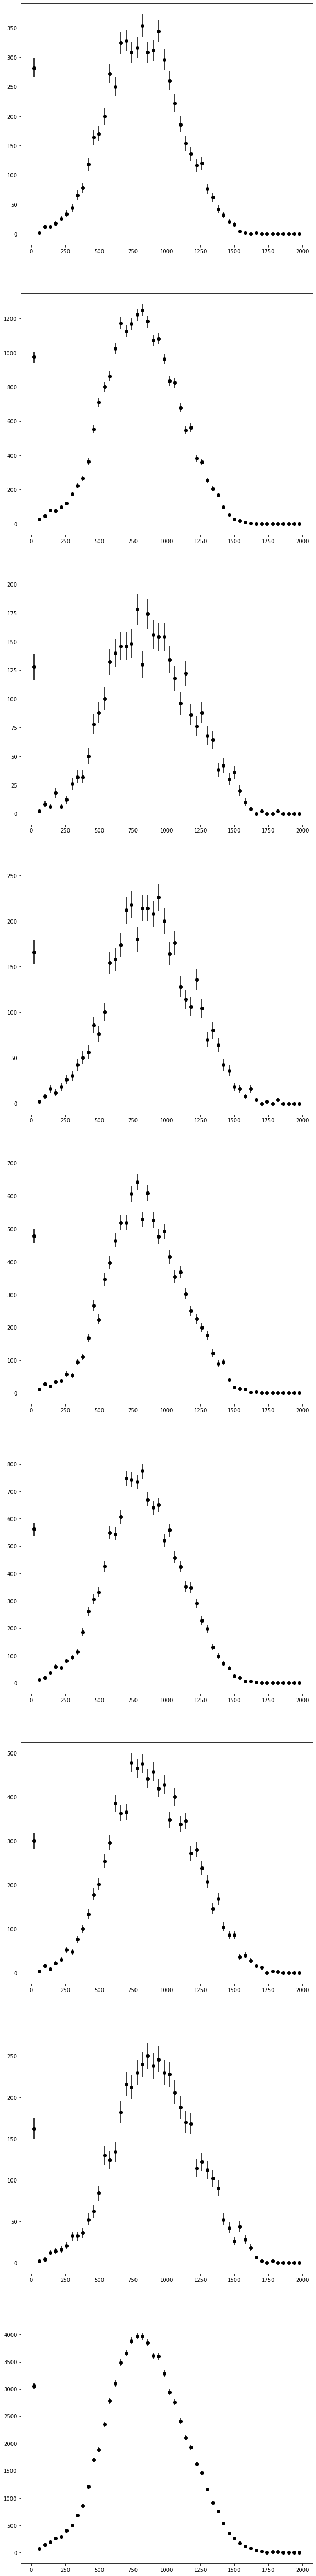

In [18]:
# From dataframe

var_ = "MissingMass40GeV"

fig, axes = plt.subplots( (len(fileNames_data)+1), 1, figsize=(10,(len(fileNames_data)+1)*10) )

histos_all = []
histo_bins_ = None
bin_centres_ = None
histo_range_ = None
with pd.HDFStore( "reduced-data-store-DoubleArm-Pt1_30-Pt2_20.h5", 'r' ) as store_:
    for idx_, key_ in enumerate( fileNames_data ):
        print ( idx_, key_ )
        histos_ = []
        for file_ in fileNames_data[ key_ ]:
            print ( file_ )
            df_ = store_[ file_ ]
            counts_, bin_edges_ = np.histogram( df_[ df_names_[ var_ ] ], bins=bins_[ var_ ], range=ranges_[ var_ ] )
            if len( histos_all ) == 0:
                histo_bins_ = bin_edges_
                bin_centres_ = ( histo_bins_[:-1] + histo_bins_[1:] )/2
                histo_range_ = ( histo_bins_[0], histo_bins_[-1] )
                
            histos_.append( counts_ )
            histos_all.append( counts_ )
        
        histo_sum_ = np.sum( histos_, axis=0 )
        
        axes[ idx_ ].errorbar( bin_centres_, histo_sum_, yerr=np.sqrt( histo_sum_ ), fmt='o', color='black' )

histo_sum_all = np.sum( histos_all, axis=0 )
axes[ len(fileNames_data) ].errorbar( bin_centres_, histo_sum_all, yerr=np.sqrt( histo_sum_all ), fmt='o', color='black' )

In [ ]:
# #var_ = "InvMass"
# #var_ = "MX"
# #var_ = "MissingMass"
# #var_ = "MissingMass80GeV"
# var_ = "MissingMass40GeV"
# #var_ = "MissingMass10GeV"
# #var_ = "MissingMass5GeV"

# var_edges_ = "{}_edges".format( var_ )

# fileNames_histos_data = {}
# fileNames_histos_data["2017B"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017B.h5'
# fileNames_histos_data["2017C1"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017C1.h5'
# fileNames_histos_data["2017E"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017E.h5'
# fileNames_histos_data["2017F1"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017F1.h5'

# fileNames_histos_data["2017C2"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017C2.h5'
# fileNames_histos_data["2017D"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017D.h5'
# fileNames_histos_data["2017F2"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017F2.h5'
# fileNames_histos_data["2017F3"] = 'histos-DoubleArm-Pt1_30-Pt2_20-2017F3.h5'

# fileNames_histos_bkg = {}
# fileNames_histos_bkg["2017B"] = 'histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017B.h5'
# fileNames_histos_bkg["2017C1"] = 'histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017C1.h5'
# fileNames_histos_bkg["2017E"] = 'histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017E.h5'
# fileNames_histos_bkg["2017F1"] = 'histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017F1.h5'

# fileNames_histos_bkg["2017C2"] = 'histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017C2.h5'
# fileNames_histos_bkg["2017D"] = 'histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017D.h5'
# fileNames_histos_bkg["2017F2"] = 'histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017F2.h5'
# fileNames_histos_bkg["2017F3"] = 'histos-DoubleArm-Pt1_30-Pt2_20-Bkg-2017F3.h5'

# resample_factor_ = 20

# fig, axes = plt.subplots( (len(fileNames_histos_data)+1), 2, figsize=(24,(len(fileNames_histos_data)+1)*10) )

# histos_all_data = []
# histos_all_bkg = []
# histo_bins_  = None
# bin_centres_ = None
# histo_range_ = None
# for idx_, key_ in enumerate( fileNames_histos_data ):
#     print ( fileNames_histos_data[ key_ ] )
#     histo_data_ = None
#     histo_data_bins_ = None
#     histo_data_sum_ = None
#     histo_bkg_ = None
#     histo_bkg_bins_ = None
#     histo_bkg_sum_ = None
#     with h5py.File( fileNames_histos_data[ key_ ], 'r' ) as f:
#         dset_histo_ = f[ var_ ]
#         histo_data_ = dset_histo_[:,:]
#         dset_histo_bins_ = f[ var_edges_ ]
#         histo_data_bins_ = dset_histo_bins_[:]
#         histo_data_sum_ = np.sum( histo_data_, axis=0 )
#         print ( histo_data_ )
#         print ( histo_data_bins_ )
#         print ( histo_data_sum_ )
#     print ( fileNames_histos_bkg[ key_ ] )
#     with h5py.File( fileNames_histos_bkg[ key_ ], 'r' ) as f:
#         dset_histo_ = f[ var_ ]
#         histo_bkg_ = dset_histo_[:,:]
#         dset_histo_bins_ = f[ var_edges_ ]
#         histo_bkg_bins_ = dset_histo_bins_[:]
#         histo_bkg_sum_ = np.sum( histo_bkg_, axis=0 )
#         print ( histo_bkg_ )
#         print ( histo_bkg_bins_ )
#         print ( histo_bkg_sum_ )
    
#     histo_bins_ = histo_data_bins_
#     bin_centres_ = ( histo_bins_[:-1] + histo_bins_[1:] )/2
#     histo_range_ = ( histo_bins_[0], histo_bins_[-1] )

#     axes[ idx_, 0 ].errorbar( bin_centres_, histo_data_sum_, yerr=np.sqrt( histo_data_sum_ ), fmt='o', color='black' )        
#     axes[ idx_, 0 ].hist( bin_centres_, weights=( histo_bkg_sum_ / resample_factor_ ), bins=histo_bins_, color='lightcoral' )
#     axes[ idx_, 1 ].errorbar( bin_centres_, ( histo_data_sum_ - histo_bkg_sum_ / resample_factor_ ), yerr=np.sqrt( histo_data_sum_ ), fmt='o', color='black' )
    
#     histos_all_data.append( histo_data_sum_ )
#     histos_all_bkg.append( histo_bkg_sum_ )
    
# histo_data_sum_all = np.sum( histos_all_data, axis=0 )
# histo_bkg_sum_all = np.sum( histos_all_bkg, axis=0 )
# axes[ len(fileNames_histos_data), 0 ].errorbar( bin_centres_, histo_data_sum_all, yerr=np.sqrt( histo_data_sum_all ), fmt='o', color='black' )        
# axes[ len(fileNames_histos_data), 0 ].hist( bin_centres_, weights=( histo_bkg_sum_all / resample_factor_ ), bins=histo_bins_, color='lightcoral' )
# axes[ len(fileNames_histos_data), 1 ].errorbar( bin_centres_, ( histo_data_sum_all - histo_bkg_sum_all / resample_factor_ ), yerr=np.sqrt( histo_data_sum_all ), fmt='o', color='black' )


0 2017B
output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20.h5
output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5
output/output-UL2017B-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5
Data / Background = 1.0172096908939015


<ipython-input-25-cf84ad27e095>:62: RuntimeWarning: invalid value encountered in true_divide
  axes[ idx_, 1 ].errorbar( bin_centres_, ( ( histo_data_sum_ - histos_bkg_sum_corr[-1]/resample_factor_ ) / ( histos_bkg_sum_corr[-1]/resample_factor_ ) ), yerr=( np.sqrt( histo_data_sum_ ) / ( histos_bkg_sum_corr[-1]/resample_factor_ ) ), fmt='o', color='black' )


1 2017C1
output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_0.h5
output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20_1.h5
output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5
output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5
output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5
output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_3.h5
output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_4.h5
output/output-UL2017C1-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_5.h5
Data / Background = 0.9920007334571043
2 2017E
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_0.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_1.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_2.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_3.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20_4.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_0.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_1.h5
output/output-UL2017E-DoubleArm-Pt1_30-Pt2_20-Rnd-Res20_2.h5
output/output-UL2017E-DoubleAr

<ipython-input-25-cf84ad27e095>:83: RuntimeWarning: invalid value encountered in true_divide
  axes_sum_all[ 1 ].errorbar( bin_centres_, ( ( histo_data_sum_all - histo_bkg_sum_all/resample_factor_ ) / ( histo_bkg_sum_all/resample_factor_ ) ), yerr=( np.sqrt( histo_data_sum_all ) / ( histo_bkg_sum_all/resample_factor_ ) ), fmt='o', color='black' )


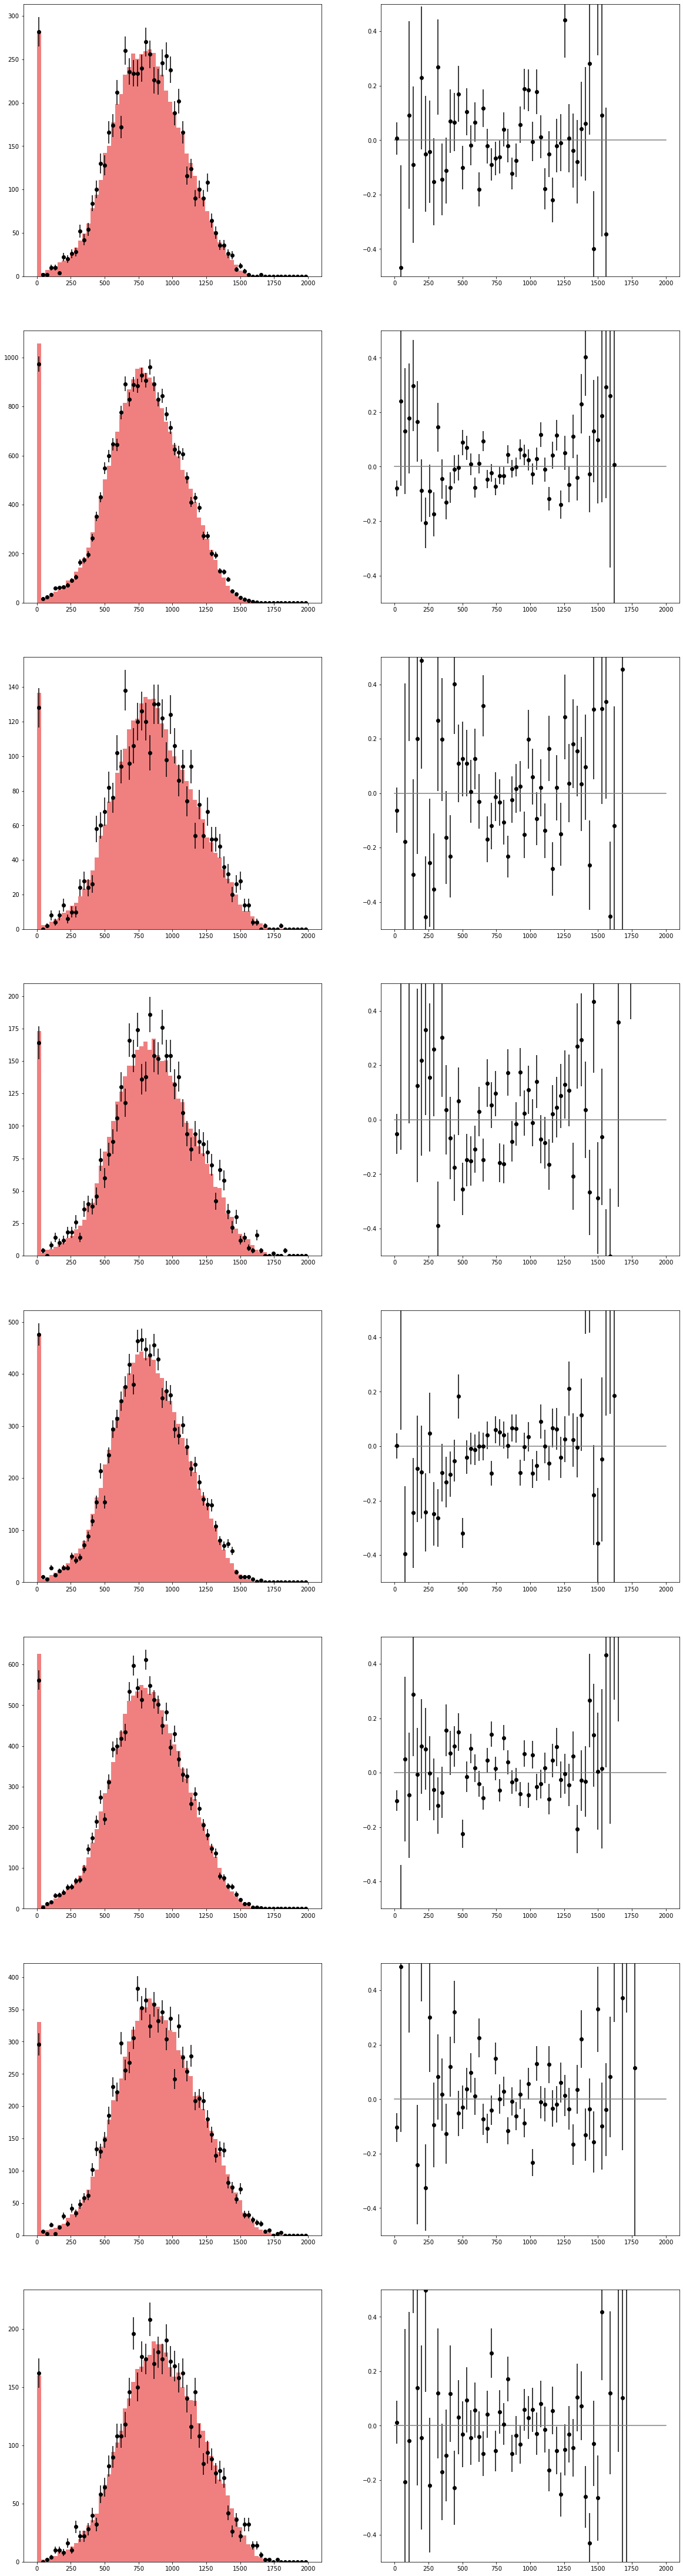

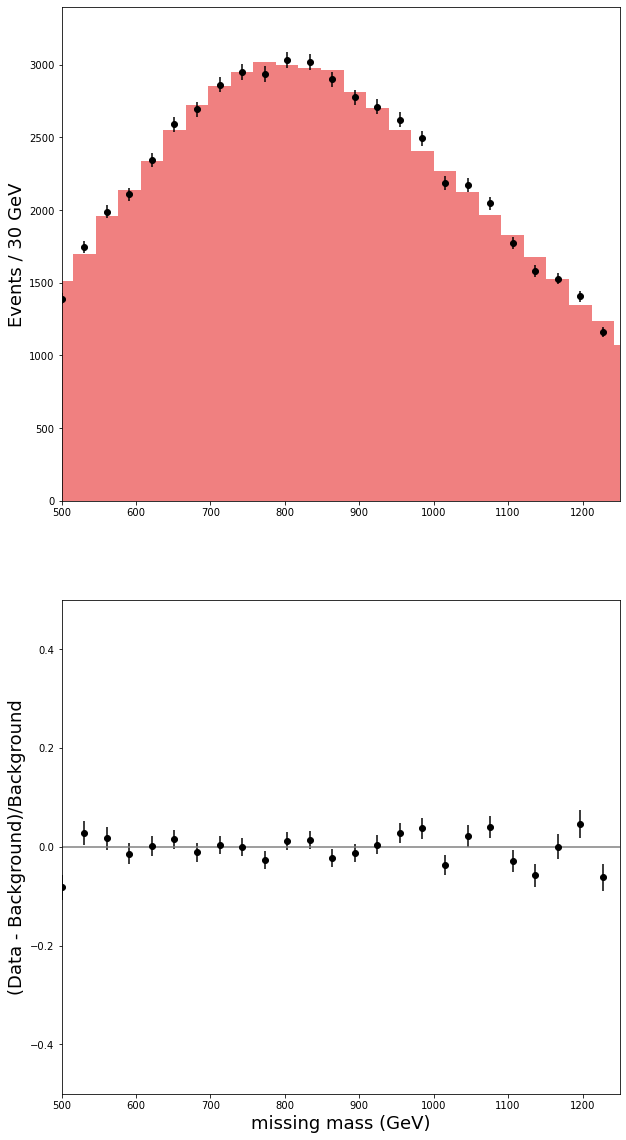

In [25]:
# From dataframe

resample_factor_ = 20
rescale_bkg_ = True

#var_ = "MX"
var_ = "MissingMass30GeV"
savefig_ = False

fig, axes = plt.subplots( len(fileNames_data), 2, figsize=(20,len(fileNames_data)*10) )

histos_all_data = []
histos_all_bkg = []
histos_bkg_sum_corr = []
histo_bins_ = None
bin_centres_ = None
histo_range_ = None
with pd.HDFStore( "reduced-data-store-DoubleArm-Pt1_30-Pt2_20.h5", 'r' ) as store_data_:
    with pd.HDFStore( "reduced-data-store-DoubleArm-Pt1_30-Pt2_20-Bkg.h5", 'r' ) as store_bkg_:
        for idx_, key_ in enumerate( fileNames_data ):
            print ( idx_, key_ )
            histos_data_ = []
            for file_ in fileNames_data[ key_ ]:
                print ( file_ )
                df_ = store_data_[ file_ ]
                counts_, bin_edges_ = np.histogram( df_[ df_names_[ var_ ] ], bins=bins_[ var_ ], range=ranges_[ var_ ] )
                if len( histos_all_data ) == 0:
                    histo_bins_ = bin_edges_
                    bin_centres_ = ( histo_bins_[:-1] + histo_bins_[1:] )/2
                    histo_range_ = ( histo_bins_[0], histo_bins_[-1] )

                histos_data_.append( counts_ )
                histos_all_data.append( counts_ )

            histo_data_sum_ = np.sum( histos_data_, axis=0 )

            histos_bkg_ = []
            for file_ in fileNames_bkg[ key_ ]:
                print ( file_ )
                df_ = store_bkg_[ file_ ]
                counts_, bin_edges_ = np.histogram( df_[ df_names_[ var_ ] ], bins=bins_[ var_ ], range=ranges_[ var_ ] )

                histos_bkg_.append( counts_ )
                histos_all_bkg.append( counts_ )

            histo_bkg_sum_ = np.sum( histos_bkg_, axis=0 )
            
            sum_data_ = np.sum( histo_data_sum_ )
            sum_bkg_ = np.sum( histo_bkg_sum_ )
            print ( "Data / Background = {}".format( sum_data_ / ( sum_bkg_ / resample_factor_ ) ) )
            histo_bkg_sum_corr_ = None
            if rescale_bkg_:
                rescale_factor_bkg_ = ( sum_data_ / ( sum_bkg_ / resample_factor_ ) )
                histo_bkg_sum_corr_ = histo_bkg_sum_ * rescale_factor_bkg_
            else:
                histo_bkg_sum_corr_ = histo_bkg_sum_
            histos_bkg_sum_corr.append( histo_bkg_sum_corr_ )
            
            axes[ idx_, 0 ].errorbar( bin_centres_, histo_data_sum_, yerr=np.sqrt( histo_data_sum_ ), fmt='o', color='black' )
            axes[ idx_, 0 ].hist( bin_centres_, weights=( histos_bkg_sum_corr[-1] / resample_factor_ ), bins=histo_bins_, color='lightcoral' )
            axes[ idx_, 1 ].plot( (histo_range_[0], histo_range_[1]), (0., 0.), color="gray" )
            axes[ idx_, 1 ].errorbar( bin_centres_, ( ( histo_data_sum_ - histos_bkg_sum_corr[-1]/resample_factor_ ) / ( histos_bkg_sum_corr[-1]/resample_factor_ ) ), yerr=( np.sqrt( histo_data_sum_ ) / ( histos_bkg_sum_corr[-1]/resample_factor_ ) ), fmt='o', color='black' )
            axes[ idx_, 1 ].set_ylim( -0.50, 0.50 )

print ( "Sum of all periods." )

fig_sum_all, axes_sum_all = plt.subplots( 2, 1, figsize=(10,20) )

histo_data_sum_all = np.sum( histos_all_data, axis=0 )
histo_bkg_sum_all = None
if rescale_bkg_:
    histo_bkg_sum_all = np.sum( histos_bkg_sum_corr, axis=0 )
else:
    histo_bkg_sum_all = np.sum( histos_all_bkg, axis=0 )

sum_data_ = np.sum( histo_data_sum_all )
sum_bkg_ = np.sum( histo_bkg_sum_all )
print ( "Data / Background = {}".format( sum_data_ / ( sum_bkg_ / resample_factor_ ) ) )

axes_sum_all[ 0 ].errorbar( bin_centres_, histo_data_sum_all, yerr=np.sqrt( histo_data_sum_all ), fmt='o', color='black' )        
axes_sum_all[ 0 ].hist( bin_centres_, weights=( histo_bkg_sum_all / resample_factor_ ), bins=histo_bins_, color='lightcoral' )
axes_sum_all[ 1 ].plot( (histo_range_[0], histo_range_[1]), (0., 0.), color="gray" )
axes_sum_all[ 1 ].errorbar( bin_centres_, ( ( histo_data_sum_all - histo_bkg_sum_all/resample_factor_ ) / ( histo_bkg_sum_all/resample_factor_ ) ), yerr=( np.sqrt( histo_data_sum_all ) / ( histo_bkg_sum_all/resample_factor_ ) ), fmt='o', color='black' )
axes_sum_all[ 0 ].set_ylabel( "Events / {:.0f} GeV".format( ( ranges_[ var_ ][1] - ranges_[ var_ ][0] ) / bins_[ var_ ] ), fontsize=18 )
axes_sum_all[ 1 ].set_xlabel( "missing mass (GeV)", fontsize=18 )
axes_sum_all[ 1 ].set_ylabel( "(Data - Background)/Background", fontsize=18 )
axes_sum_all[ 1 ].set_ylim( -0.50, 0.50 )
axes_sum_all[ 0 ].set_xlim( 500., 1250. )
axes_sum_all[ 1 ].set_xlim( 500., 1250. )

if savefig_:
    plt.savefig( "Data_Bkg_{}.pdf".format( var_ ) )


### References

In [ ]:
import time
time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() )
time_s_ = time.time()
time.sleep(3)
time_e_ = time.time()
print ( time_e_ - time_s_ )

In [ ]:
np.info( pd.HDFStore )